<a href="https://colab.research.google.com/github/JuanMelendres/proyecto_integrador_equipo19/blob/master/Avance2_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avance 2. Ingeniería de características

##Optimización de flujos quirúrgicos mediante IA

###Oscar Damián Vela Noyola A00821831
###Juan Antonio Melendres Villa A00369017
###Miguel Ángel Villanueva Amador A01793890


#### Librerías

Importamos las librerias que se llegaran a necesitar

In [ ]:
# Importación de la librería pandas para la manipulación y análisis de datos
import pandas as pd
# Importación de matplotlib para la creación de gráficos y visualizaciones
import matplotlib.pyplot as plt
# Importación de seaborn para gráficos estadísticos más estéticos (basado en matplotlib)
import seaborn as sns
# Importación de numpy para operaciones matemáticas avanzadas y manejo de arreglos
import numpy as np
# Importación de funciones estadísticas de scipy (por ejemplo, pruebas de hipótesis y estadística inferencial)
from scipy import stats
# Importación del módulo re para trabajar con expresiones regulares (procesamiento de texto)
import re
# Importación de Counter para contar elementos (útil para frecuencias de palabras o categorías)
from collections import Counter
# Importación de unicodedata para normalizar texto (por ejemplo, eliminar tildes o caracteres especiales)
import unicodedata
# Importación de WordCloud para generar nubes de palabras a partir de texto
from wordcloud import WordCloud
# Importación de TfidfVectorizer para transformar texto en vectores numéricos basados en TF-IDF (Text Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
# Importación de KMeans para agrupamiento (clustering) de datos, útil para agrupaciones no supervisadas
from sklearn.cluster import KMeans
# Importación de corpora de Gensim para procesar texto y crear representaciones de documentos
from gensim import corpora
# Importación del modelo LsiModel de Gensim para modelado de temas usando LSI (Latent Semantic Indexing)
from gensim.models import LsiModel
# Importación de CoherenceModel para evaluar la coherencia de los modelos de temas
from gensim.models import CoherenceModel
# Importación de MinMaxScaler para normalizar datos a un rango específico (entre 0 y 1)
from sklearn.preprocessing import MinMaxScaler
# Importación de warnings para suprimir advertencias (esto puede ser útil para evitar mensajes innecesarios en la salida)
import warnings
warnings.filterwarnings('ignore')  # Ignorar todas las advertencias

#### Cargar set de datos original

Cargamos el data set original

In [ ]:
# Load the data from the first sheet, and assign it to variable "df"
df = pd.read_excel('PQ.xlsx')
# Show the first 10 rows using dataframe.head() method
df.head(10)

,id,num,registro,edad,sexo,peso,tallacm,tallam,imc,Diabetes Mellitus (DM),...,observaciones,complicaciones30das,var103,obesidad,edadmayor60,hiperglucemia,dmdescontrol,complicacion,bhcanormal,qsanormal
0,1,713.0,745957,43,1,70.0,170.0,1.70,24.22,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,0
1,2,899.0,715767,19,2,62.0,160.0,1.60,24.22,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,1
2,3,1414.0,718835,63,2,60.0,160.0,1.60,23.44,1.0,...,NaN,NaN,NaN,0,1,0,0.0,0,1,1
3,4,1664.0,780065,40,2,71.0,157.0,1.57,28.80,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,0
4,5,533.0,761613,52,1,73.0,161.0,1.61,28.16,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,0
5,6,1327.0,718672,27,1,67.0,160.0,1.60,26.17,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,1
6,7,NaN,763027,78,1,70.0,170.0,1.70,24.22,0.0,...,NaN,NaN,NaN,0,1,0,0.0,0,1,1
7,8,881.0,749454,74,2,71.6,147.0,1.47,33.13,0.0,...,NaN,NaN,NaN,1,1,0,0.0,0,0,1
8,9,1079.0,749394,52,2,89.0,154.0,1.54,37.53,1.0,...,NaN,NaN,NaN,1,0,0,0.0,0,1,1
9,10,1977.0,782561,43,2,60.0,160.0,1.60,23.44,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,1


In [ ]:
df.shape[0] # CANTIDAD DE RENGLONES

2115

### VARIABLES CATEGÓRICAS

#### Sexo a binario

In [ ]:
df['sexo_binary'] = df['sexo'].map({2: 0, 1: 1}).fillna(-1).astype(int)

Generamos una nueva columna llamada sexo_binary que contiene valores binarios basados en los datos originales de la columna sexo.

#### Codificación one-hot para el tipo de anestesia

In [ ]:
# Verificar si hay valores nulos antes de realizar la operación
if df['clasificacionanestes'].isna().sum() > 0:
    # Calcular la moda (puede haber múltiples modas, por lo que seleccionamos una aleatoriamente si es necesario)
    modas = df['clasificacionanestes'].mode()
    moda_final = modas.sample(1).iloc[0]  # Seleccionar una moda aleatoria si hay más de una

    # Rellenar los valores nulos con la moda seleccionada
    df['clasificacionanestes'].fillna(moda_final, inplace=True)

Reemplazar valores nulos con la moda es una estrategia de imputación simple y útil cuando los valores más comunes son representativos del conjunto de datos. Al verificar si hay valores nulos antes de realizar la imputación.

In [ ]:
# Verificar si hay valores nulos y rellenarlos si es necesario
if df['clasificacionanestes'].isna().sum() > 0:
    moda = df['clasificacionanestes'].mode()[0]
    df['clasificacionanestes'].fillna(moda, inplace=True)

# Realizar One-Hot Encoding y agregar las nuevas columnas al DataFrame
one_hot_encoded = pd.get_dummies(df['clasificacionanestes'], prefix='anestesia').astype(int)

# Concatenar el DataFrame original con el resultado del One-Hot Encoding
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
df['clasificacionanestes'].describe(include=['object']).T

,clasificacionanestes
count,2115.000000
mean,1.624586
std,0.967769
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


One-Hot Encoding permite convertir variables categóricas en datos numéricos, lo que es necesario para muchos modelos de machine learning, como regresión logística, árboles de decisión, o redes neuronales, que no pueden trabajar directamente con datos categóricos.

Este código transforma una variable categórica en varias columnas binarias, facilitando su uso en algoritmos de machine learning.

In [ ]:
# Verificar si hay valores nulos en las columnas seleccionadas
if df[['clasificacionanestes']].isna().sum().any():
    print("Advertencia: Hay valores nulos en la columna 'clasificacionanestes'.")

# Mostrar las primeras 5 filas con columnas relevantes, incluyendo el índice
print(df[['clasificacionanestes'] + list(one_hot_encoded.columns)].head())

   clasificacionanestes  anestesia_1  anestesia_2  anestesia_3  anestesia_4  \
0                     2            0            1            0            0   
1                     1            1            0            0            0   
2                     1            1            0            0            0   
3                     1            1            0            0            0   
4                     1            1            0            0            0   

   anestesia_5  
0            0  
1            0  
2            0  
3            0  
4            0  


Este código es útil para verificar que la transformación One-Hot Encoding se haya aplicado correctamente. La comparación entre la columna original y las nuevas columnas facilita la validación visual del proceso.

#### nitritos a binario

In [ ]:
# Manejo explícito de valores nulos y optimización del proceso
df['nitritos_binary'] = df['nitritos'].fillna('').map(lambda x: 1 if str(x).strip().upper().startswith('P') else 0)

In [ ]:
df['nitritos_binary'].describe(include=['object']).T

,nitritos_binary
count,2115.000000
mean,0.034515
std,0.182592
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Este código transforma una columna de texto en una variable binaria, útil para análisis o modelado.

#### egoinfeccin a binario

In [ ]:
# Manejo de nulos y espacios en blanco, y optimización con map()
df['egoinfeccin_binary'] = (
    df['egoinfeccin']
    .fillna('')  # Reemplazar NaN con cadena vacía
    .map(lambda x: 1 if str(x).strip().upper().startswith('S') else 0)
)

In [ ]:
df['egoinfeccin_binary'].describe(include=['object']).T

,egoinfeccin_binary
count,2115.000000
mean,0.066194
std,0.248679
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Este código convierte los valores de una columna de texto en una variable binaria (0 o 1) basada en si los valores comienzan con 'S'. Esto es útil para preparar los datos para análisis o modelos de machine learning que requieren variables numéricas.

### Transformaciones numéricas

In [ ]:
def analizar_variable(df, variable):
    # Asegúrate de que la variable no contenga valores negativos o cero
    if df[variable].isnull().any():
        print(f"Se encontraron valores nulos en {variable}. Se eliminarán o reemplazarán.")
        df[variable].fillna(df[variable].mean(), inplace=True)  # Reemplazar nulos con la media (puedes ajustar esto)

    # Para Box-Cox, asegurarse que todos los valores sean positivos
    min_value = df[variable].min()
    if min_value <= 0:
        print(f"Transformación Box-Cox no se puede aplicar a {variable} debido a valores <= 0. Se ajustarán.")
        df[variable] = df[variable] + (1 - min_value)  # Ajustar los valores para que sean todos positivos

    # Transformaciones
    log_variable = np.log(df[variable])
    exp_variable = np.exp(df[variable] - df[variable].mean())  # Centrado para evitar overflow
    sqrt_variable = np.sqrt(df[variable])

    # Box-Cox (intenta aplicar solo si hay valores válidos)
    try:
        boxcox_variable, _ = stats.boxcox(df[variable])
    except ValueError as e:
        print(f"Box-Cox no se pudo aplicar a {variable}: {e}")
        boxcox_variable = np.nan  # Manejo como NaN si falla

    # Yeo-Johnson (funciona con valores negativos y cero)
    yeo_johnson_variable, _ = stats.yeojohnson(df[variable])

    # Normalidad
    normalidad_results = {
        'Original': stats.shapiro(df[variable]),
        'Logarítmica': stats.shapiro(log_variable),
        'Exponencial': stats.shapiro(exp_variable),
        'Raíz Cuadrada': stats.shapiro(sqrt_variable),
    }

    # Añadir Box-Cox si fue exitoso
    if isinstance(boxcox_variable, np.ndarray):
        normalidad_results['Box-Cox'] = stats.shapiro(boxcox_variable)

    # Añadir Yeo-Johnson
    normalidad_results['Yeo-Johnson'] = stats.shapiro(yeo_johnson_variable)

    # Gráficos
    plt.figure(figsize=(18, 12))

    # Histograma original
    plt.subplot(3, 2, 1)
    plt.hist(df[variable], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

    # Histograma logarítmico
    plt.subplot(3, 2, 2)
    plt.hist(log_variable, bins=20, color='orange', alpha=0.7)
    plt.title(f'Histograma de {variable} Logarítmica')
    plt.xlabel(f'Log({variable})')
    plt.ylabel('Frecuencia')

    # Histograma exponencial
    plt.subplot(3, 2, 3)
    plt.hist(exp_variable, bins=20, color='green', alpha=0.7)
    plt.title(f'Histograma de {variable} Exponencial')
    plt.xlabel(f'Exp({variable})')
    plt.ylabel('Frecuencia')

    # Histograma raíz cuadrada
    plt.subplot(3, 2, 4)
    plt.hist(sqrt_variable, bins=20, color='purple', alpha=0.7)
    plt.title(f'Histograma de {variable} Raíz Cuadrada')
    plt.xlabel(f'√{variable}')
    plt.ylabel('Frecuencia')

    # Histograma Box-Cox
    if isinstance(boxcox_variable, np.ndarray):
        plt.subplot(3, 2, 5)
        plt.hist(boxcox_variable, bins=20, color='red', alpha=0.7)
        plt.title(f'Histograma de Box-Cox de {variable}')
        plt.xlabel(f'Box-Cox({variable})')
        plt.ylabel('Frecuencia')
    else:
        plt.subplot(3, 2, 5)
        plt.text(0.5, 0.5, 'Box-Cox no se pudo aplicar', fontsize=14, ha='center')

    # Histograma Yeo-Johnson
    plt.subplot(3, 2, 6)
    plt.hist(yeo_johnson_variable, bins=20, color='cyan', alpha=0.7)
    plt.title(f'Histograma de Yeo-Johnson de {variable}')
    plt.xlabel(f'Yeo-Johnson({variable})')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

    # Resultados de normalidad
    print(f"\nResultados de normalidad para {variable}:")
    for transformation, result in normalidad_results.items():
        print(f"{transformation}: Estadístico = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")

Este código realiza una serie de transformaciones y pruebas de normalidad sobre una variable numérica, lo que es útil para preparar datos para modelos estadísticos y machine learning.

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))

El uso de MinMaxScaler garantiza que los datos estén dentro de un rango predefinido (aquí, -1 a 1), manteniendo las proporciones originales. Este escalado es útil para preparar datos para algoritmos de machine learning y mejorar la precisión de los modelos que dependen de la escala de las variables.

#### Edad

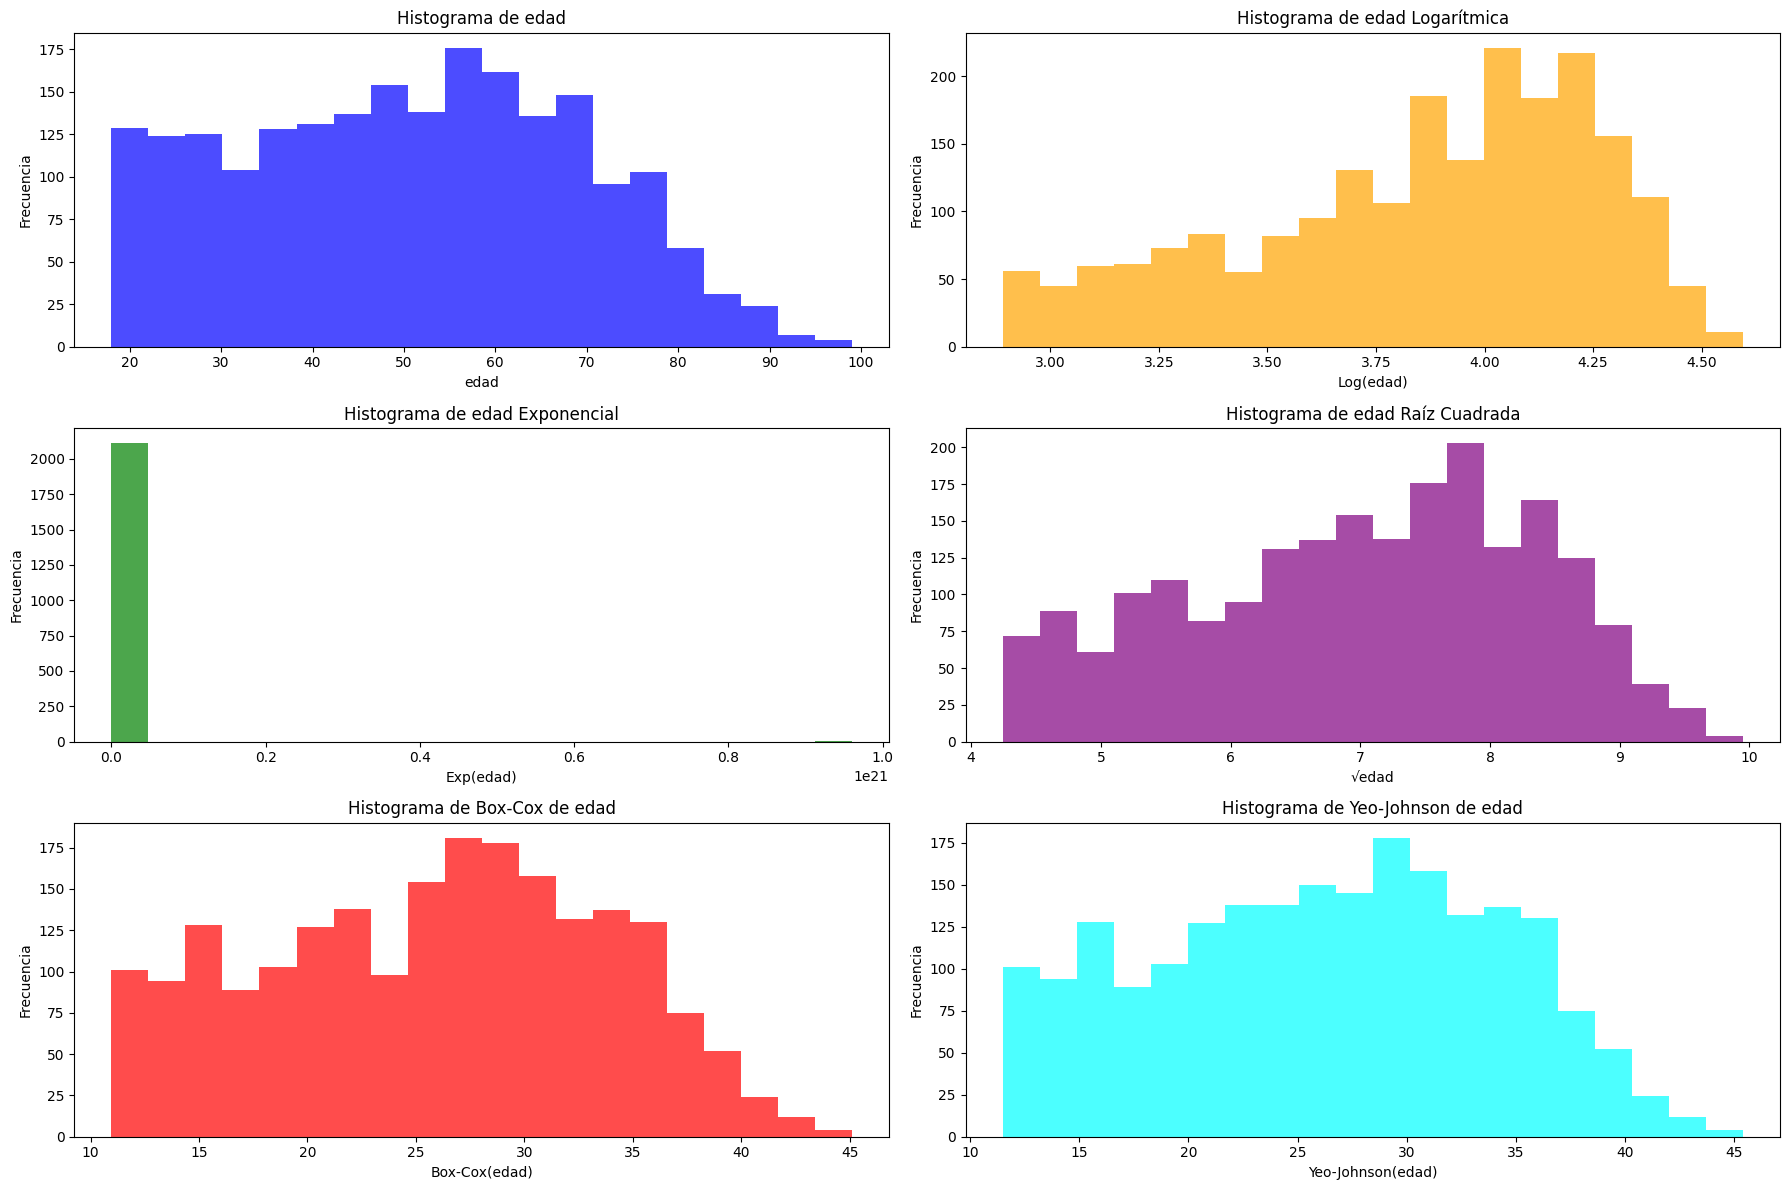


Resultados de normalidad para edad:
Original: Estadístico = 0.9773, p-value = 0.0000
Logarítmica: Estadístico = 0.9478, p-value = 0.0000
Exponencial: Estadístico = 0.0119, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9708, p-value = 0.0000
Box-Cox: Estadístico = 0.9764, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9764, p-value = 0.0000


In [ ]:
analizar_variable(df, "edad")

Este código invoca la función analizar_variable sobre la columna 'edad' del DataFrame df. La función fue definida previamente para realizar transformaciones estadísticas y pruebas de normalidad sobre una variable específica.

Al analizar una variable numérica (edad en este caso) para preparar los datos antes de su uso en modelos estadísticos o de machine learning. Las transformaciones aplicadas (como Box-Cox o Yeo-Johnson) son útiles para lograr que los datos se acerquen a una distribución normal, lo que mejora el rendimiento de muchos modelos.

In [ ]:
# Verificar si hay valores nulos antes de aplicar la transformación
if df["edad"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'edad'. Se reemplazarán con la media.")
    df["edad"].fillna(df["edad"].mean(), inplace=True)

# Aplicar MinMaxScaler de forma segura
df["edad_n"] = scaler.fit_transform(df[["edad"]])

print(df[["edad", "edad_n"]].head())  # Mostrar los primeros resultados

   edad    edad_n
0    43 -0.382716
1    19 -0.975309
2    63  0.111111
3    40 -0.456790
4    52 -0.160494


El resultado de este código es una nueva columna 'edad_n' que contiene los valores normalizados de 'edad'. Los valores originales se transforman para que todos queden dentro del rango 0 a 1 (u otro rango si se especificó). Esta normalización es útil en muchos algoritmos de machine learning

#### Peso

Se encontraron valores nulos en peso. Se eliminarán o reemplazarán.


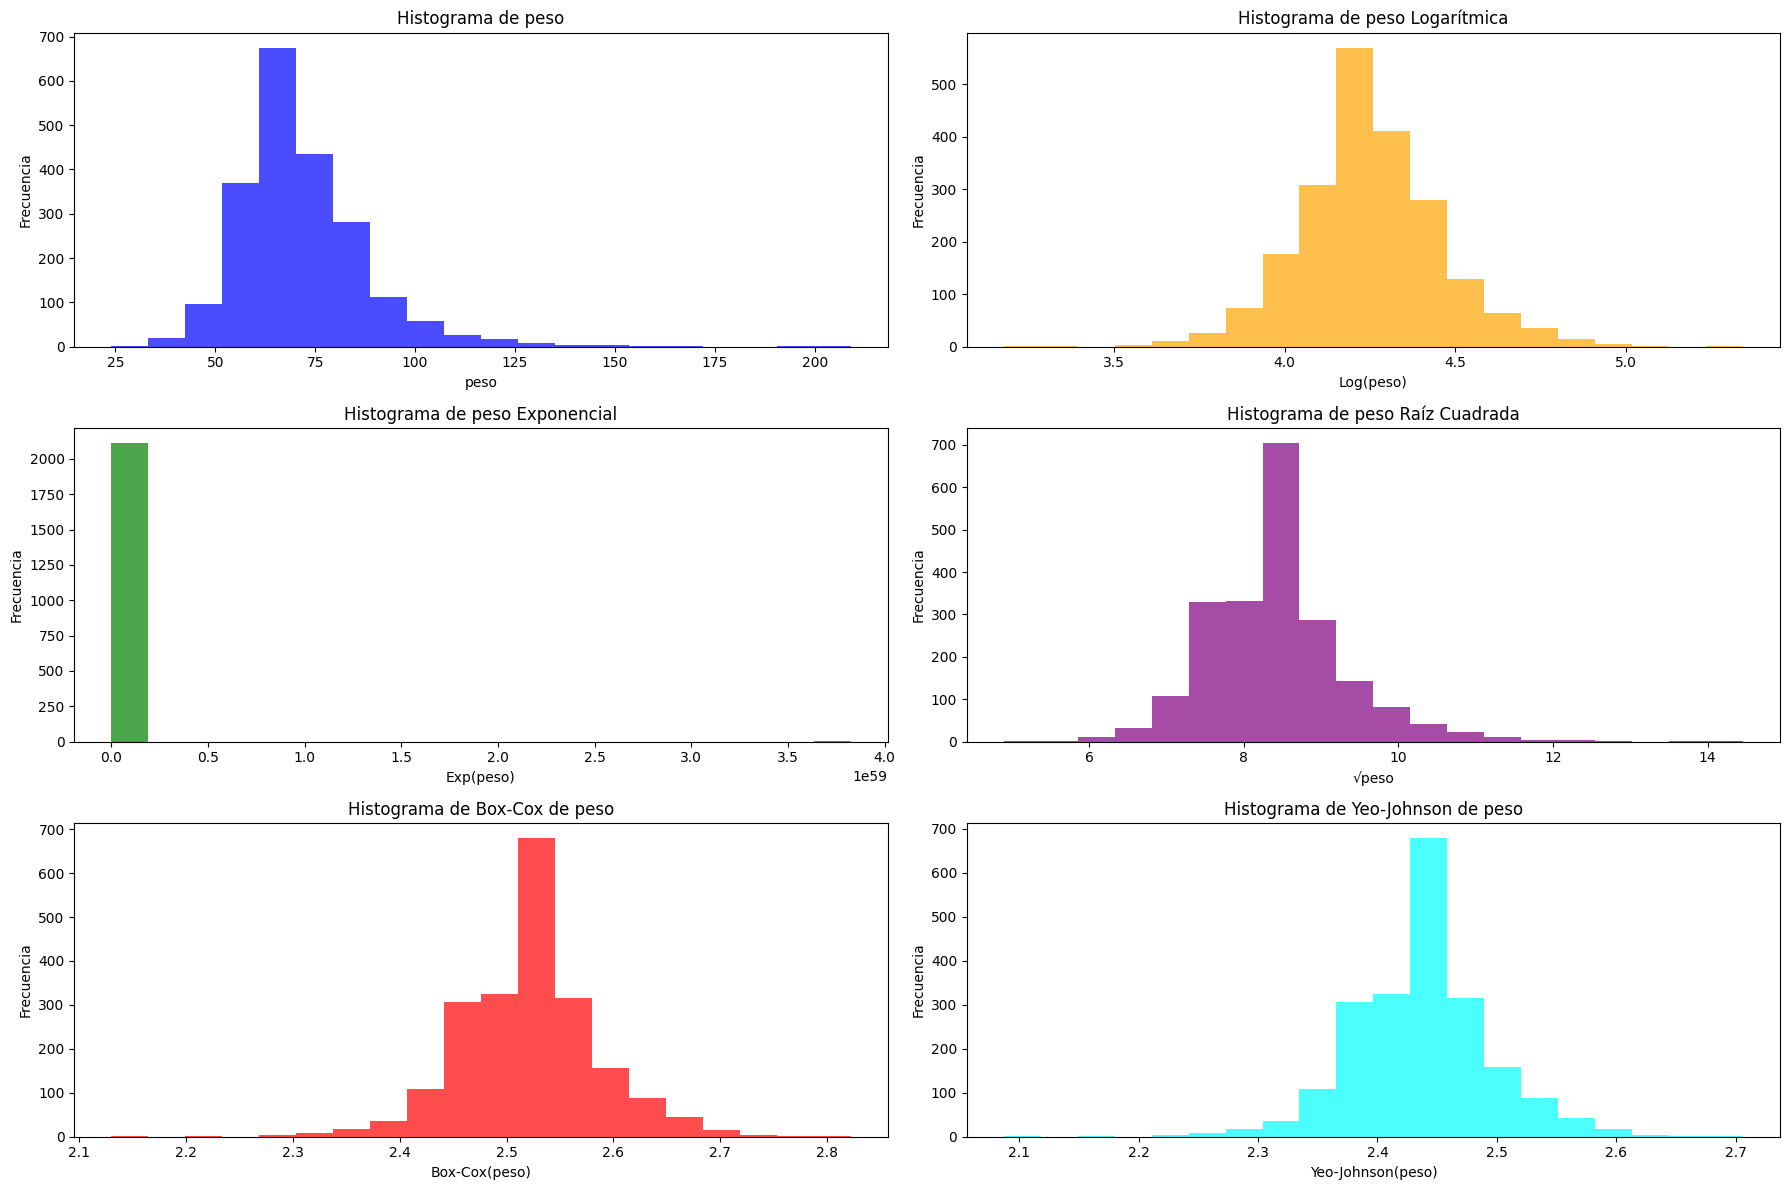


Resultados de normalidad para peso:
Original: Estadístico = 0.9048, p-value = 0.0000
Logarítmica: Estadístico = 0.9765, p-value = 0.0000
Exponencial: Estadístico = 0.0063, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9527, p-value = 0.0000
Box-Cox: Estadístico = 0.9793, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9795, p-value = 0.0000


In [ ]:
analizar_variable(df, "peso")

Este código invoca la función analizar_variable sobre la columna 'peso' del DataFrame df. La función tiene como objetivo aplicar transformaciones estadísticas, verificar la normalidad de los datos, y generar gráficos histogramas para analizar la distribución de la variable especificada.

Esto nos proporciona un análisis detallado de la distribución de la columna 'peso', aplicando varias transformaciones y verificando su normalidad. Estas transformaciones son útiles para preparar los datos para modelos estadísticos y de machine learning que asumen normalidad en los datos.

In [ ]:
# Se usa yeo-johnson
df["peso_yj"], _ = stats.yeojohnson(df["peso"])
df["peso_yj_n"] = scaler.fit_transform(df[["peso_yj"]])

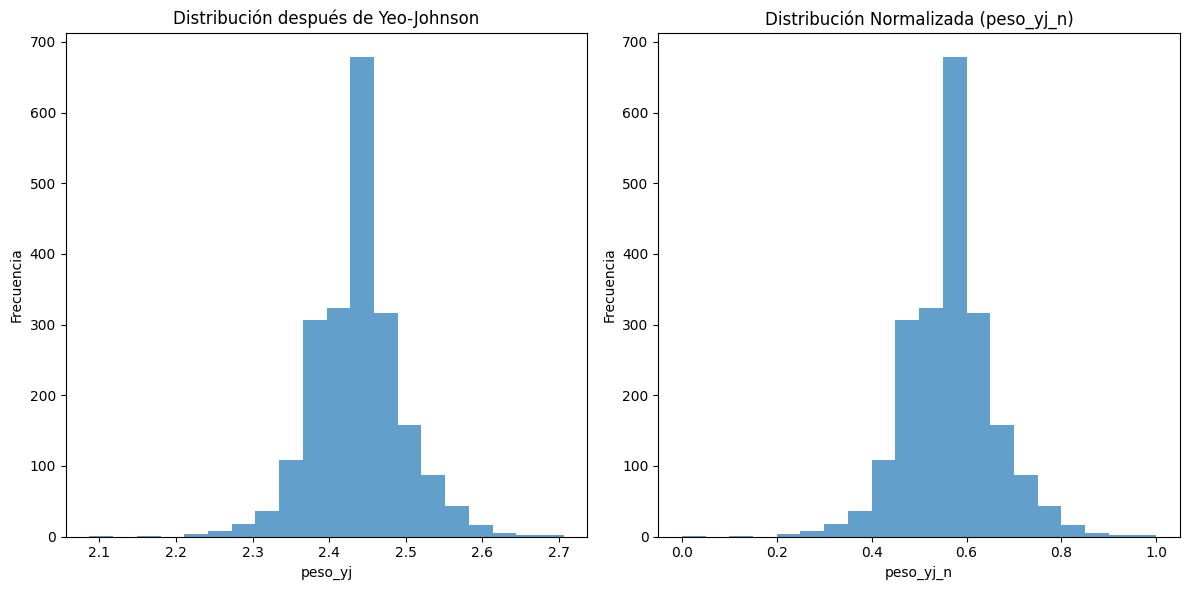

In [ ]:
# Manejo de valores nulos antes de la transformación
if df["peso"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'peso'. Se reemplazarán con la media.")
    df["peso"].fillna(df["peso"].mean(), inplace=True)

# Aplicación de la transformación Yeo-Johnson
df["peso_yj"], _ = stats.yeojohnson(df["peso"])

# Normalización de la columna transformada
scaler = MinMaxScaler(feature_range=(0, 1))  # Ajustar el rango según sea necesario
df["peso_yj_n"] = scaler.fit_transform(df[["peso_yj"]])

# Comparación visual de la distribución
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["peso_yj"], bins=20, alpha=0.7)
plt.title("Distribución después de Yeo-Johnson")
plt.xlabel("peso_yj")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["peso_yj_n"], bins=20, alpha=0.7)
plt.title("Distribución Normalizada (peso_yj_n)")
plt.xlabel("peso_yj_n")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Este código transforma y normaliza los datos de 'peso' utilizando Yeo-Johnson y MinMaxScaler. Este enfoque garantiza que los datos estén preparados correctamente para su uso en modelos estadísticos o de machine learning.

#### tallacm

Se encontraron valores nulos en tallacm. Se eliminarán o reemplazarán.


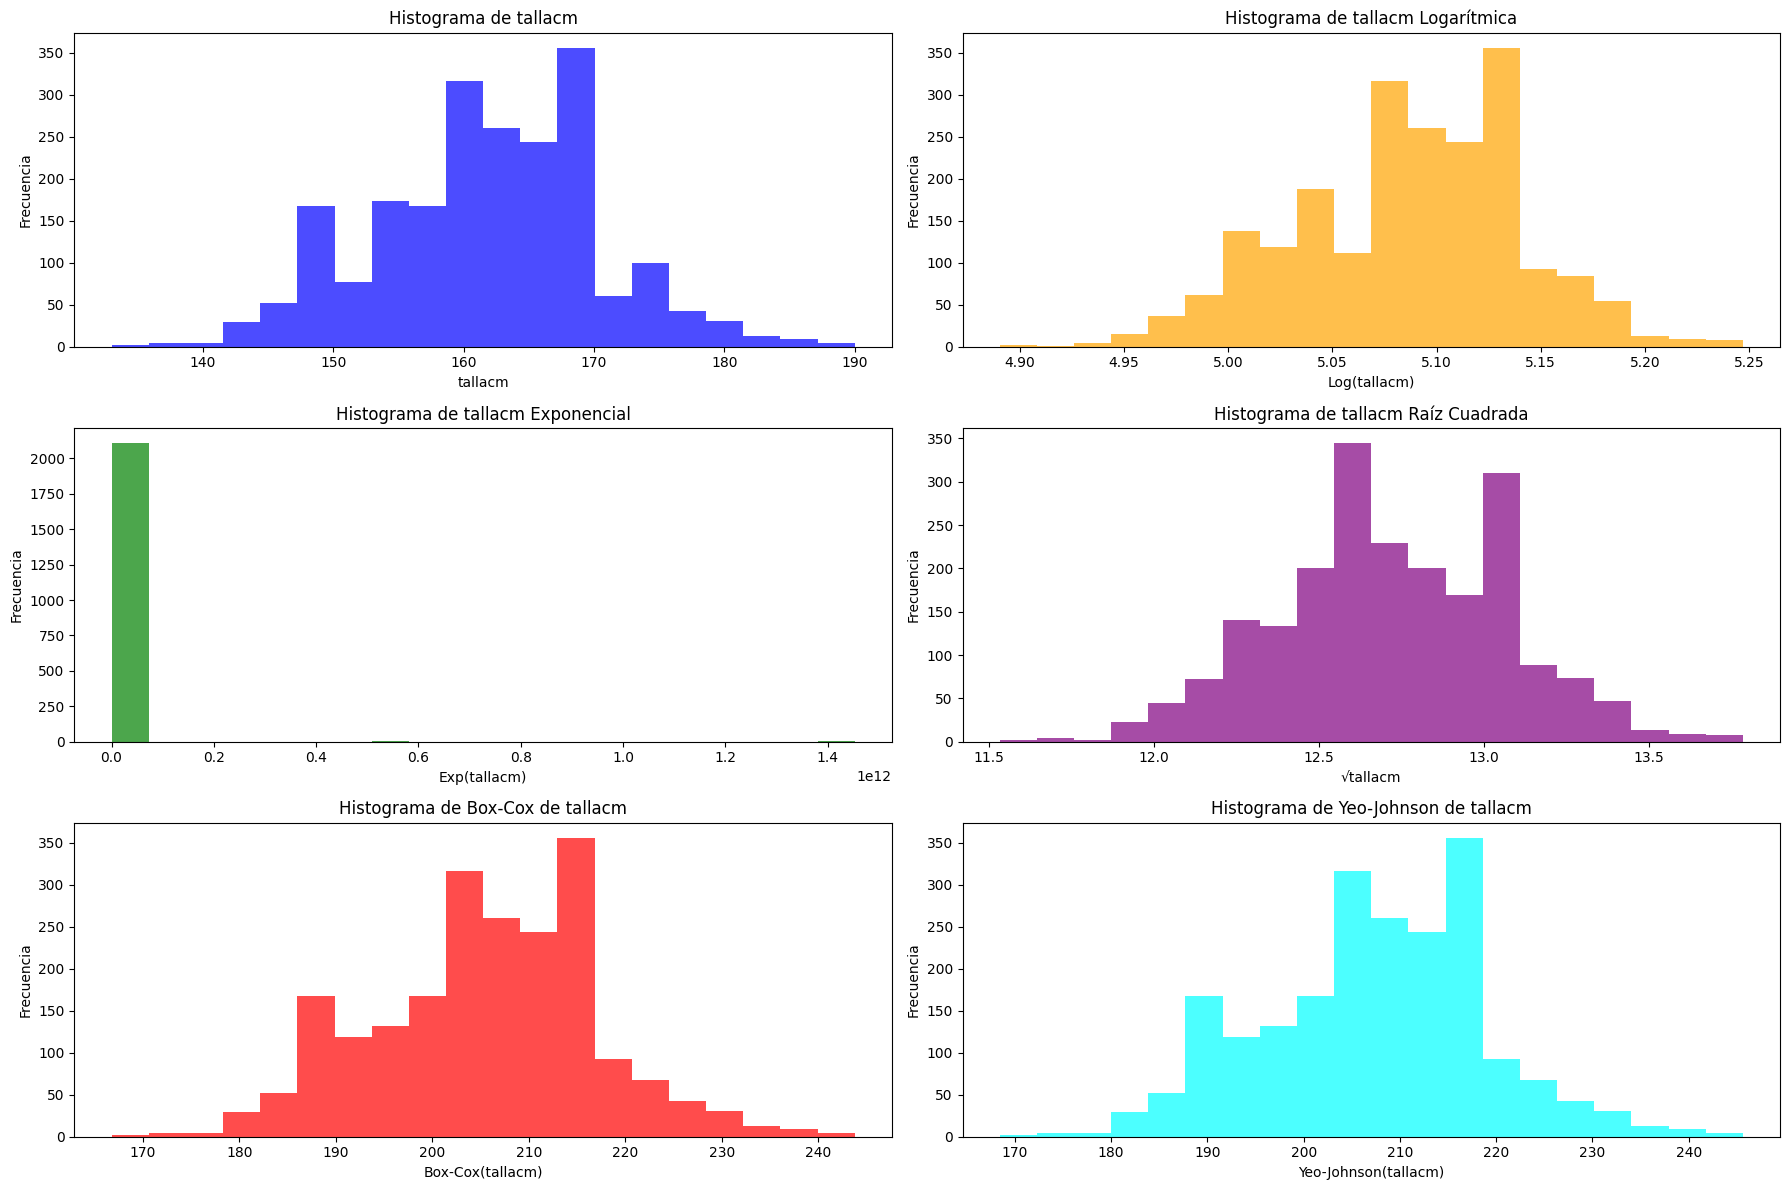


Resultados de normalidad para tallacm:
Original: Estadístico = 0.9923, p-value = 0.0000
Logarítmica: Estadístico = 0.9909, p-value = 0.0000
Exponencial: Estadístico = 0.0231, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9919, p-value = 0.0000
Box-Cox: Estadístico = 0.9923, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9923, p-value = 0.0000


In [ ]:
analizar_variable(df, "tallacm")

Este código proporciona una evaluación completa de la columna 'tallacm'. Las transformaciones y pruebas de normalidad permiten identificar si los datos se aproximan a una distribución normal, lo cual es importante para muchos modelos estadísticos y de machine learning.Este código proporciona una evaluación completa de la columna 'tallacm'. Las transformaciones y pruebas de normalidad permiten identificar si los datos se aproximan a una distribución normal, lo cual es importante para muchos modelos estadísticos y de machine learning.

In [ ]:
# Verificar y manejar valores nulos
if df["tallacm"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'tallacm'. Se reemplazarán por la media.")
    df["tallacm"].fillna(df["tallacm"].mean(), inplace=True)

# Aplicar MinMaxScaler con un rango personalizado (si es necesario)
scaler = MinMaxScaler(feature_range=(0, 1))  # Cambia el rango según lo requerido
df["tallacm_n"] = scaler.fit_transform(df[["tallacm"]])

# Mostrar los primeros resultados para validar
print(df[["tallacm", "tallacm_n"]].head())

   tallacm  tallacm_n
0    170.0   0.649123
1    160.0   0.473684
2    160.0   0.473684
3    157.0   0.421053
4    161.0   0.491228


Este código transforma los valores de la columna 'tallacm' a un rango entre 0 y 1 usando MinMaxScaler, asegurando que los datos estén listos para su uso en modelos estadísticos o de machine learning. Este escalado es crucial en contextos donde las diferencias de magnitud entre variables podrían afectar negativamente el rendimiento del modelo.

#### imc

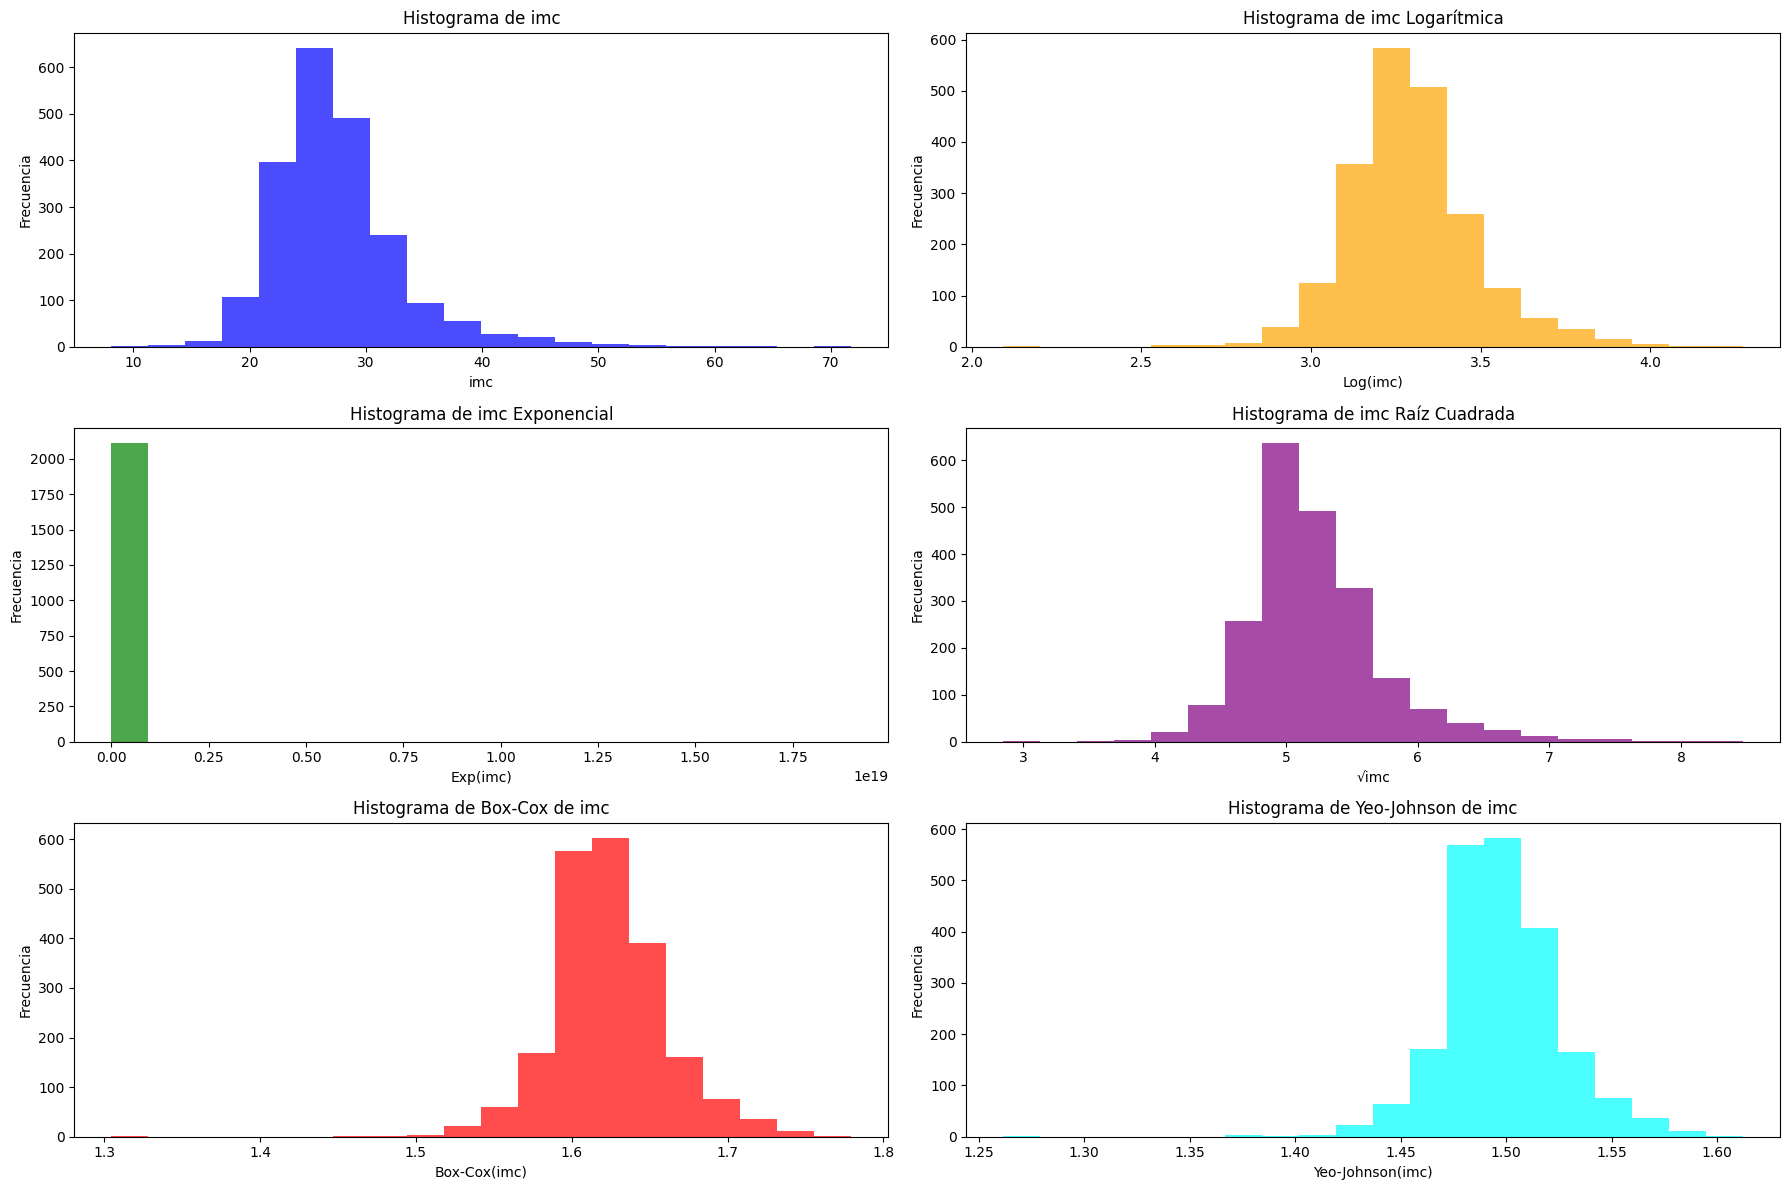


Resultados de normalidad para imc:
Original: Estadístico = 0.8865, p-value = 0.0000
Logarítmica: Estadístico = 0.9623, p-value = 0.0000
Exponencial: Estadístico = 0.0063, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9338, p-value = 0.0000
Box-Cox: Estadístico = 0.9683, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9691, p-value = 0.0000


In [ ]:
analizar_variable(df, "imc")

Este código permite analizar la variable 'imc' en detalle, identificando posibles problemas como valores nulos o datos no normalizados. Las transformaciones aplicadas ayudan a verificar si los datos se pueden ajustar a una distribución normal, lo cual es crucial para muchos modelos estadísticos y de machine learning.

In [ ]:
# Se usa yeo-johnson
df["imc_yj"], _ = stats.yeojohnson(df["imc"])
df["imc_yj_n"] = scaler.fit_transform(df[["imc_yj"]])

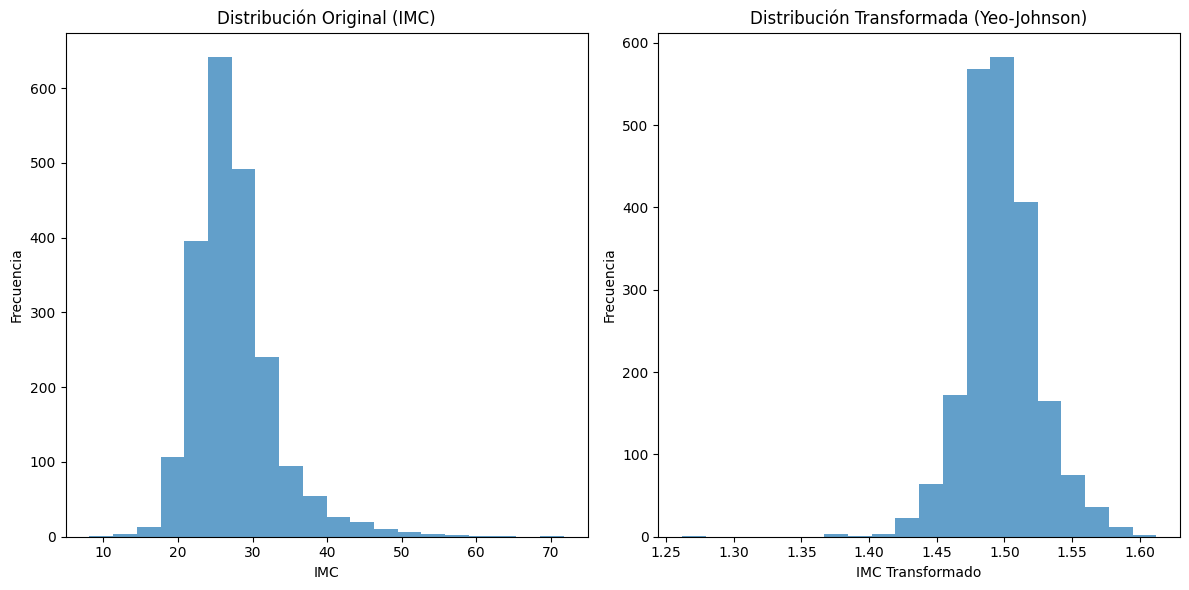

In [ ]:
# Verificar y manejar valores nulos
if df["imc"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'imc'. Se reemplazarán por la media.")
    df["imc"].fillna(df["imc"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["imc_yj"], _ = stats.yeojohnson(df["imc"])

# Normalizar los valores transformados con un rango personalizado (0 a 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df["imc_yj_n"] = scaler.fit_transform(df[["imc_yj"]])

# Comparación visual antes y después de la transformación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["imc"], bins=20, alpha=0.7)
plt.title("Distribución Original (IMC)")
plt.xlabel("IMC")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["imc_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("IMC Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código transforma y normaliza los valores de la columna 'imc' usando Yeo-Johnson y MinMaxScaler, lo que asegura que los datos estén en una escala adecuada y con una distribución más cercana a la normal.

#### hb

Se encontraron valores nulos en hb. Se eliminarán o reemplazarán.


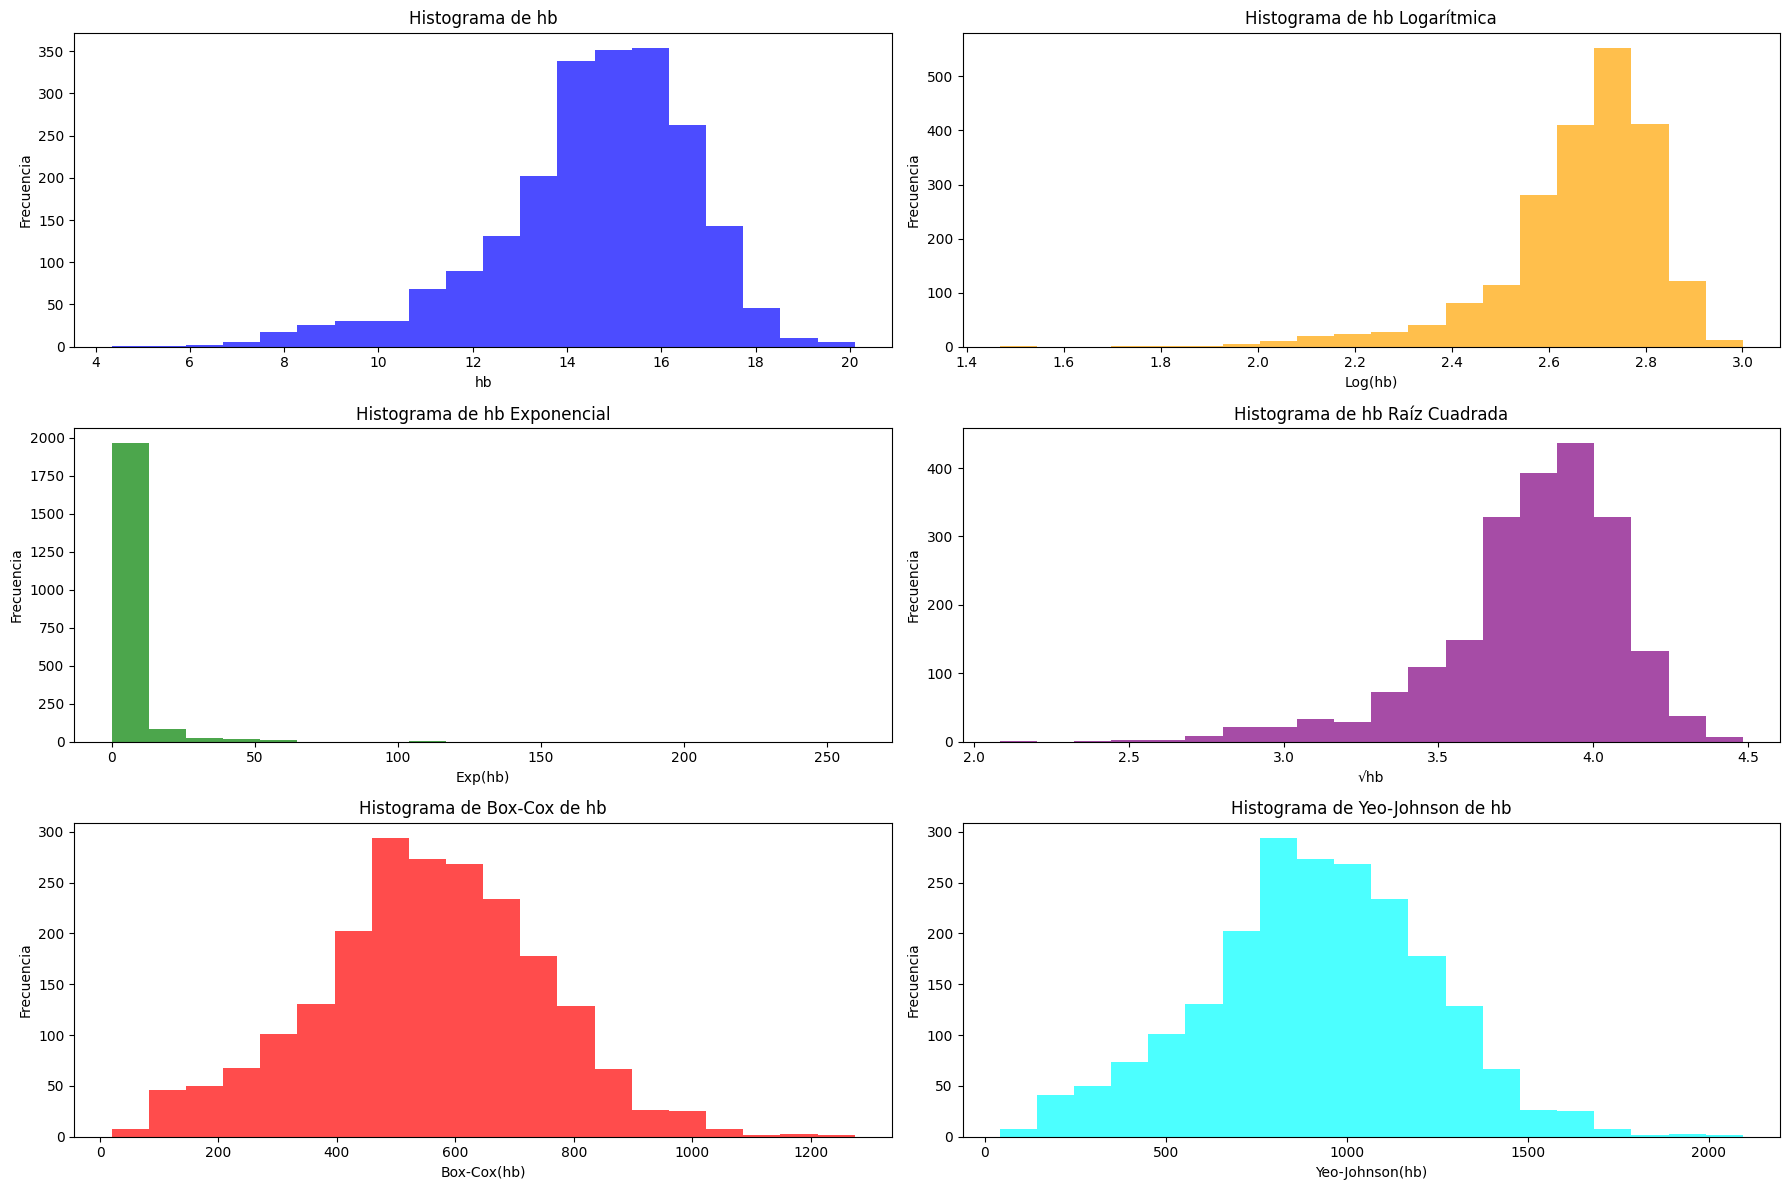


Resultados de normalidad para hb:
Original: Estadístico = 0.9551, p-value = 0.0000
Logarítmica: Estadístico = 0.8841, p-value = 0.0000
Exponencial: Estadístico = 0.3284, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9249, p-value = 0.0000
Box-Cox: Estadístico = 0.9968, p-value = 0.0002
Yeo-Johnson: Estadístico = 0.9968, p-value = 0.0002


In [ ]:
analizar_variable(df, "hb")

Este código realiza un análisis exhaustivo de la columna 'hb' para identificar problemas en la distribución y mejorarlos mediante transformaciones estadísticas. Las pruebas de normalidad ayudan a determinar qué transformación se ajusta mejor a una distribución normal.

Este análisis asegura que los datos de 'hb' estén listos para ser usados en modelos estadísticos o de machine learning, mejorando su rendimiento y precisión.

In [ ]:
df["hb_bc"], _ = stats.boxcox(df["hb"])
df["hb_bc_n"] = scaler.fit_transform(df[["hb_bc"]])

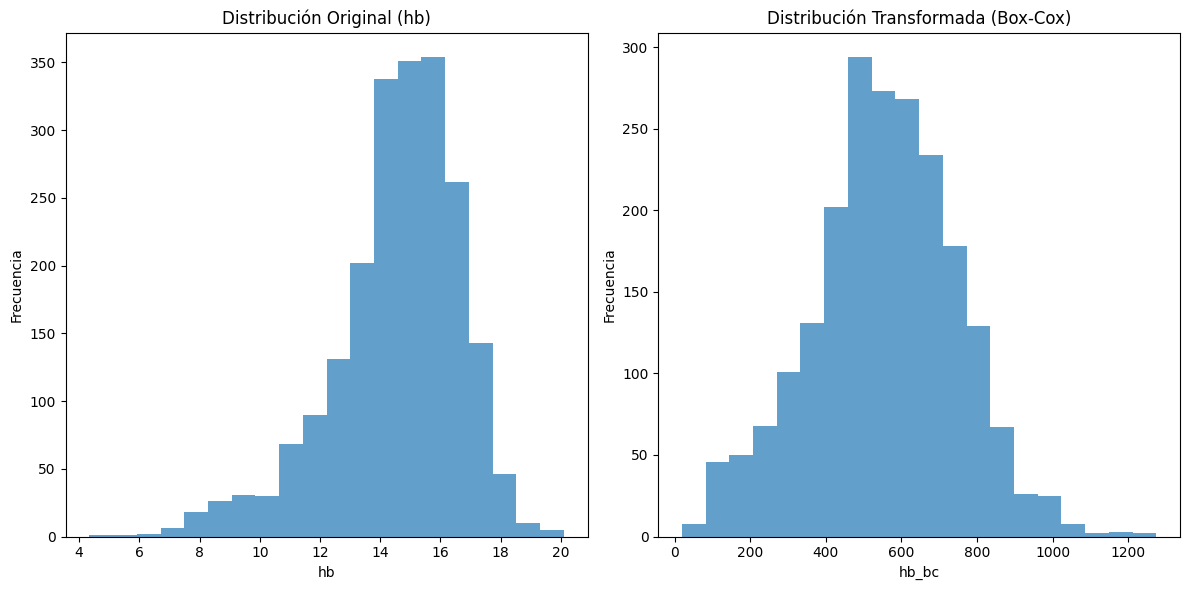

In [ ]:
# Verificar si hay valores nulos y reemplazarlos con la media
if df["hb"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'hb'. Se reemplazarán por la media.")
    df["hb"].fillna(df["hb"].mean(), inplace=True)

# Verificar si hay valores negativos o cero y ajustarlos
if df["hb"].min() <= 0:
    print("Ajustando valores de 'hb' para que sean positivos.")
    df["hb"] += (1 - df["hb"].min())

# Aplicar la transformación Box-Cox
df["hb_bc"], _ = stats.boxcox(df["hb"])

# Normalizar los valores transformados con MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df["hb_bc_n"] = scaler.fit_transform(df[["hb_bc"]])

# Visualización: comparar la distribución original y transformada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["hb"], bins=20, alpha=0.7)
plt.title("Distribución Original (hb)")
plt.xlabel("hb")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["hb_bc"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Box-Cox)")
plt.xlabel("hb_bc")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código transforma los valores de la columna 'hb' utilizando Box-Cox y luego los normaliza con MinMaxScaler. Estas operaciones preparan los datos para ser utilizados en análisis estadísticos o modelos predictivos.

#### hto

Se encontraron valores nulos en hto. Se eliminarán o reemplazarán.


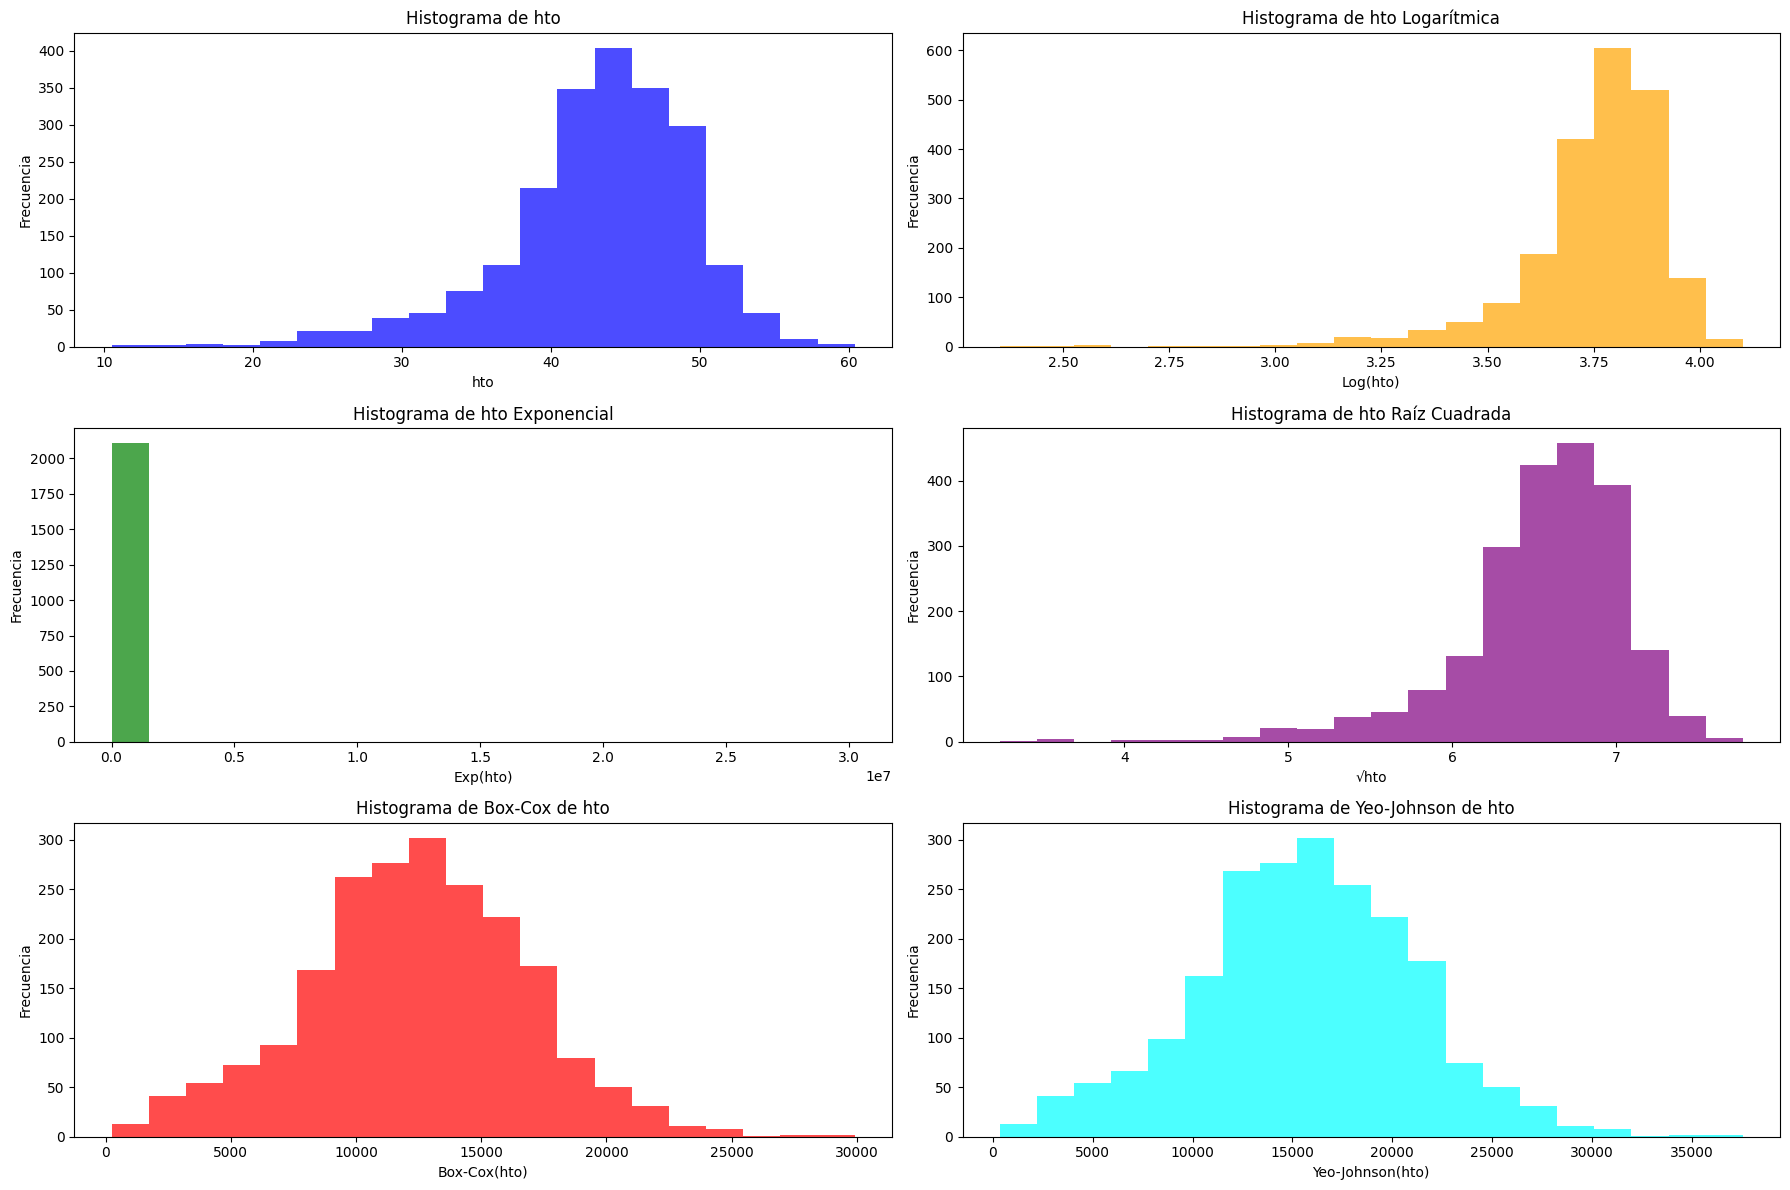


Resultados de normalidad para hto:
Original: Estadístico = 0.9429, p-value = 0.0000
Logarítmica: Estadístico = 0.8397, p-value = 0.0000
Exponencial: Estadístico = 0.0180, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9006, p-value = 0.0000
Box-Cox: Estadístico = 0.9967, p-value = 0.0002
Yeo-Johnson: Estadístico = 0.9968, p-value = 0.0002


In [ ]:
analizar_variable(df, "hto")

Este código realiza un análisis detallado de la columna 'hto' para detectar problemas de distribución y mejorarlos mediante transformaciones estadísticas. Las pruebas de normalidad ayudan a identificar qué transformación es más adecuada.

Este análisis asegura que la columna 'hto' esté lista para su uso en modelos estadísticos o de machine learning, mejorando su rendimiento y precisión.

In [ ]:
df["hto_yj"], _ = stats.yeojohnson(df["hto"])
df["hto_yj_n"] = scaler.fit_transform(df[["hto_yj"]])

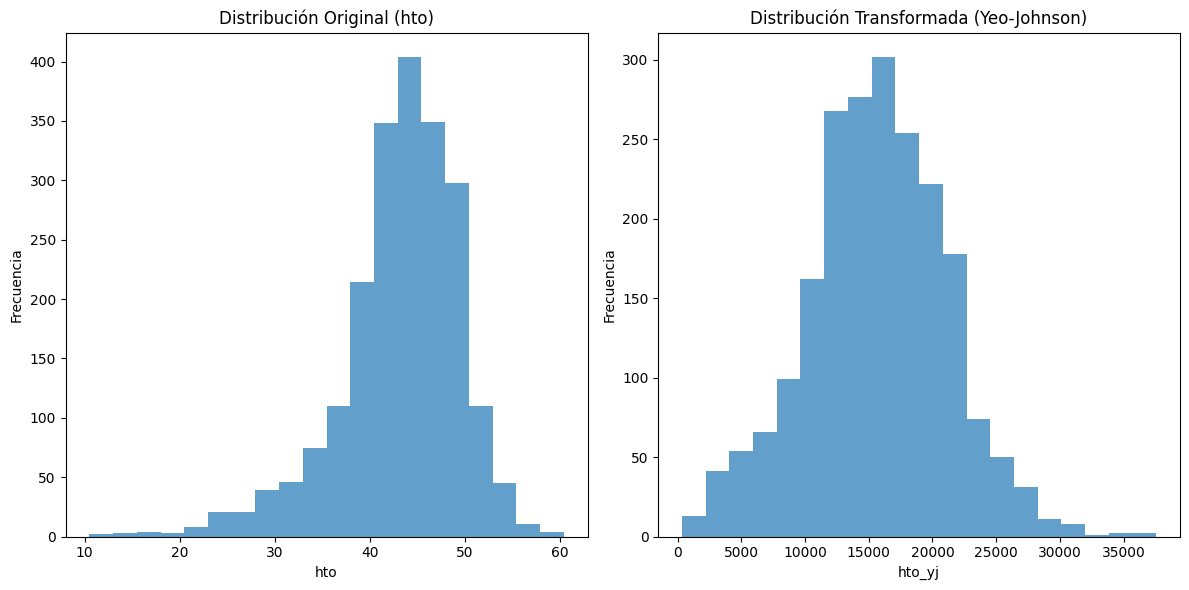

In [ ]:
# Verificar y manejar valores nulos
if df["hto"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'hto'. Se reemplazarán por la media.")
    df["hto"].fillna(df["hto"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["hto_yj"], _ = stats.yeojohnson(df["hto"])

# Normalizar los valores transformados (0 a 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df["hto_yj_n"] = scaler.fit_transform(df[["hto_yj"]])

# Comparación visual antes y después de la transformación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["hto"], bins=20, alpha=0.7)
plt.title("Distribución Original (hto)")
plt.xlabel("hto")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["hto_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("hto_yj")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código utiliza Yeo-Johnson para transformar la columna 'hto' y aproximar su distribución a la normalidad, seguido por una normalización utilizando MinMaxScaler. Este enfoque asegura que los datos estén listos para su uso en análisis estadísticos o modelos predictivos.

#### leucostotales

Se encontraron valores nulos en leucostotales. Se eliminarán o reemplazarán.


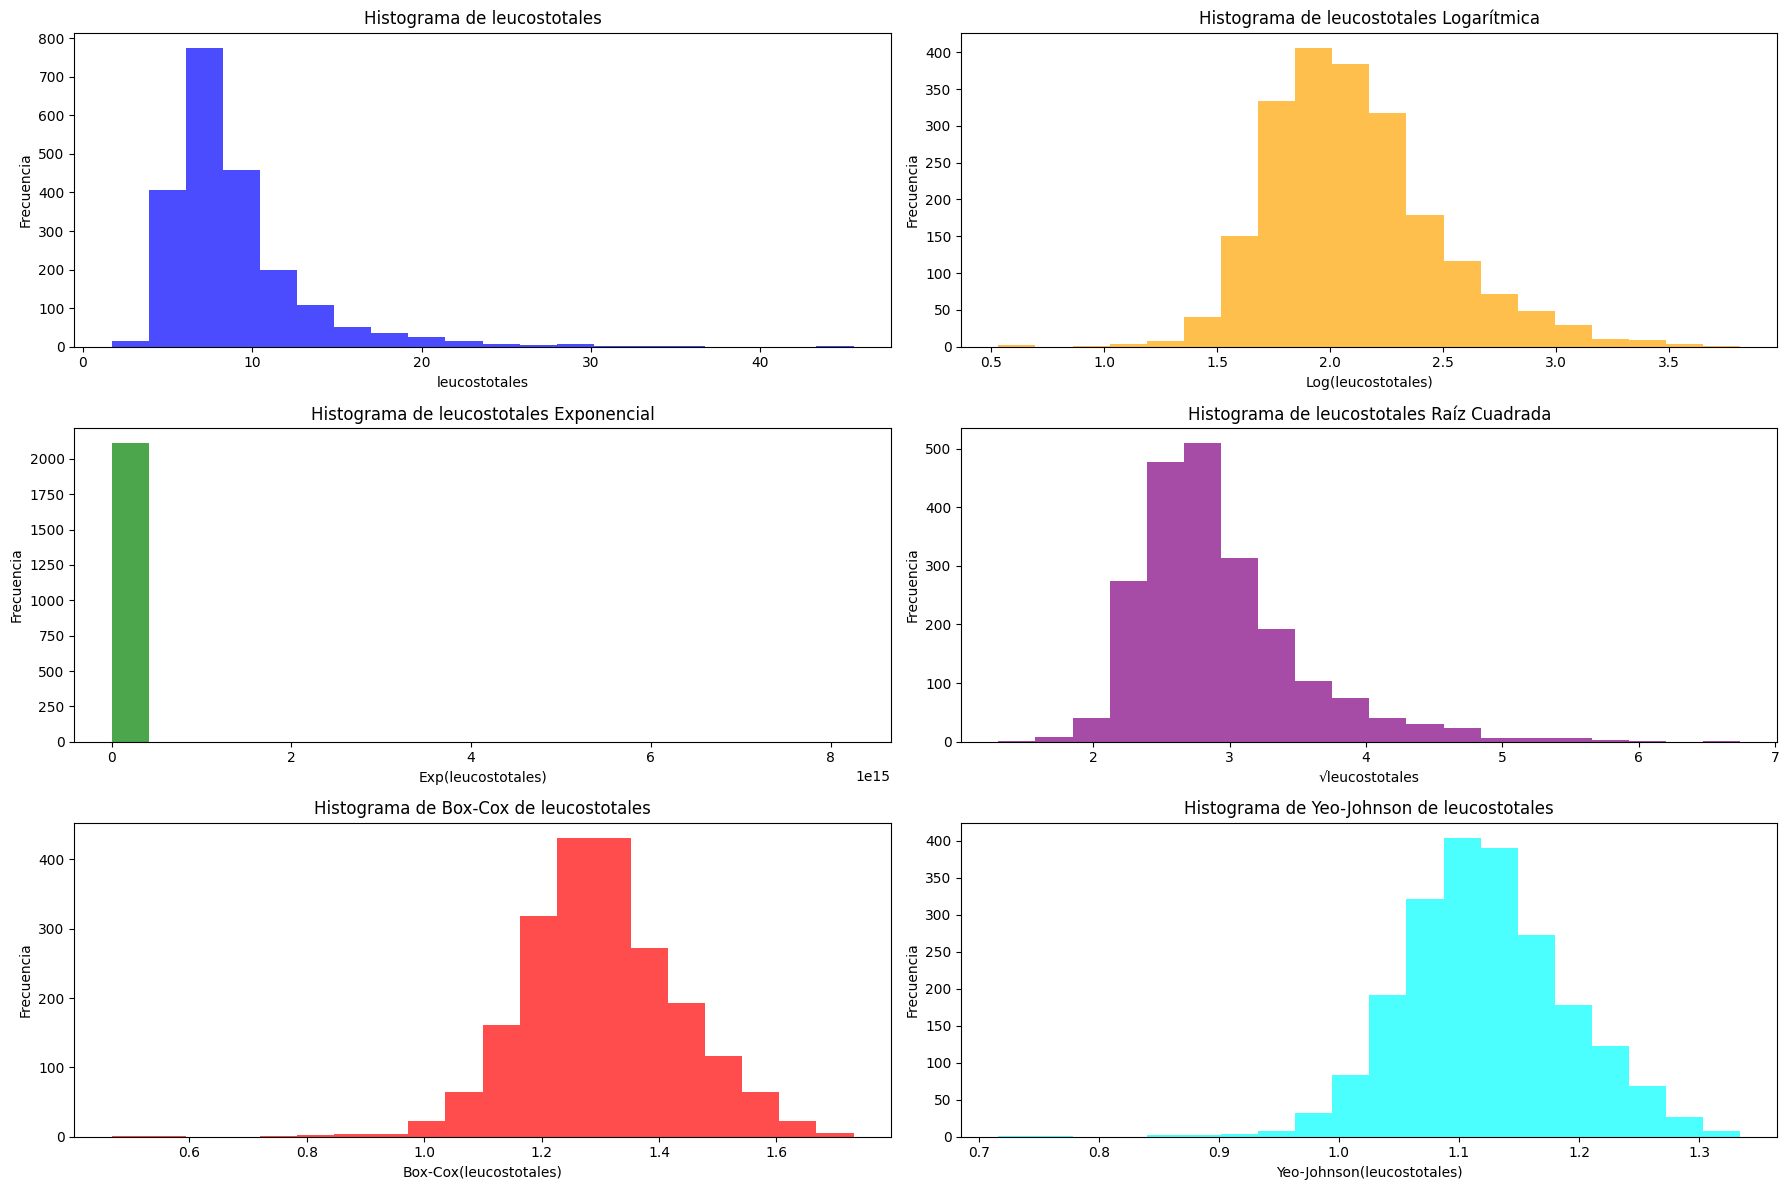


Resultados de normalidad para leucostotales:
Original: Estadístico = 0.7909, p-value = 0.0000
Logarítmica: Estadístico = 0.9672, p-value = 0.0000
Exponencial: Estadístico = 0.0063, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.8989, p-value = 0.0000
Box-Cox: Estadístico = 0.9871, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9899, p-value = 0.0000


In [ ]:
analizar_variable(df, "leucostotales")

Este código proporciona un análisis detallado de la columna 'leucostotales', aplicando varias transformaciones y evaluando su impacto mediante pruebas de normalidad.

Este análisis asegura que los datos estén limpios, transformados y listos para su uso en análisis estadísticos o modelos de machine learning.

In [ ]:
df["leucostotales_yj"], _ = stats.yeojohnson(df["leucostotales"])
df["leucostotales_yj_n"] = scaler.fit_transform(df[["leucostotales_yj"]])

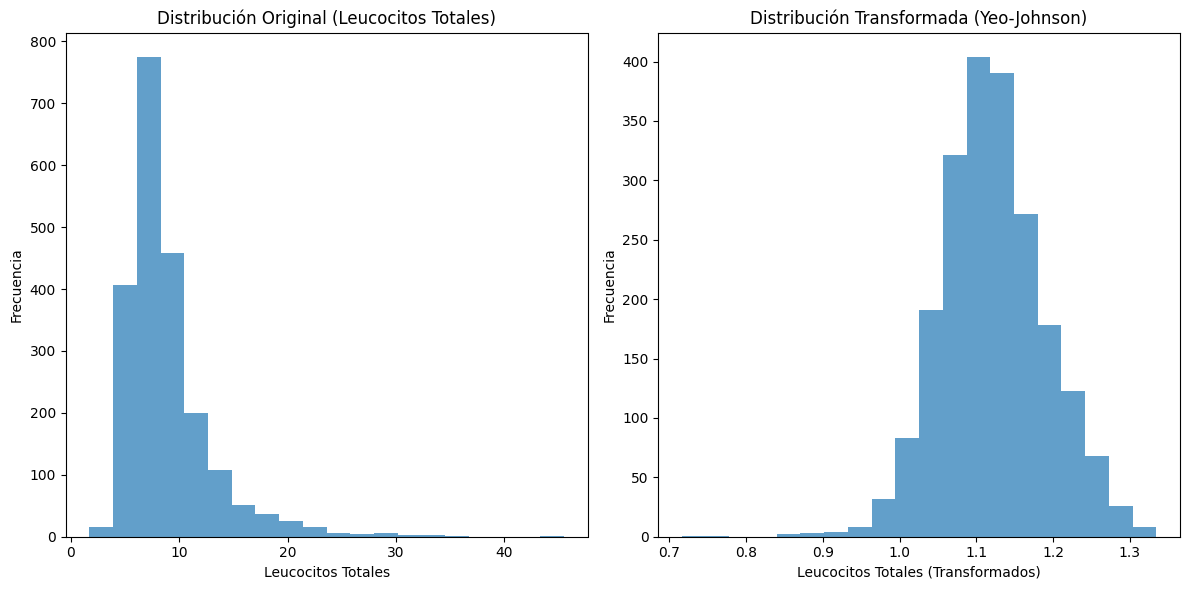

In [ ]:
# Verificar y manejar valores nulos
if df["leucostotales"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'leucostotales'. Se reemplazarán por la media.")
    df["leucostotales"].fillna(df["leucostotales"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["leucostotales_yj"], _ = stats.yeojohnson(df["leucostotales"])

# Normalizar los valores transformados con un rango personalizado (0 a 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df["leucostotales_yj_n"] = scaler.fit_transform(df[["leucostotales_yj"]])

# Comparar visualmente las distribuciones original y transformada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["leucostotales"], bins=20, alpha=0.7)
plt.title("Distribución Original (Leucocitos Totales)")
plt.xlabel("Leucocitos Totales")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["leucostotales_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Leucocitos Totales (Transformados)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Este código utiliza Yeo-Johnson para transformar los valores de 'leucostotales' y aproximarlos a una distribución normal, seguido de una normalización con MinMaxScaler. Este enfoque asegura que los datos estén preparados y listos para análisis y modelos predictivos.

#### linfos

Se encontraron valores nulos en linfos. Se eliminarán o reemplazarán.


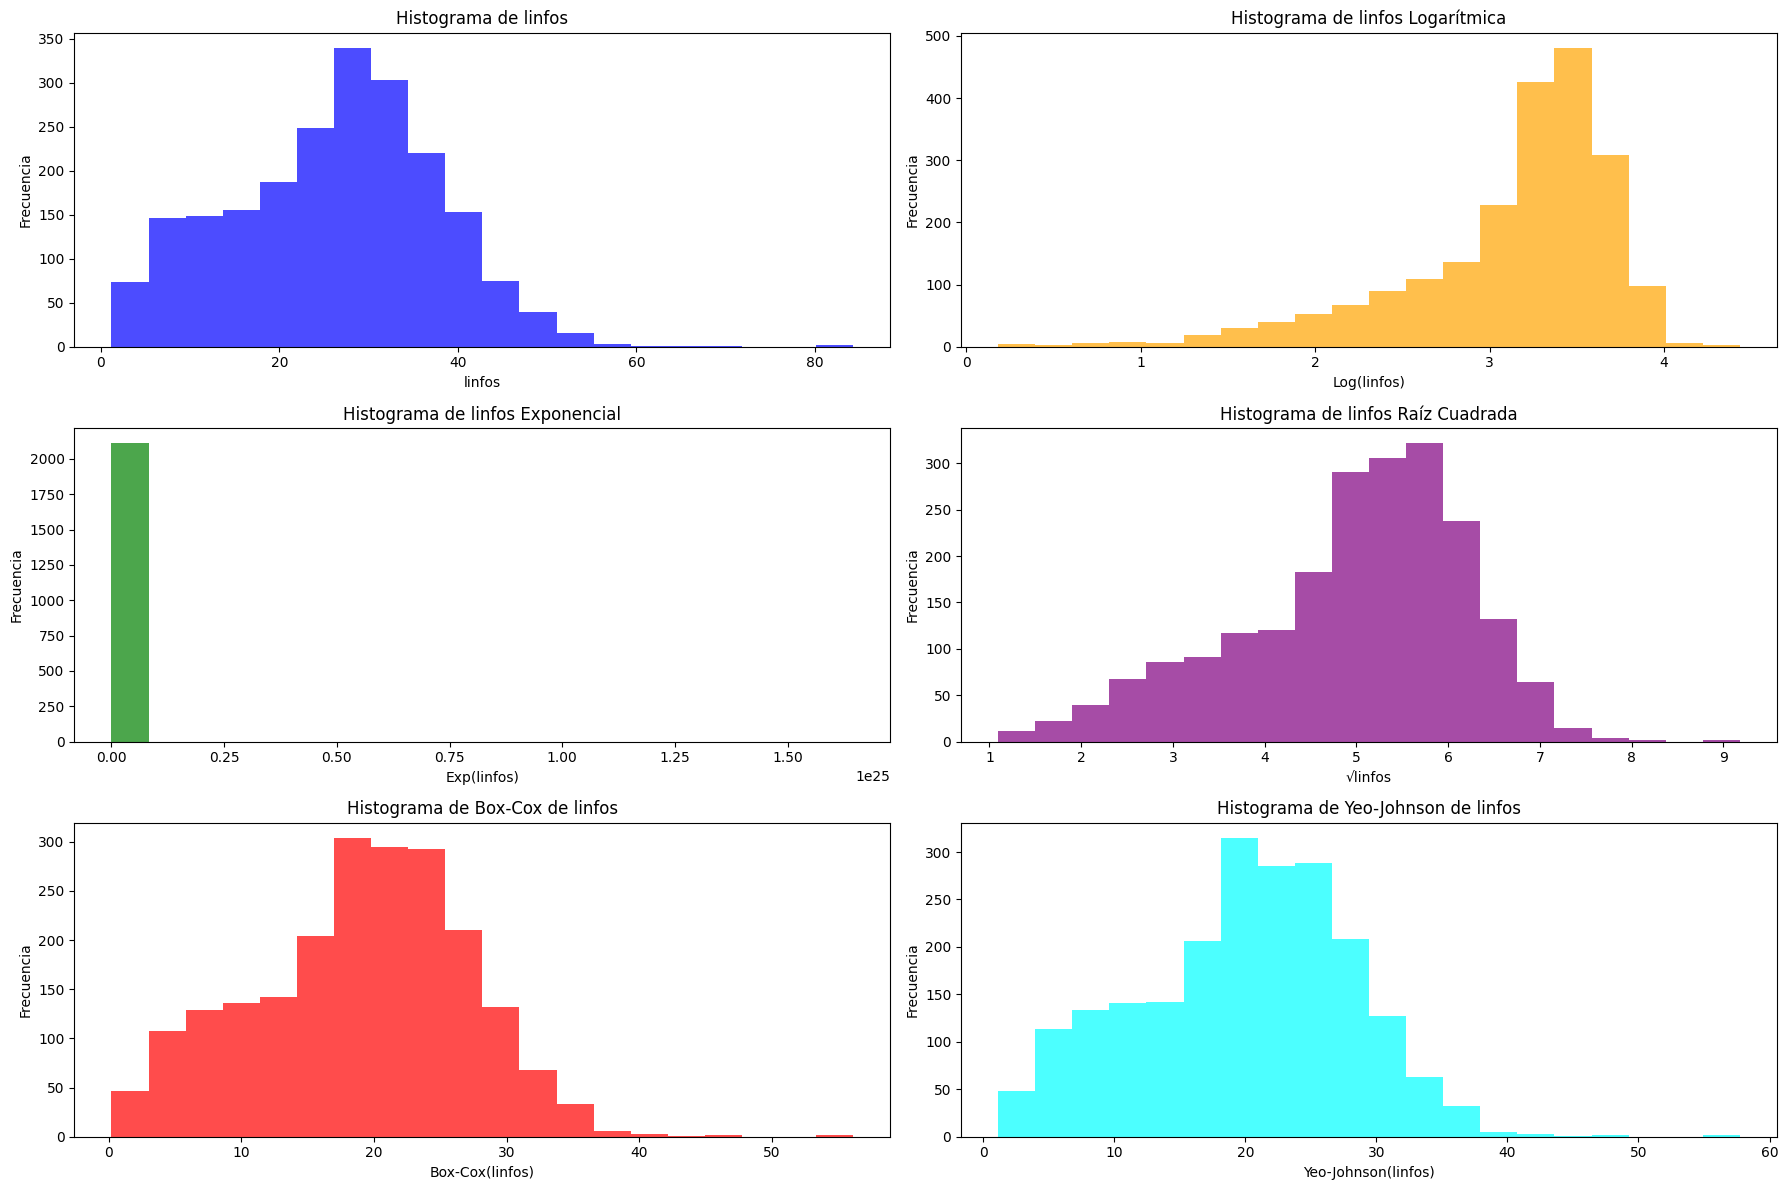


Resultados de normalidad para linfos:
Original: Estadístico = 0.9858, p-value = 0.0000
Logarítmica: Estadístico = 0.8768, p-value = 0.0000
Exponencial: Estadístico = 0.0093, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9629, p-value = 0.0000
Box-Cox: Estadístico = 0.9853, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9854, p-value = 0.0000


In [ ]:
analizar_variable(df, "linfos")

Este código permite analizar la columna 'linfos' en detalle, asegurando que los datos estén limpios y preparados para análisis o modelos predictivos. Las mejoras propuestas incluyen un manejo más flexible de valores nulos, la detección de outliers y visualizaciones más claras.

In [ ]:
df["linfos_sr"] = np.sqrt(df["linfos"])
df["linfos_sr_n"] = scaler.fit_transform(df[["linfos_sr"]])

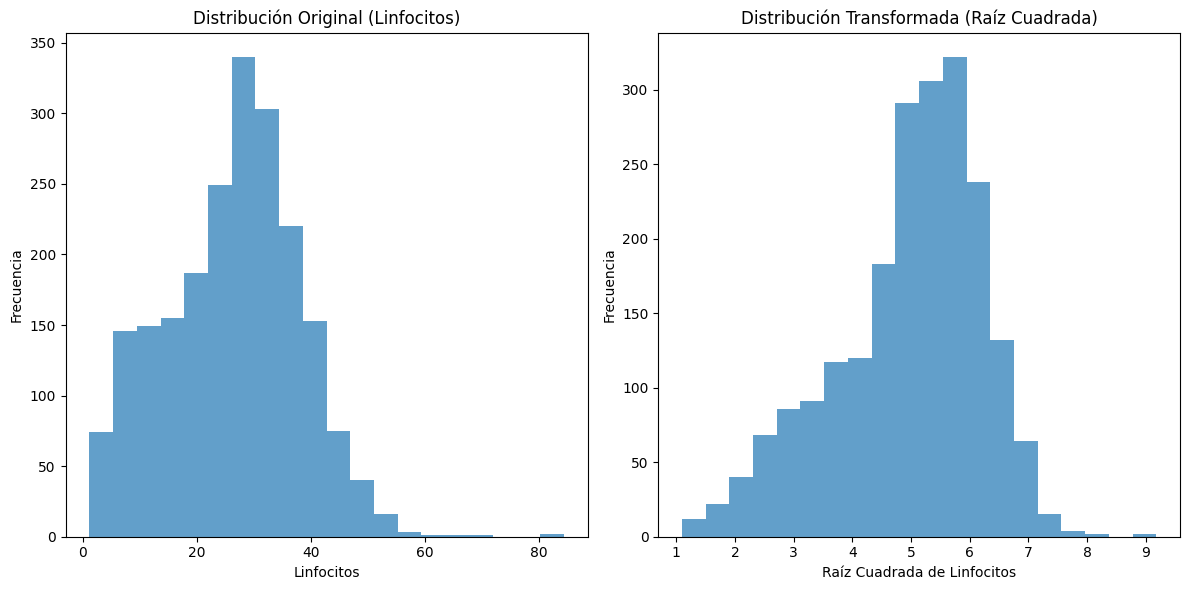

In [ ]:
# Verificar si hay valores negativos o nulos y ajustarlos
if (df["linfos"] <= 0).any():
    print("Ajustando valores negativos o nulos en 'linfos'.")
    df["linfos"] = df["linfos"] + abs(df["linfos"].min()) + 1

# Aplicar la transformación de raíz cuadrada
df["linfos_sr"] = np.sqrt(df["linfos"])

# Normalizar los valores transformados
scaler = MinMaxScaler(feature_range=(0, 1))
df["linfos_sr_n"] = scaler.fit_transform(df[["linfos_sr"]])

# Comparación visual antes y después de la transformación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["linfos"], bins=20, alpha=0.7)
plt.title("Distribución Original (Linfocitos)")
plt.xlabel("Linfocitos")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["linfos_sr"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Raíz Cuadrada)")
plt.xlabel("Raíz Cuadrada de Linfocitos")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código aplica la transformación de raíz cuadrada y luego normaliza los valores usando MinMaxScaler.

Este proceso garantiza que los datos estén preparados y listos para su uso en análisis estadísticos o modelos predictivos, mejorando la precisión de los modelos que dependen de distribuciones más cercanas a la normalidad.

#### neutrofilos

Se encontraron valores nulos en neutrofilos. Se eliminarán o reemplazarán.


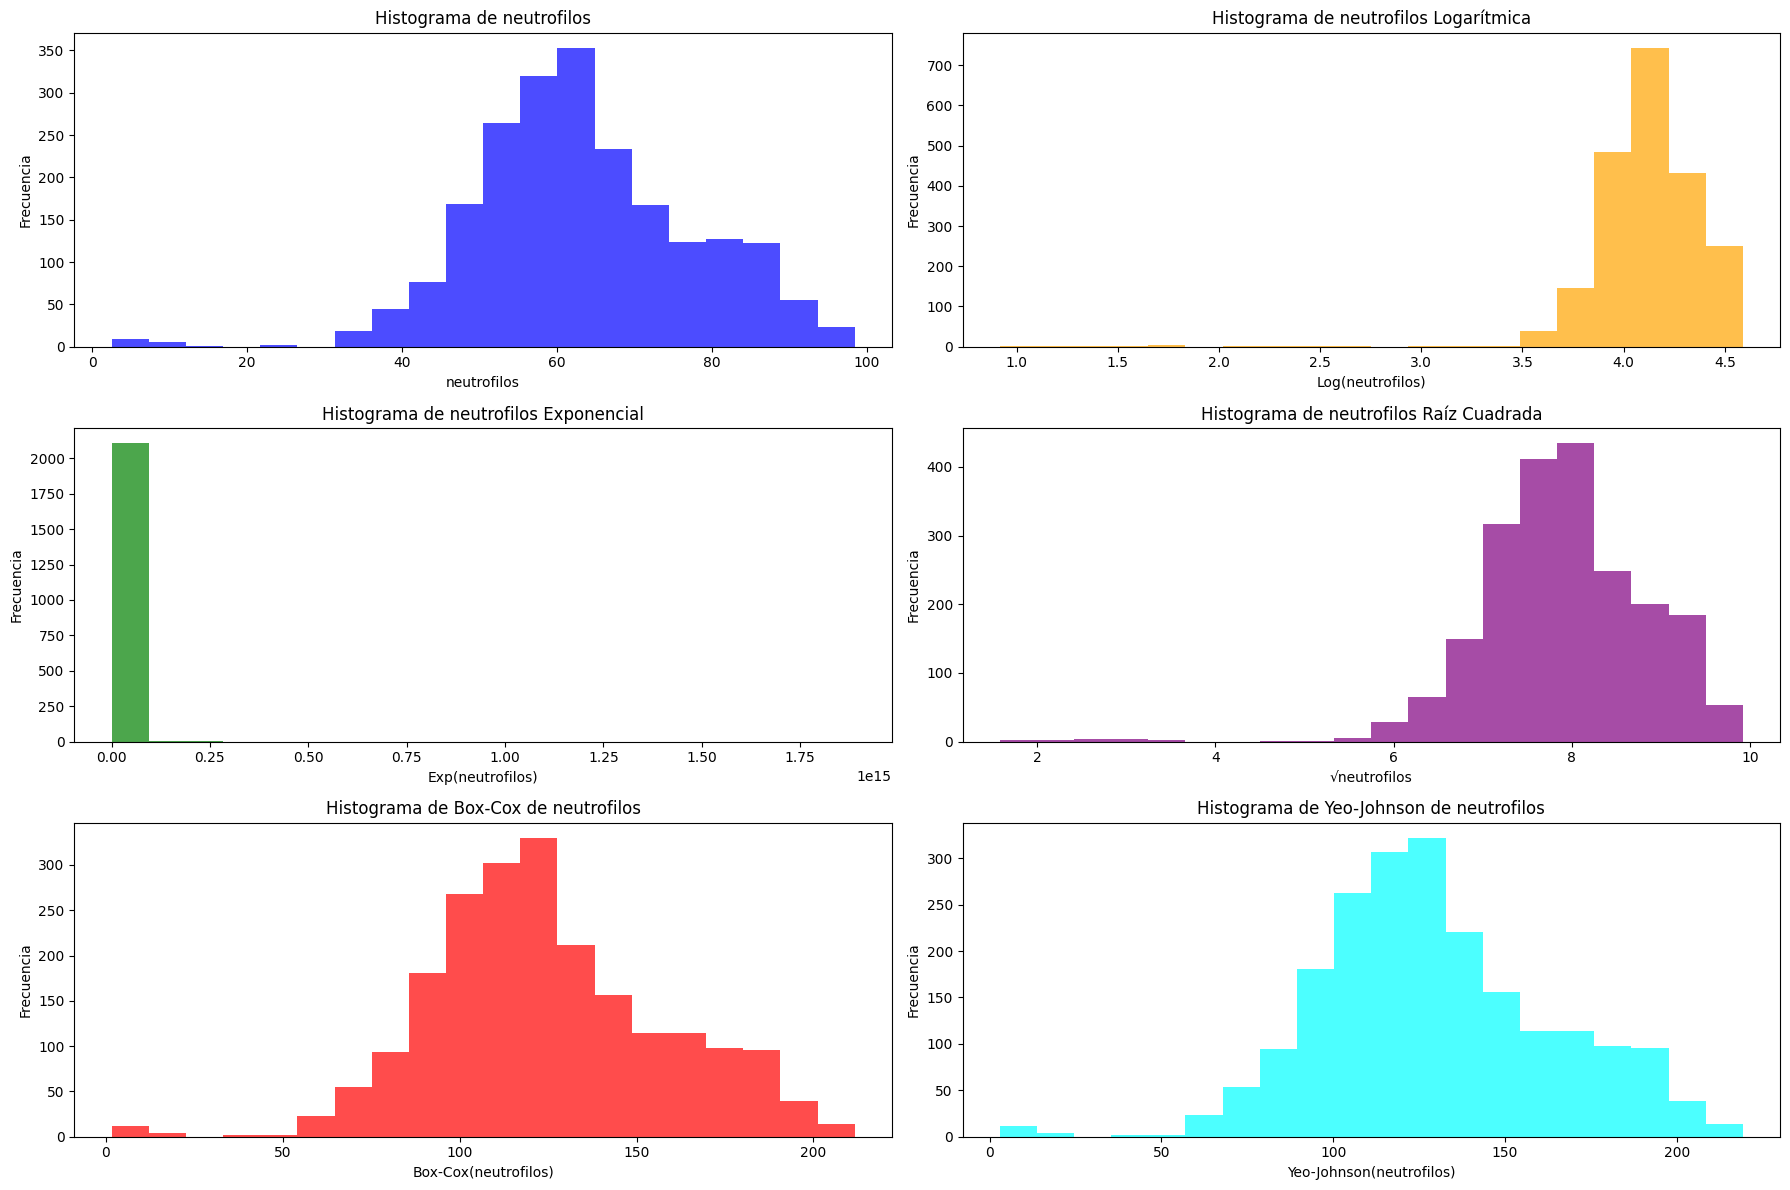


Resultados de normalidad para neutrofilos:
Original: Estadístico = 0.9752, p-value = 0.0000
Logarítmica: Estadístico = 0.7397, p-value = 0.0000
Exponencial: Estadístico = 0.0185, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9205, p-value = 0.0000
Box-Cox: Estadístico = 0.9795, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9795, p-value = 0.0000


In [ ]:
analizar_variable(df, "neutrofilos")

Este análisis garantiza que la columna 'neutrofilos' esté lista para su uso en modelos estadísticos o algoritmos de machine learning. La función maneja valores nulos y negativos, aplica varias transformaciones, y realiza pruebas de normalidad para identificar cuál es la más adecuada.

In [ ]:
df["neutrofilos_yj"], _ = stats.yeojohnson(df["neutrofilos"])
df["neutrofilos_yj_n"] = scaler.fit_transform(df[["neutrofilos_yj"]])

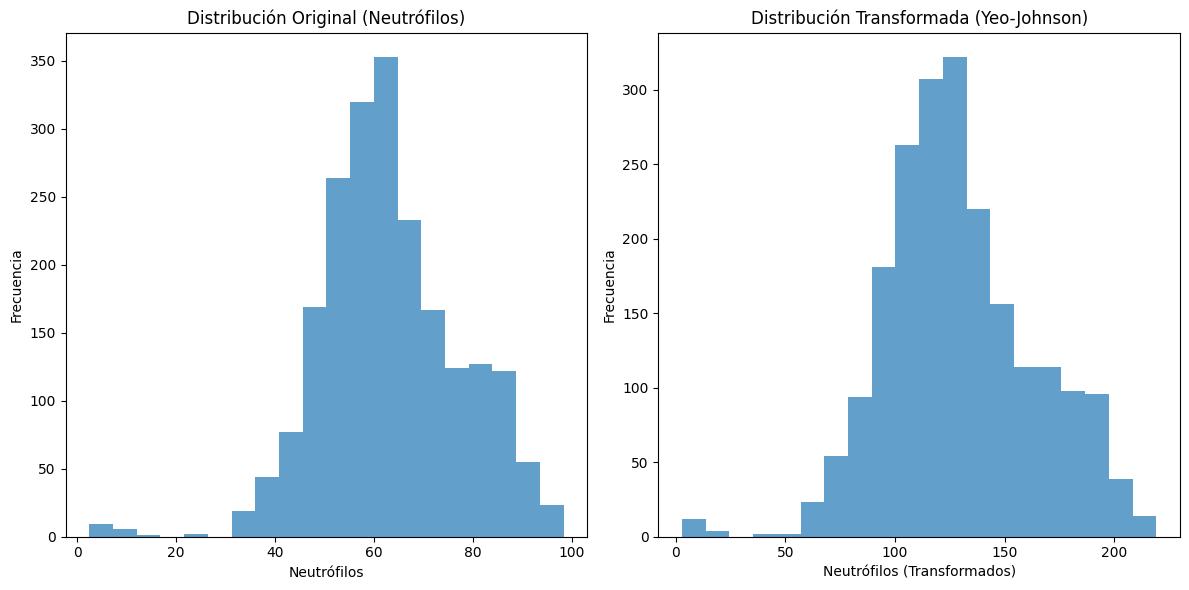

In [ ]:
# Verificar y manejar valores nulos
if df["neutrofilos"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'neutrofilos'. Se reemplazarán por la media.")
    df["neutrofilos"].fillna(df["neutrofilos"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["neutrofilos_yj"], _ = stats.yeojohnson(df["neutrofilos"])

# Normalizar los valores transformados
scaler = MinMaxScaler(feature_range=(0, 1))
df["neutrofilos_yj_n"] = scaler.fit_transform(df[["neutrofilos_yj"]])

# Comparar visualmente las distribuciones original y transformada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["neutrofilos"], bins=20, alpha=0.7)
plt.title("Distribución Original (Neutrófilos)")
plt.xlabel("Neutrófilos")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["neutrofilos_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Neutrófilos (Transformados)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código aplica la transformación Yeo-Johnson a la columna 'neutrofilos' para mejorar la distribución y luego normaliza los valores usando MinMaxScaler.

Este proceso asegura que los datos estén preparados para análisis estadísticos o modelos de machine learning, mejorando su rendimiento y precisión.


#### tp

Se encontraron valores nulos en tp. Se eliminarán o reemplazarán.


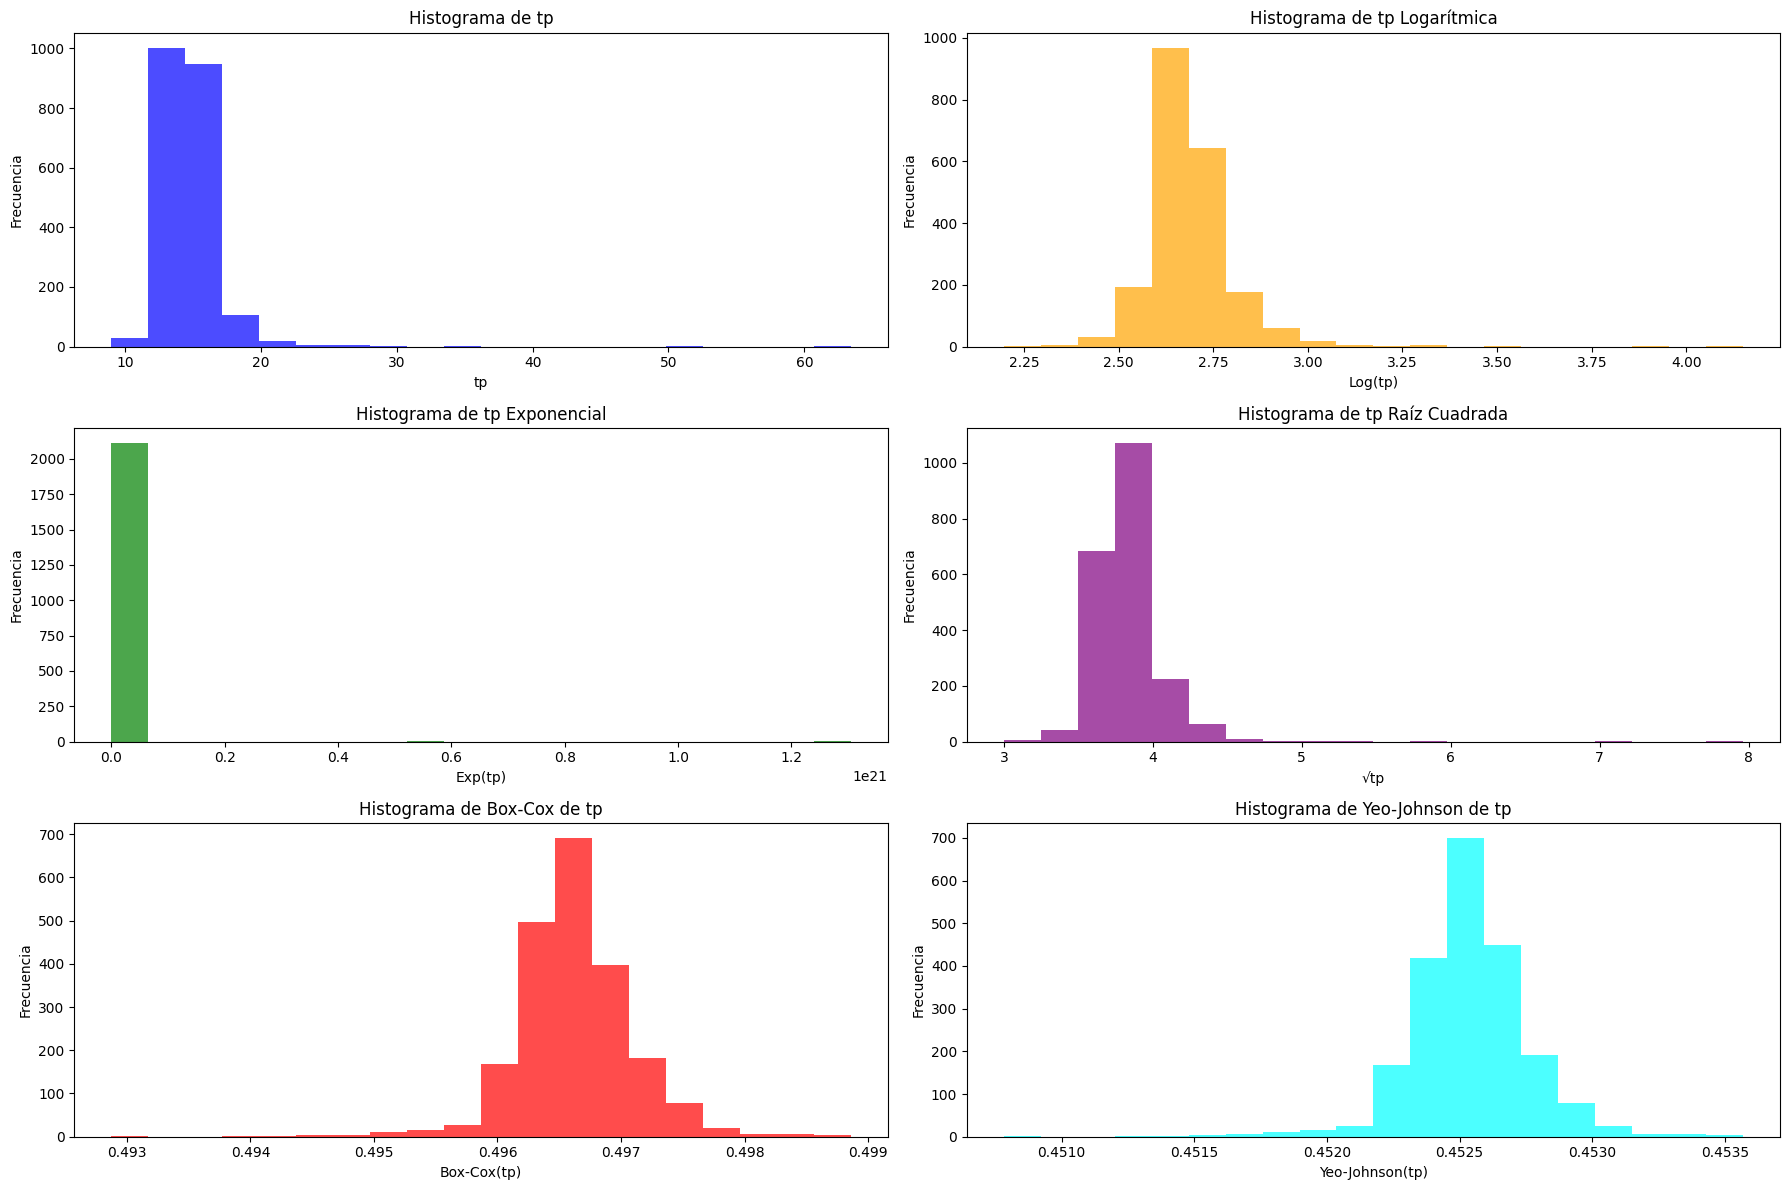


Resultados de normalidad para tp:
Original: Estadístico = 0.5185, p-value = 0.0000
Logarítmica: Estadístico = 0.8019, p-value = 0.0000
Exponencial: Estadístico = 0.0102, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.6808, p-value = 0.0000
Box-Cox: Estadístico = 0.9450, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9463, p-value = 0.0000


In [ ]:
analizar_variable(df, "tp")

Este análisis garantiza que los datos de la columna 'tp' estén limpios y preparados para su uso en análisis estadísticos o modelos de machine learning. La función detecta problemas en la distribución, aplica transformaciones y realiza pruebas de normalidad para identificar cuál es la más adecuada.

In [ ]:
df["tp_yj"], _ = stats.yeojohnson(df["tp"])
df["tp_yj_n"] = scaler.fit_transform(df[["tp_yj"]])

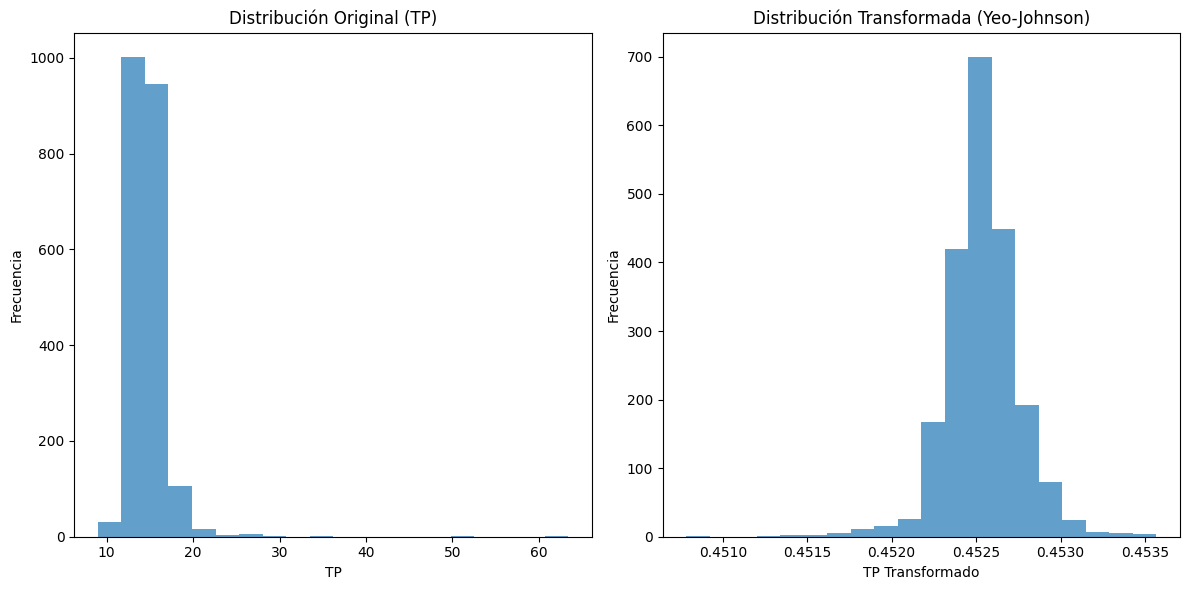

In [ ]:
# Verificar y manejar valores nulos
if df["tp"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'tp'. Se reemplazarán por la media.")
    df["tp"].fillna(df["tp"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["tp_yj"], _ = stats.yeojohnson(df["tp"])

# Normalizar los valores transformados
scaler = MinMaxScaler(feature_range=(0, 1))
df["tp_yj_n"] = scaler.fit_transform(df[["tp_yj"]])

# Comparación visual antes y después de la transformación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["tp"], bins=20, alpha=0.7)
plt.title("Distribución Original (TP)")
plt.xlabel("TP")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["tp_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("TP Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código aplica la transformación Yeo-Johnson a la columna 'tp' para mejorar la distribución y luego normaliza los valores utilizando MinMaxScaler.

Este enfoque garantiza que los datos estén listos para análisis estadísticos o modelos de machine learning, asegurando un mejor rendimiento y precisión en los resultados.

#### ttp

Se encontraron valores nulos en ttp. Se eliminarán o reemplazarán.


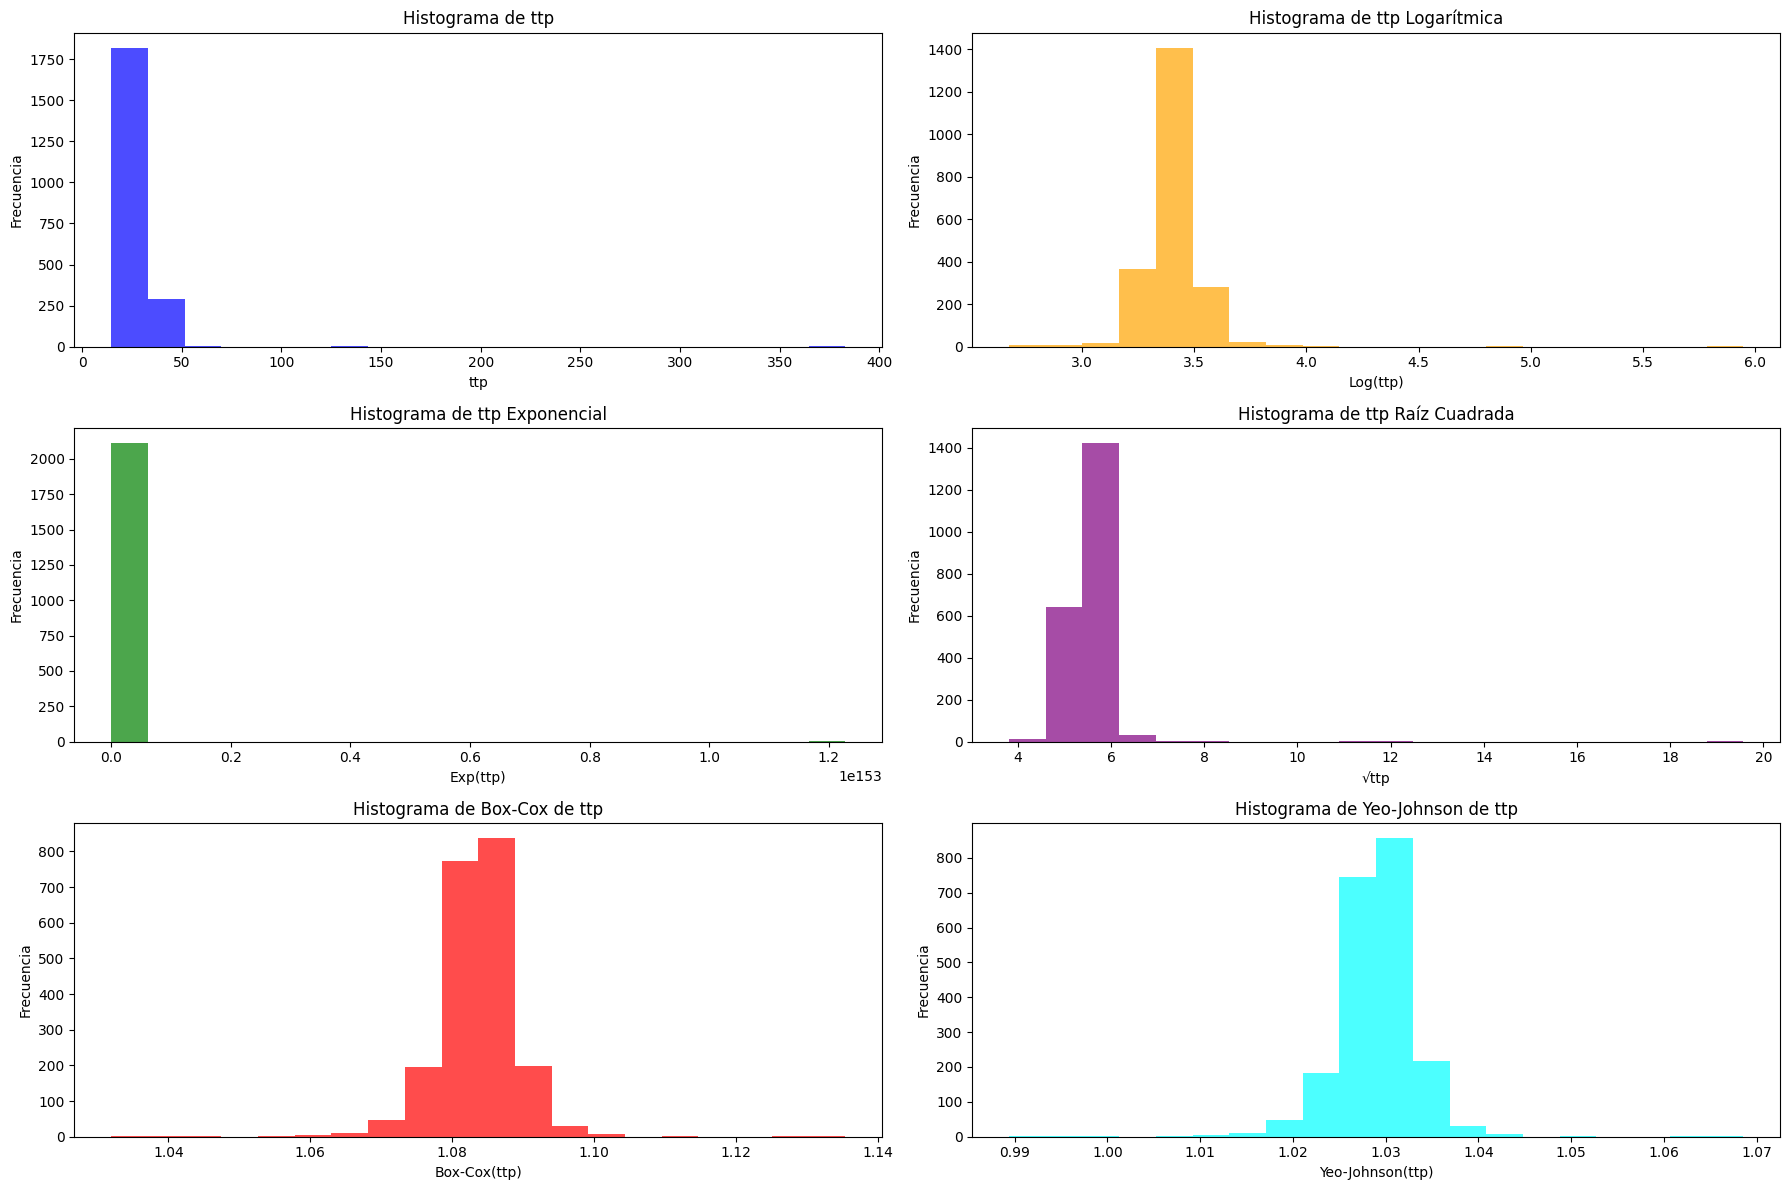


Resultados de normalidad para ttp:
Original: Estadístico = 0.1964, p-value = 0.0000
Logarítmica: Estadístico = 0.7411, p-value = 0.0000
Exponencial: Estadístico = 0.0063, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.4770, p-value = 0.0000
Box-Cox: Estadístico = 0.8788, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.8810, p-value = 0.0000


In [ ]:
analizar_variable(df, "ttp")

Este análisis garantiza que los datos de la columna 'ttp' estén limpios y preparados para su uso en modelos estadísticos o de machine learning. El código maneja valores nulos y negativos, aplica varias transformaciones, y realiza pruebas de normalidad para identificar cuál es la mejor opción.

In [ ]:
df["ttp_yj"], _ = stats.yeojohnson(df["ttp"])
df["ttp_yj_n"] = scaler.fit_transform(df[["ttp_yj"]])

In [ ]:
# Verificar y manejar valores nulos
if df["ttp"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'ttp'. Se reemplazarán por la media.")
    df["ttp"].fillna(df["ttp"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["ttp_yj"], _ = stats.yeojohnson(df["ttp"])

# Normalizar los valores transformados con MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df["ttp_yj_n"] = scaler.fit_transform(df[["ttp_yj"]])

# Visualización de la distribución antes y después de la transformación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["ttp"], bins=20, alpha=0.7)
plt.title("Distribución Original (TTP)")
plt.xlabel("TTP")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["ttp_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("TTP Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código prepara la columna 'ttp' mediante una transformación Yeo-Johnson y la normaliza con MinMaxScaler, asegurando que los datos tengan una distribución adecuada y una escala uniforme.

Este enfoque garantiza que los datos estén listos para análisis estadísticos y modelos predictivos, mejorando la precisión y el rendimiento del análisis.

#### glucosa

Se encontraron valores nulos en glucosa. Se eliminarán o reemplazarán.


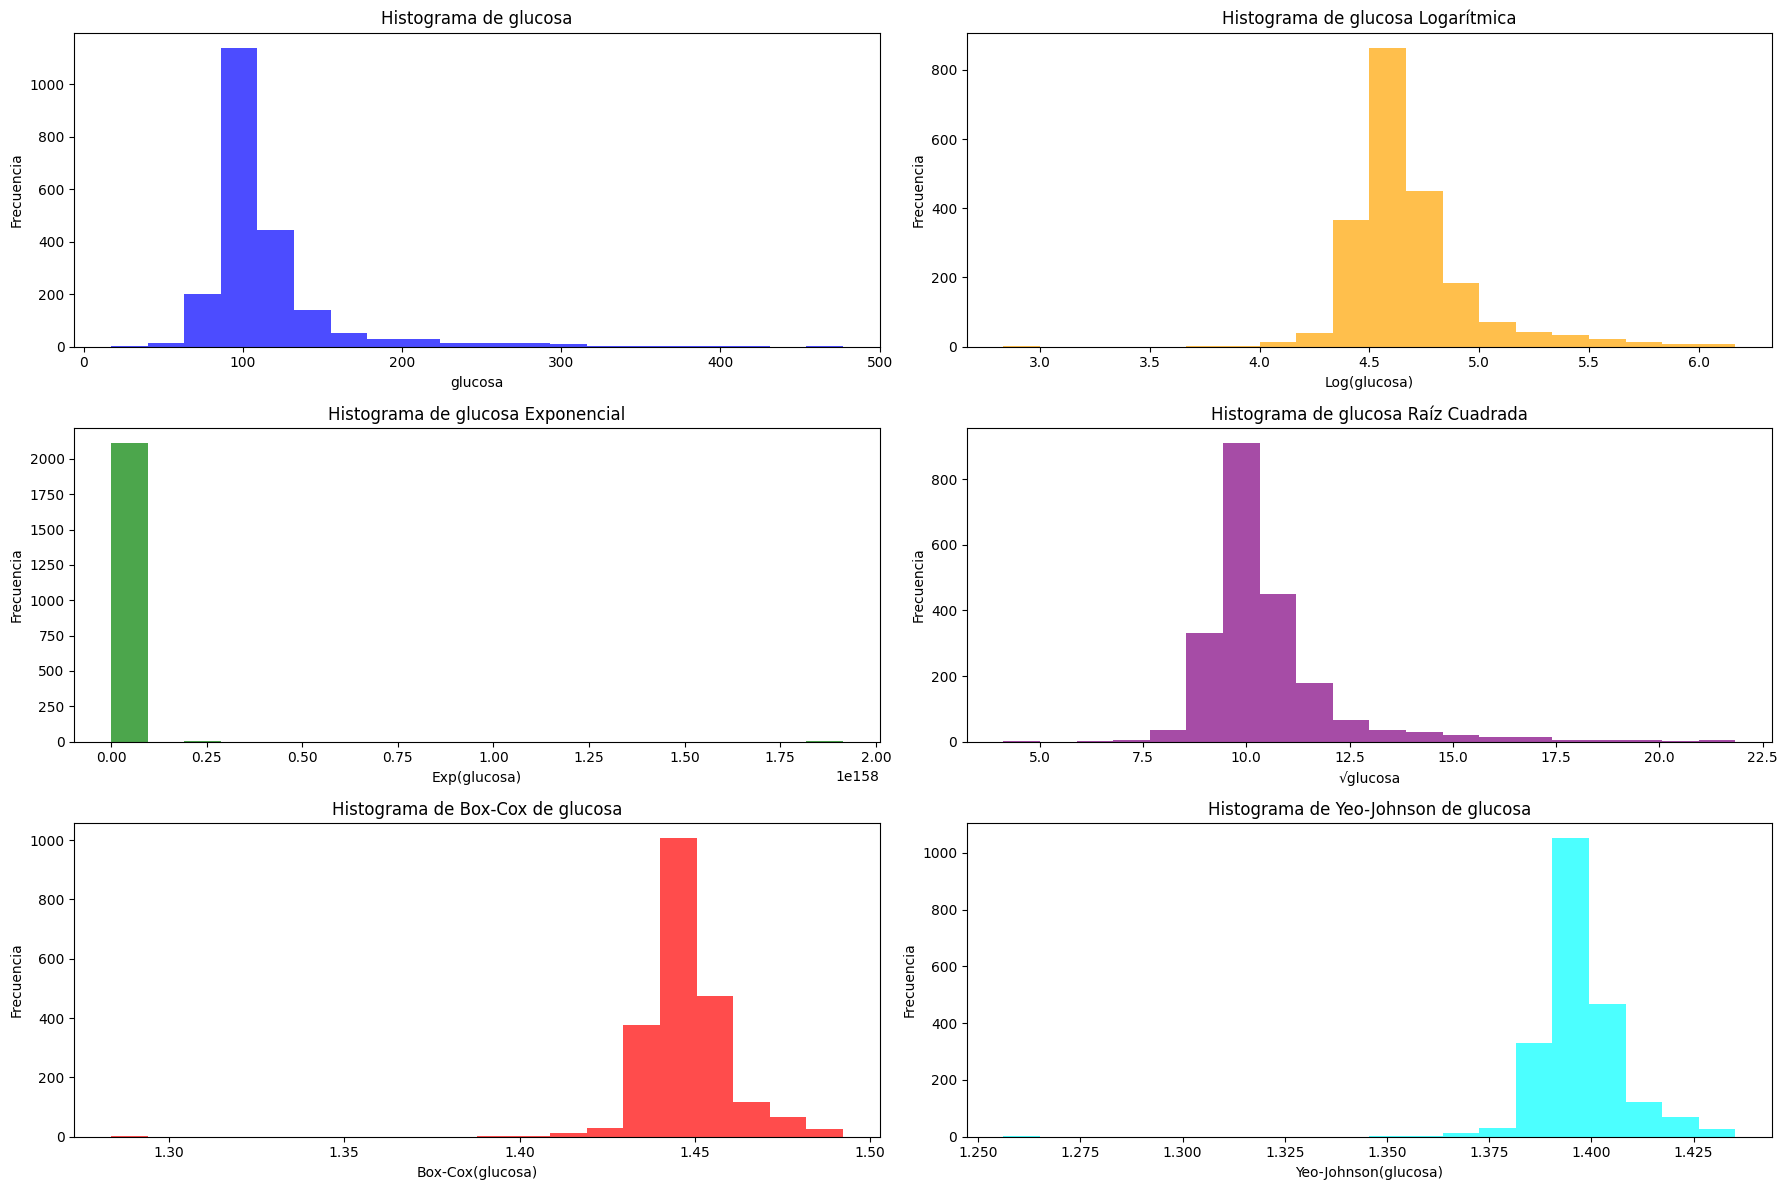


Resultados de normalidad para glucosa:
Original: Estadístico = 0.6292, p-value = 0.0000
Logarítmica: Estadístico = 0.8428, p-value = 0.0000
Exponencial: Estadístico = 0.0078, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.7484, p-value = 0.0000
Box-Cox: Estadístico = 0.8780, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.8795, p-value = 0.0000


In [ ]:
analizar_variable(df, "glucosa")

Este análisis garantiza que los datos de la columna 'glucosa' estén preparados para su uso en análisis estadísticos y modelos predictivos. La función detecta problemas en la distribución, aplica varias transformaciones y realiza pruebas de normalidad para identificar la mejor opción.

In [ ]:
df["glucosa_yj"], _ = stats.yeojohnson(df["glucosa"])
df["glucosa_yj_n"] = scaler.fit_transform(df[["glucosa_yj"]])

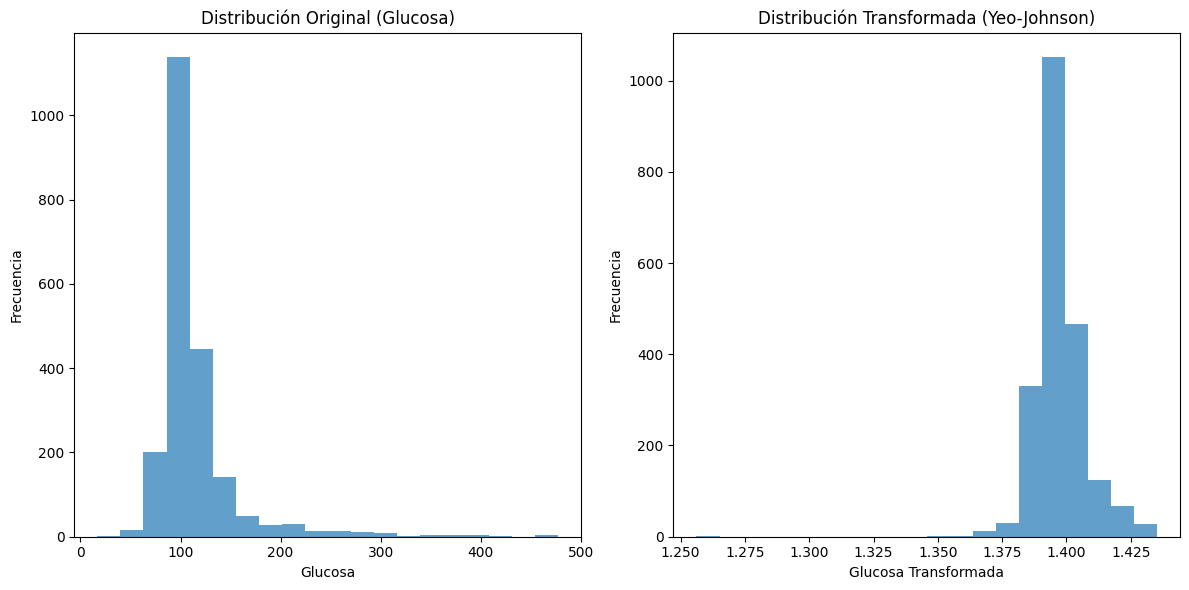

In [ ]:
# Verificar y manejar valores nulos
if df["glucosa"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'glucosa'. Se reemplazarán por la media.")
    df["glucosa"].fillna(df["glucosa"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["glucosa_yj"], _ = stats.yeojohnson(df["glucosa"])

# Normalizar los valores transformados
scaler = MinMaxScaler(feature_range=(0, 1))
df["glucosa_yj_n"] = scaler.fit_transform(df[["glucosa_yj"]])

# Visualización de las distribuciones
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["glucosa"], bins=20, alpha=0.7)
plt.title("Distribución Original (Glucosa)")
plt.xlabel("Glucosa")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["glucosa_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Glucosa Transformada")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código transforma y normaliza los valores de la columna 'glucosa' para preparar los datos de manera adecuada para análisis y modelos predictivos.

Estas acciones garantizan que los datos estén limpios y preparados para su uso en análisis estadísticos y modelos de machine learning, mejorando la precisión y rendimiento del análisis.

#### bun

Se encontraron valores nulos en bun. Se eliminarán o reemplazarán.


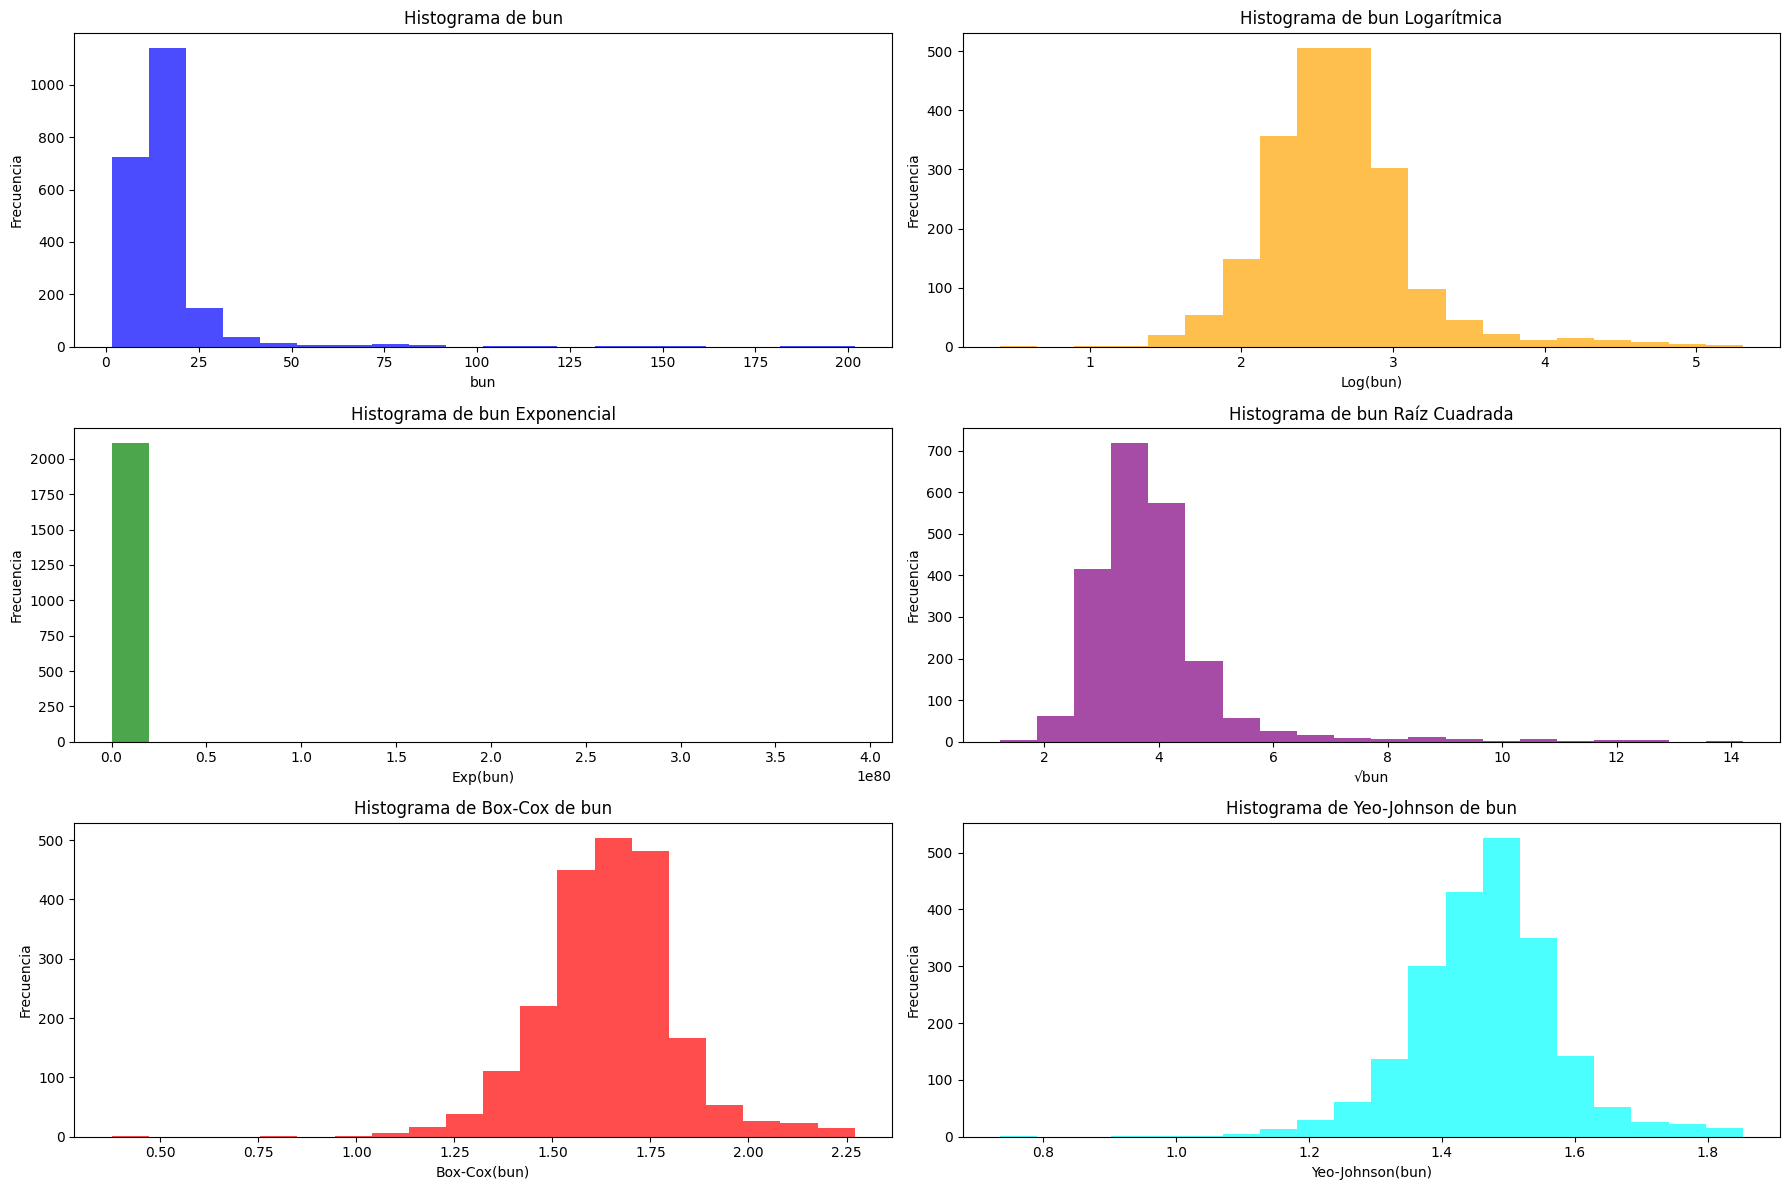


Resultados de normalidad para bun:
Original: Estadístico = 0.4662, p-value = 0.0000
Logarítmica: Estadístico = 0.9276, p-value = 0.0000
Exponencial: Estadístico = 0.0063, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.7323, p-value = 0.0000
Box-Cox: Estadístico = 0.9704, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9769, p-value = 0.0000


In [ ]:
analizar_variable(df, "bun")

Este código garantiza que los datos de la columna 'bun' estén preparados y listos para su uso en análisis o modelos de machine learning. El proceso incluye manejo de nulos, ajustes de valores negativos, aplicación de transformaciones y pruebas de normalidad.

In [ ]:
df["bun_yj"], _ = stats.yeojohnson(df["bun"])
df["bun_yj_n"] = scaler.fit_transform(df[["bun_yj"]])

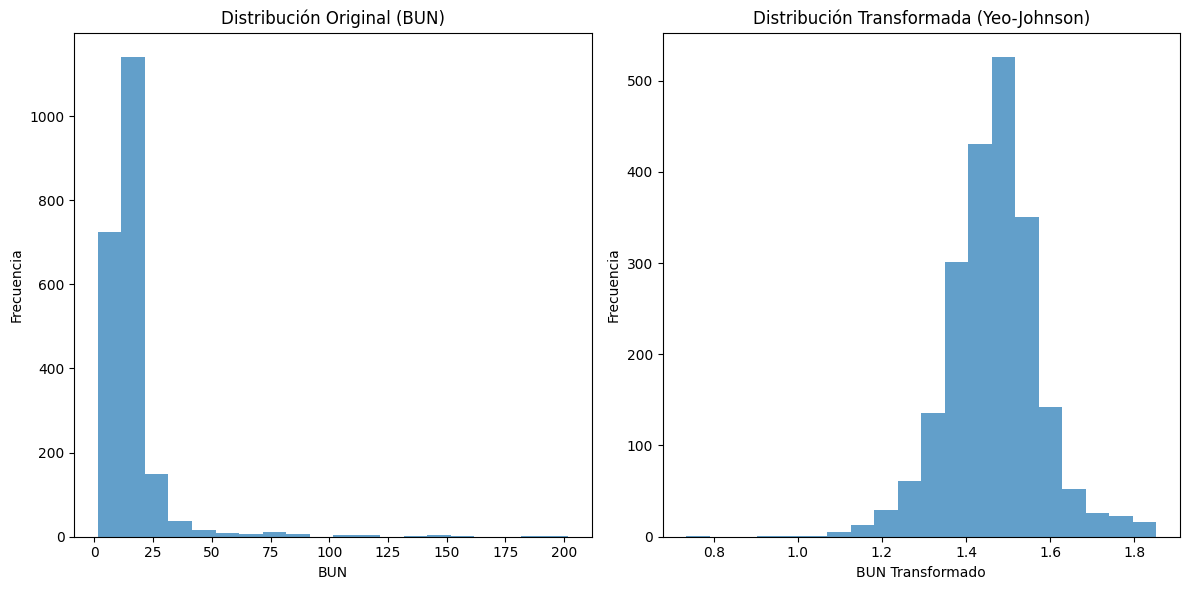

In [ ]:
# Verificar y manejar valores nulos
if df["bun"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'bun'. Se reemplazarán por la media.")
    df["bun"].fillna(df["bun"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["bun_yj"], _ = stats.yeojohnson(df["bun"])

# Normalizar los valores transformados con MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df["bun_yj_n"] = scaler.fit_transform(df[["bun_yj"]])

# Visualización de distribuciones antes y después de la transformación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["bun"], bins=20, alpha=0.7)
plt.title("Distribución Original (BUN)")
plt.xlabel("BUN")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["bun_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("BUN Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código prepara la columna 'bun' mediante transformación Yeo-Johnson y la normaliza con MinMaxScaler, asegurando que los datos estén limpios y preparados para su uso en análisis o modelos de machine learning.

Esta preparación garantiza mayor precisión y rendimiento en los análisis y modelos, mejorando la calidad de los resultados.

#### creatinina

Se encontraron valores nulos en creatinina. Se eliminarán o reemplazarán.


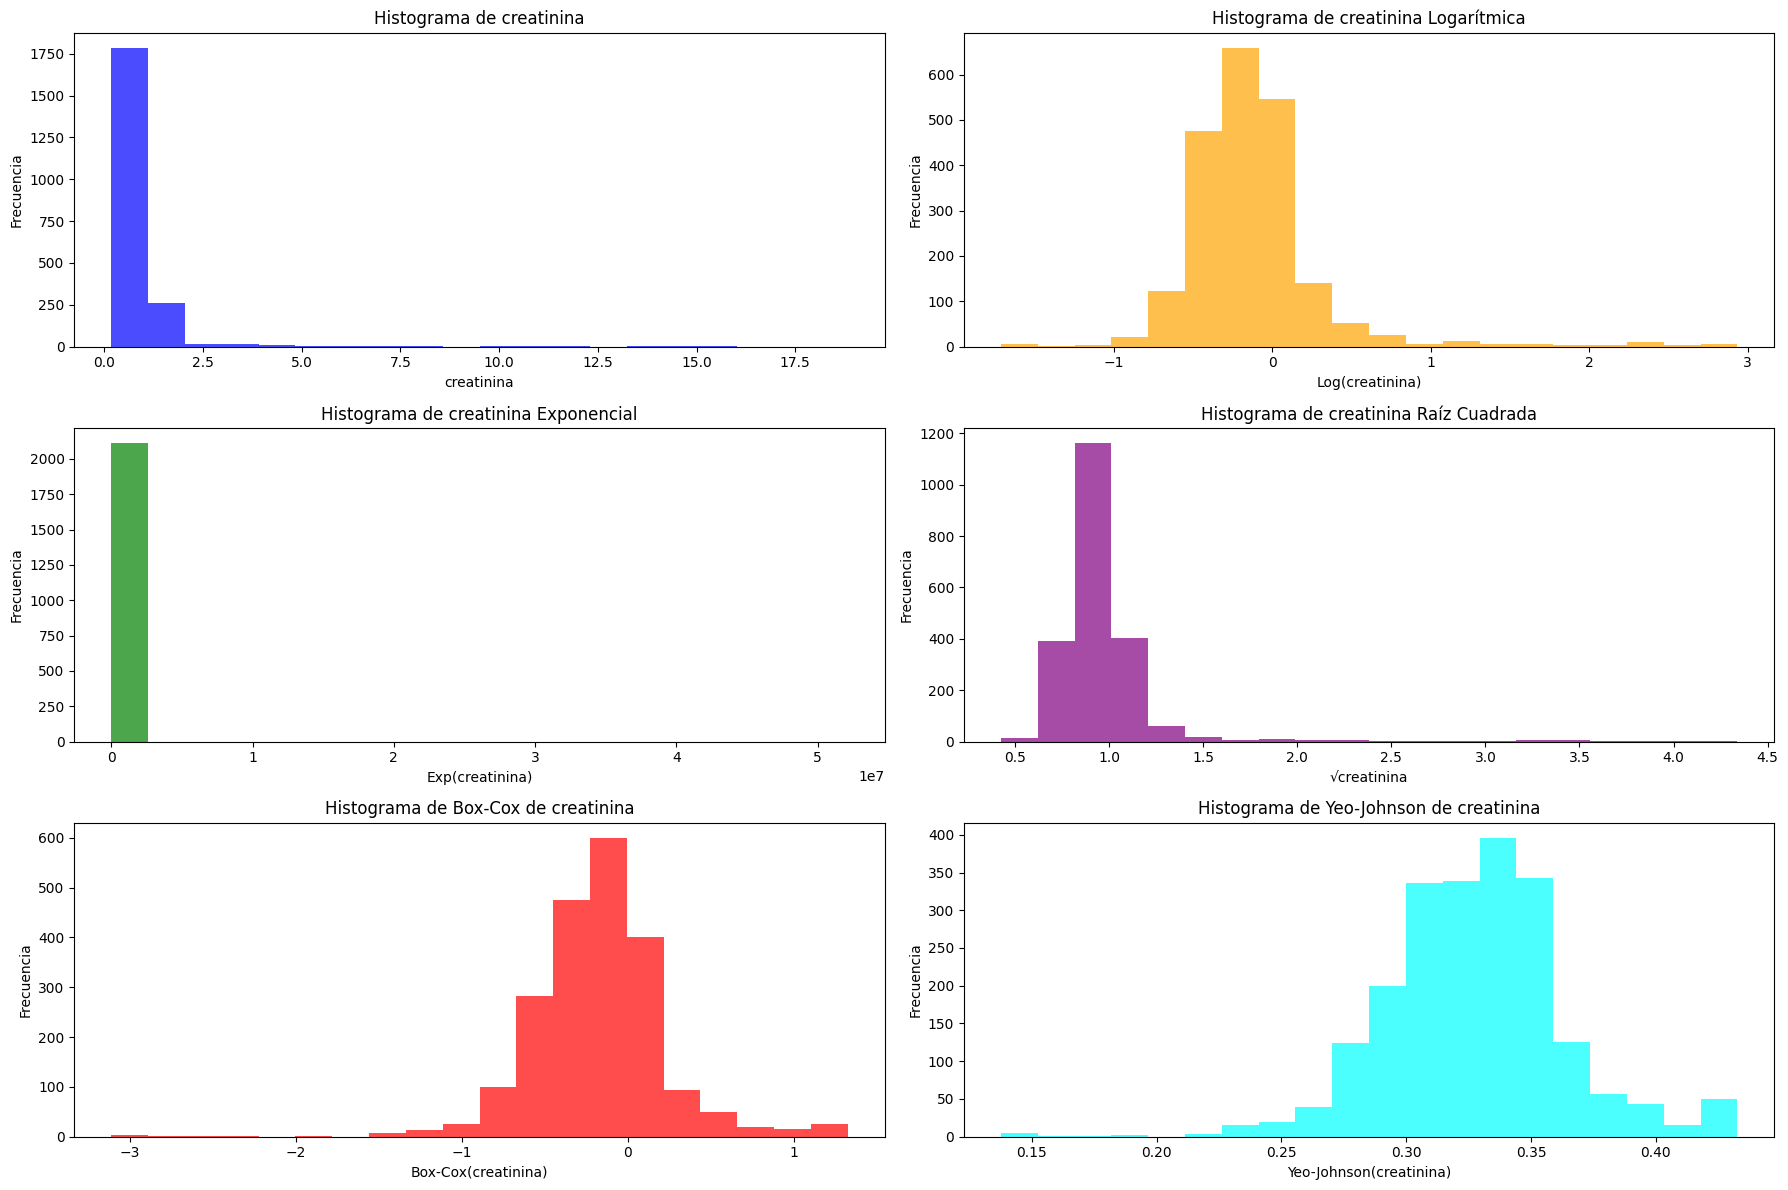


Resultados de normalidad para creatinina:
Original: Estadístico = 0.2702, p-value = 0.0000
Logarítmica: Estadístico = 0.7775, p-value = 0.0000
Exponencial: Estadístico = 0.0092, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.4999, p-value = 0.0000
Box-Cox: Estadístico = 0.9156, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9689, p-value = 0.0000


In [ ]:
analizar_variable(df, "creatinina")

Este análisis garantiza que los datos de la columna 'creatinina' estén limpios y listos para su uso en análisis estadísticos o modelos predictivos. La función detecta y corrige problemas de distribución, aplica varias transformaciones, y realiza pruebas de normalidad para identificar cuál es la mejor opción.:

In [ ]:
df["creatinina_yj"], _ = stats.yeojohnson(df["creatinina"])
df["creatinina_yj_n"] = scaler.fit_transform(df[["creatinina_yj"]])

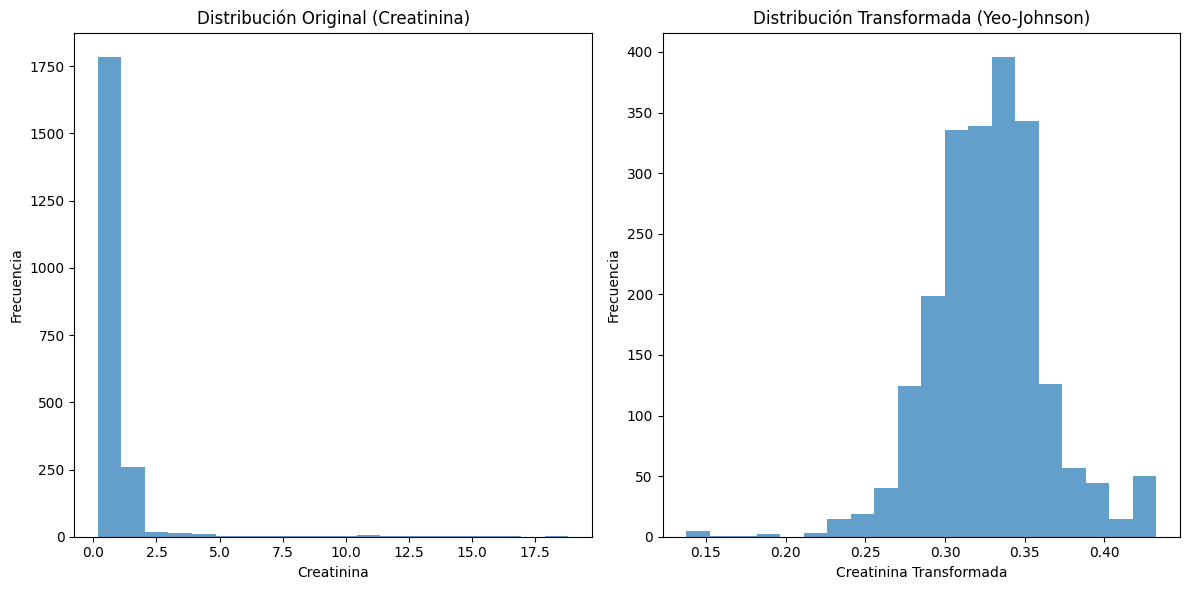

In [ ]:
# Verificar y manejar valores nulos
if df["creatinina"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'creatinina'. Se reemplazarán por la media.")
    df["creatinina"].fillna(df["creatinina"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["creatinina_yj"], _ = stats.yeojohnson(df["creatinina"])

# Normalizar los valores transformados
scaler = MinMaxScaler(feature_range=(0, 1))
df["creatinina_yj_n"] = scaler.fit_transform(df[["creatinina_yj"]])

# Visualización de las distribuciones
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["creatinina"], bins=20, alpha=0.7)
plt.title("Distribución Original (Creatinina)")
plt.xlabel("Creatinina")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["creatinina_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Creatinina Transformada")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código aplica la transformación Yeo-Johnson para mejorar la distribución de la columna 'creatinina' y luego normaliza los valores usando MinMaxScaler.

Estas mejoras garantizan que los datos estén listos para su uso en análisis estadísticos y modelos predictivos, mejorando la precisión y rendimiento del análisis.

#### sodio

Se encontraron valores nulos en sodio. Se eliminarán o reemplazarán.


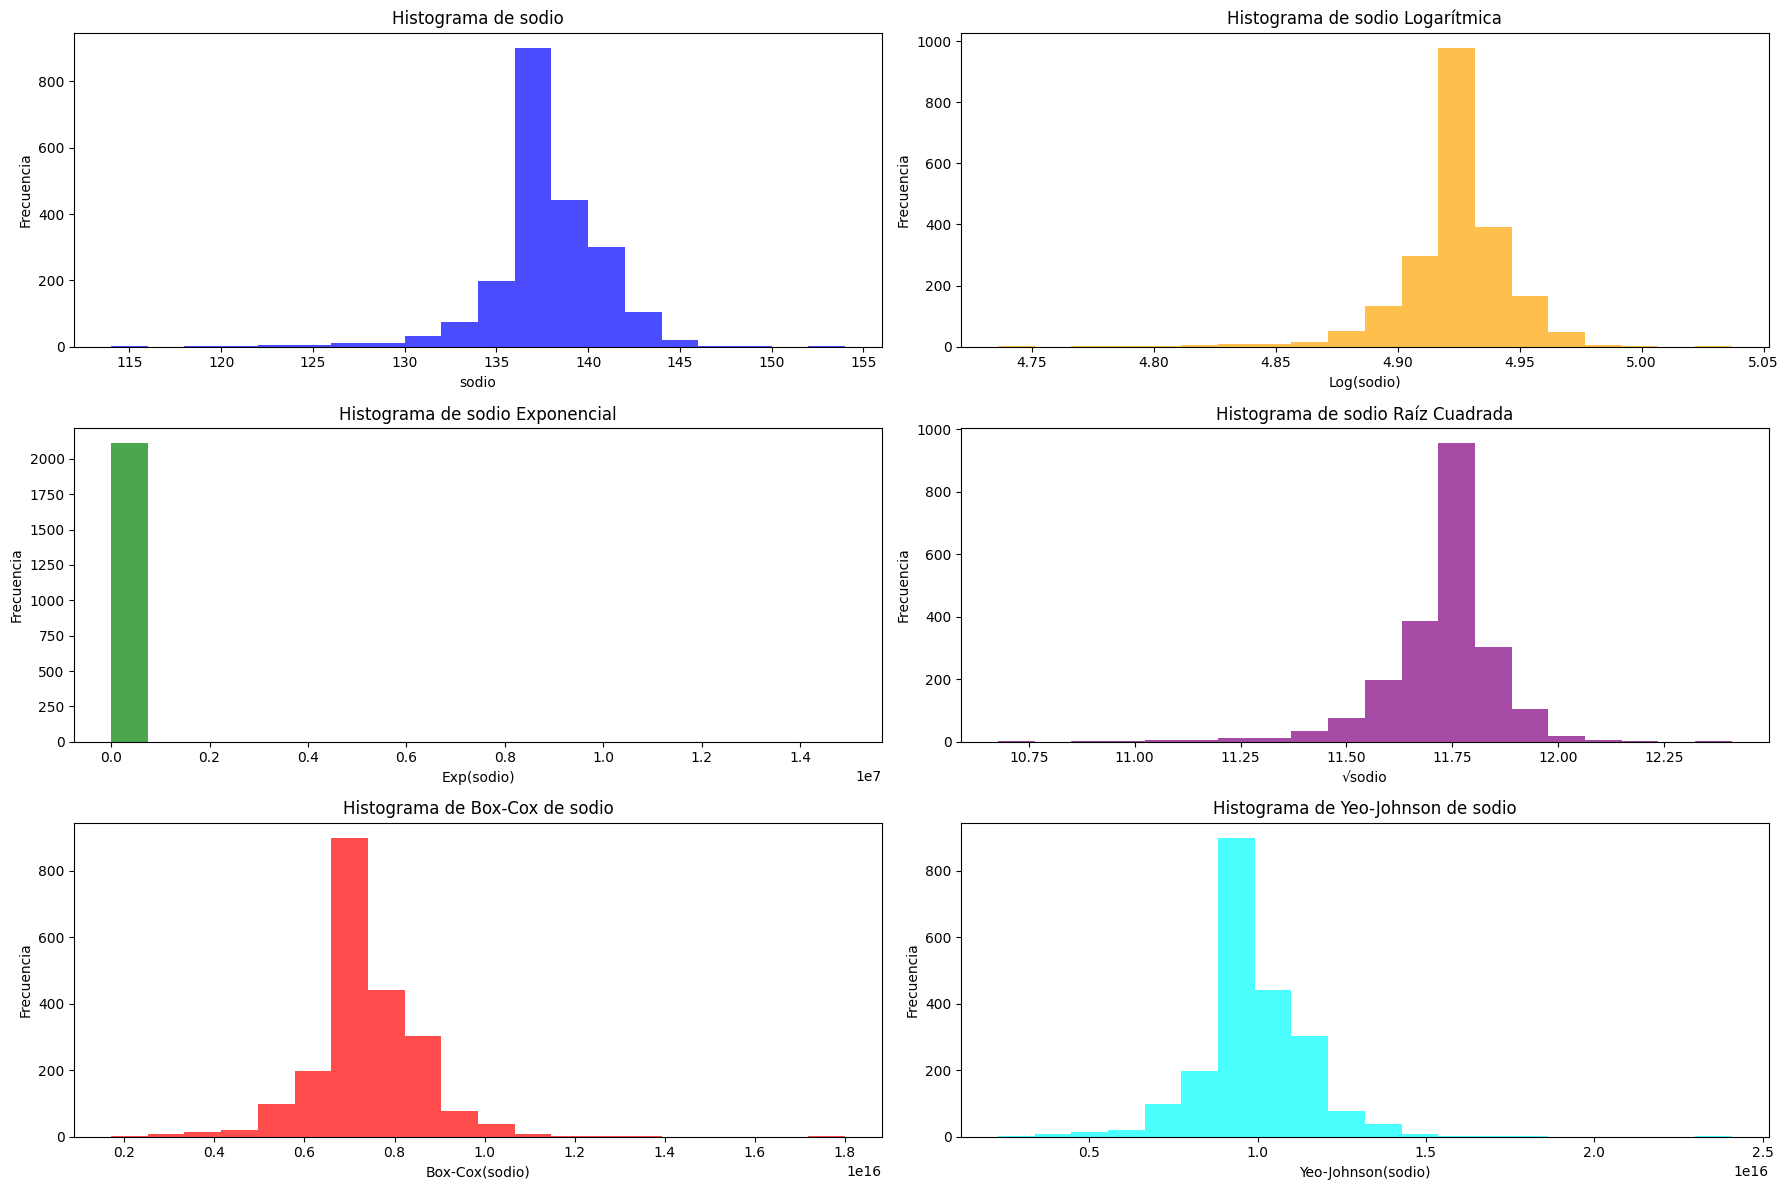


Resultados de normalidad para sodio:
Original: Estadístico = 0.8885, p-value = 0.0000
Logarítmica: Estadístico = 0.8754, p-value = 0.0000
Exponencial: Estadístico = 0.0065, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.8822, p-value = 0.0000
Box-Cox: Estadístico = 0.9244, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9244, p-value = 0.0000


In [ ]:
analizar_variable(df, "sodio")

Este análisis asegura que los datos de la columna 'sodio' estén limpios y preparados para su uso en análisis estadísticos o modelos predictivos. La función maneja valores nulos, ajusta valores anómalos y aplica varias transformaciones para mejorar la distribución.

Estas mejoras garantizan que los datos estén en las mejores condiciones para su uso en modelos predictivos y análisis avanzados, aumentando su precisión y rendimiento.

In [ ]:
df["sodio_yj"], _ = stats.yeojohnson(df["sodio"])
df["sodio_yj_n"] = scaler.fit_transform(df[["sodio_yj"]])

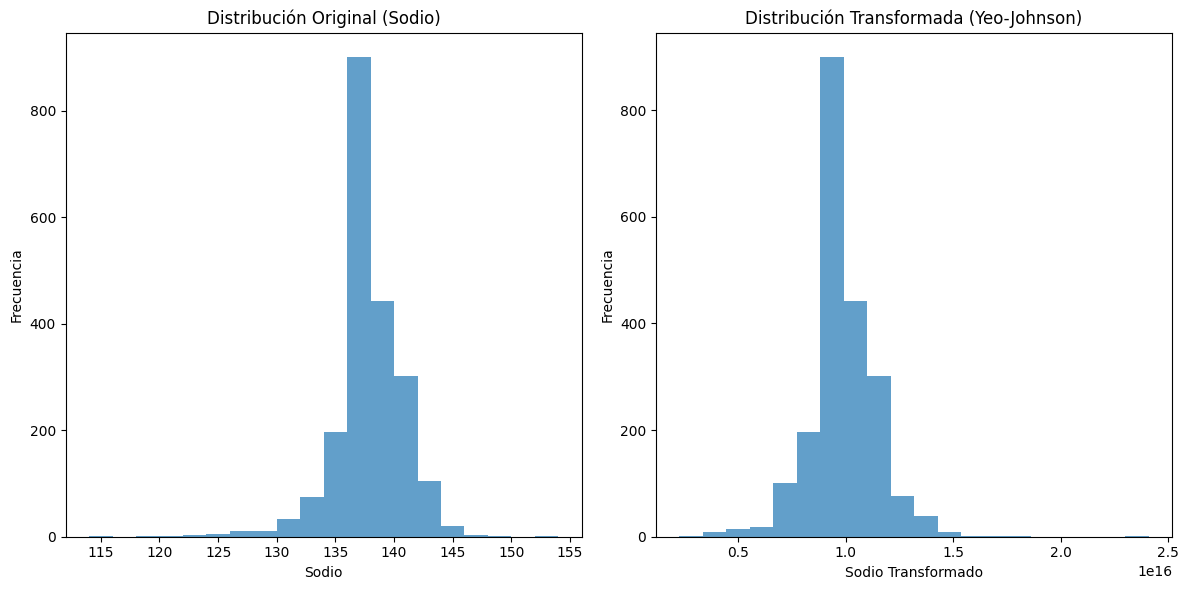

In [ ]:
# Verificar y manejar valores nulos
if df["sodio"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'sodio'. Se reemplazarán por la media.")
    df["sodio"].fillna(df["sodio"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["sodio_yj"], _ = stats.yeojohnson(df["sodio"])

# Normalizar los valores transformados con MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df["sodio_yj_n"] = scaler.fit_transform(df[["sodio_yj"]])

# Visualización de las distribuciones antes y después de la transformación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["sodio"], bins=20, alpha=0.7)
plt.title("Distribución Original (Sodio)")
plt.xlabel("Sodio")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["sodio_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Sodio Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código realiza una transformación Yeo-Johnson y luego normaliza los valores para preparar los datos de la columna 'sodio' para su uso en análisis y modelos predictivos.

Estas mejoras aseguran que los datos estén preparados adecuadamente, aumentando la eficacia y precisión de los análisis y modelos que se apliquen sobre ellos.

#### potasio

Se encontraron valores nulos en potasio. Se eliminarán o reemplazarán.


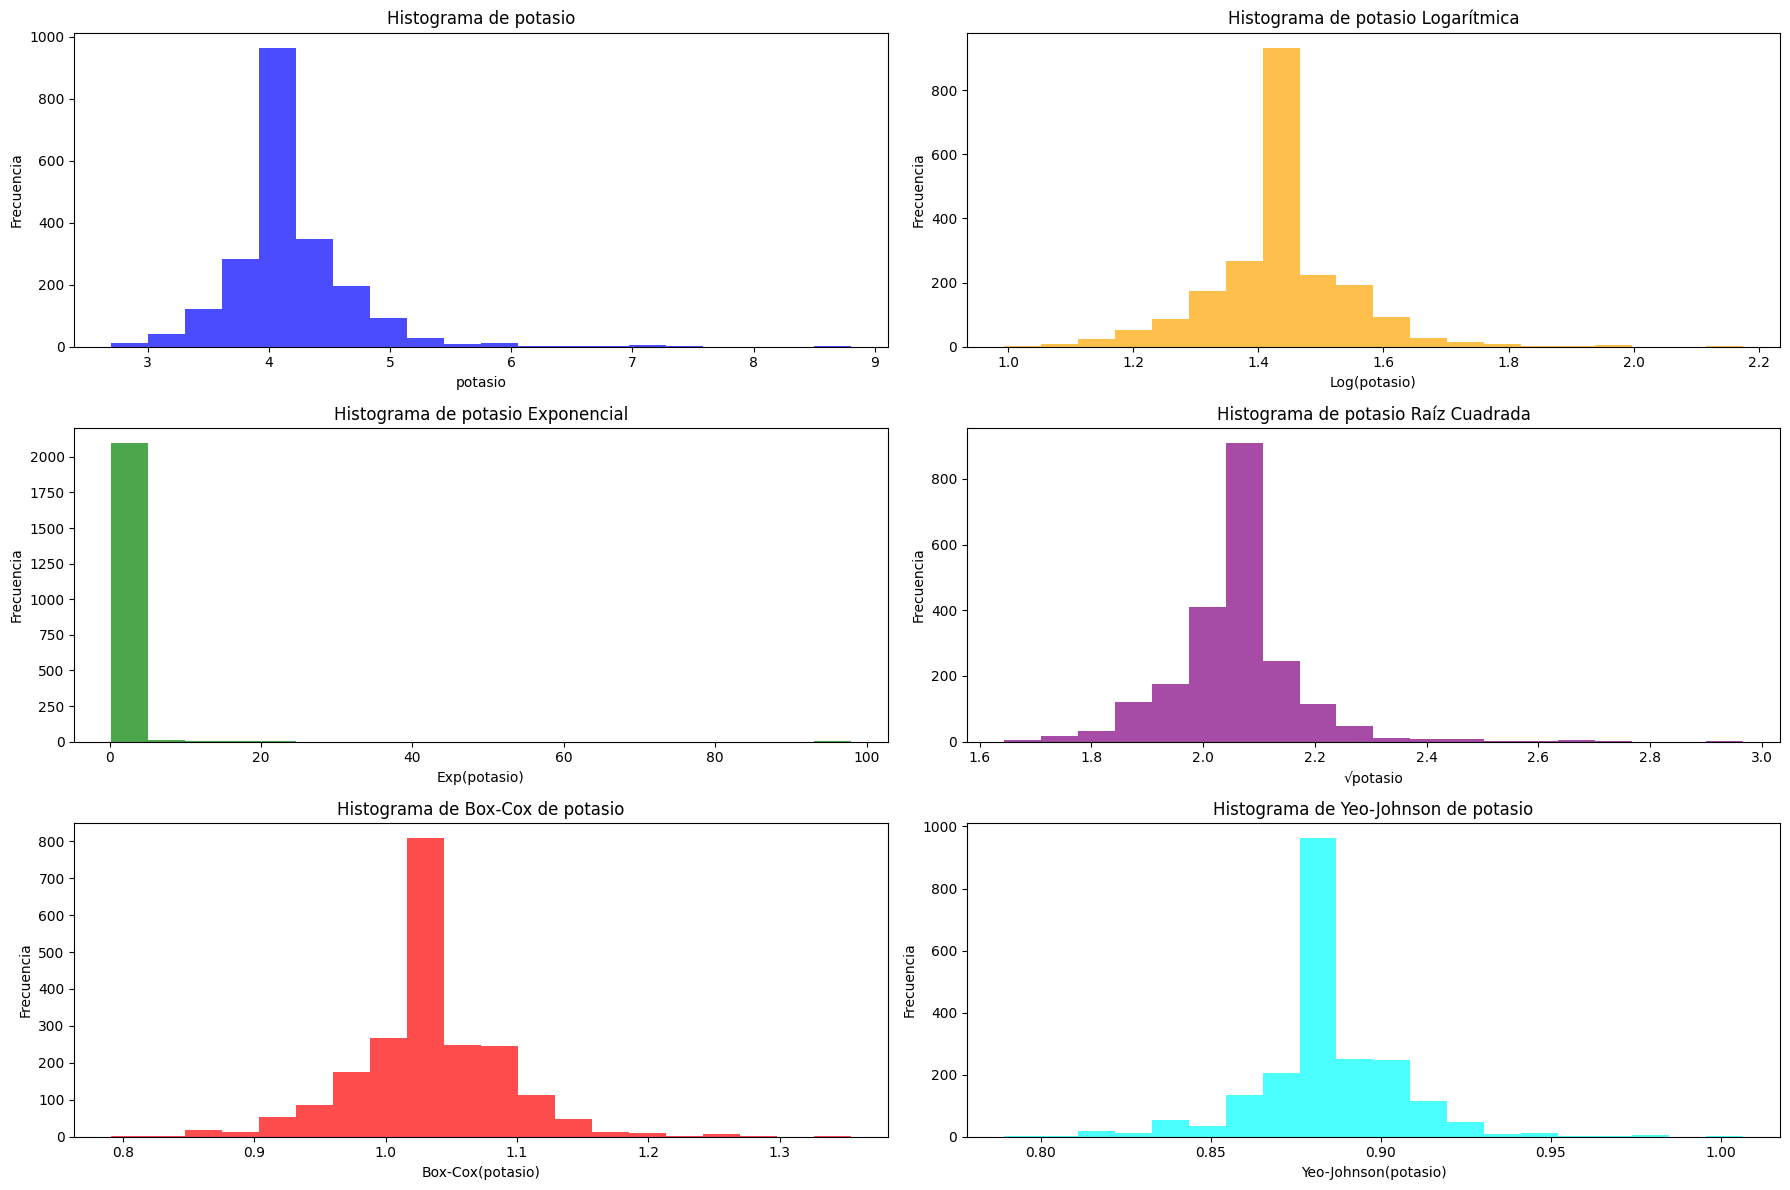


Resultados de normalidad para potasio:
Original: Estadístico = 0.8894, p-value = 0.0000
Logarítmica: Estadístico = 0.9313, p-value = 0.0000
Exponencial: Estadístico = 0.1133, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.9160, p-value = 0.0000
Box-Cox: Estadístico = 0.9365, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9376, p-value = 0.0000


In [ ]:
analizar_variable(df, "potasio")

Este análisis garantiza que los datos de la columna 'potasio' estén limpios y listos para su uso en modelos predictivos o análisis estadísticos. La función maneja valores nulos y valores anómalos, aplica varias transformaciones y valida los resultados mediante pruebas de normalidad.

In [ ]:
df["potasio_yj"], _ = stats.yeojohnson(df["potasio"])
df["potasio_yj_n"] = scaler.fit_transform(df[["potasio_yj"]])

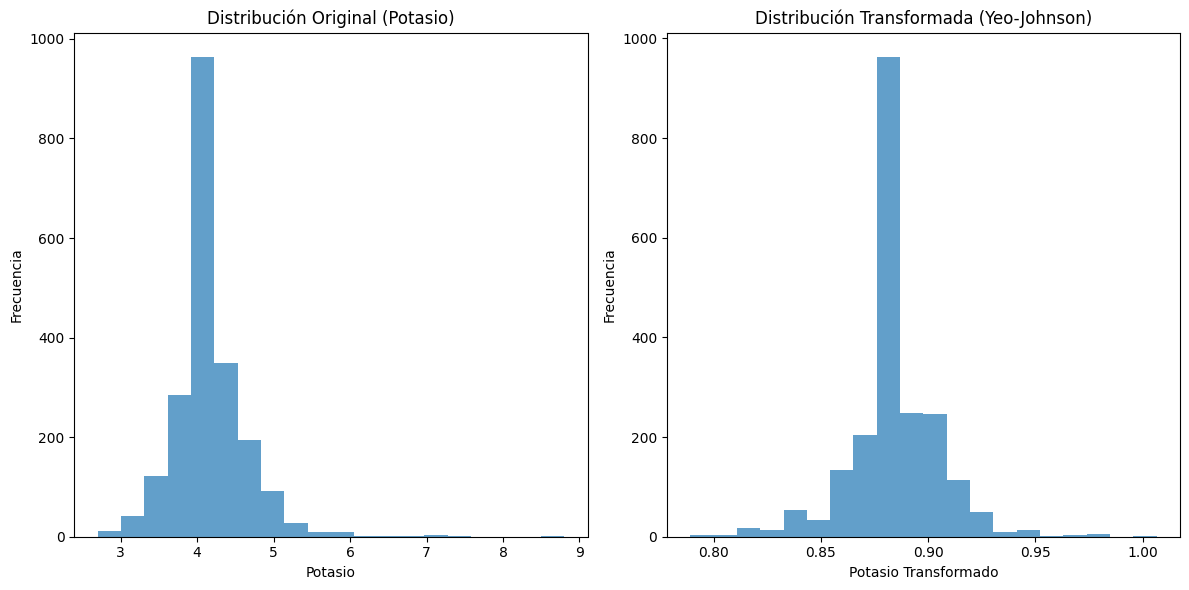

In [ ]:
# Verificar y manejar valores nulos
if df["potasio"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'potasio'. Se reemplazarán por la media.")
    df["potasio"].fillna(df["potasio"].mean(), inplace=True)

# Aplicar la transformación Yeo-Johnson
df["potasio_yj"], _ = stats.yeojohnson(df["potasio"])

# Normalizar los valores transformados con MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df["potasio_yj_n"] = scaler.fit_transform(df[["potasio_yj"]])

# Visualización de distribuciones
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["potasio"], bins=20, alpha=0.7)
plt.title("Distribución Original (Potasio)")
plt.xlabel("Potasio")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["potasio_yj"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Yeo-Johnson)")
plt.xlabel("Potasio Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código aplica una transformación Yeo-Johnson y luego normaliza los datos mediante MinMaxScaler. Esta preparación asegura que los datos estén en condiciones óptimas para su uso en análisis estadísticos o modelos de machine learning, mejorando la precisión y el rendimiento del análisis.

#### cloro

Se encontraron valores nulos en cloro. Se eliminarán o reemplazarán.


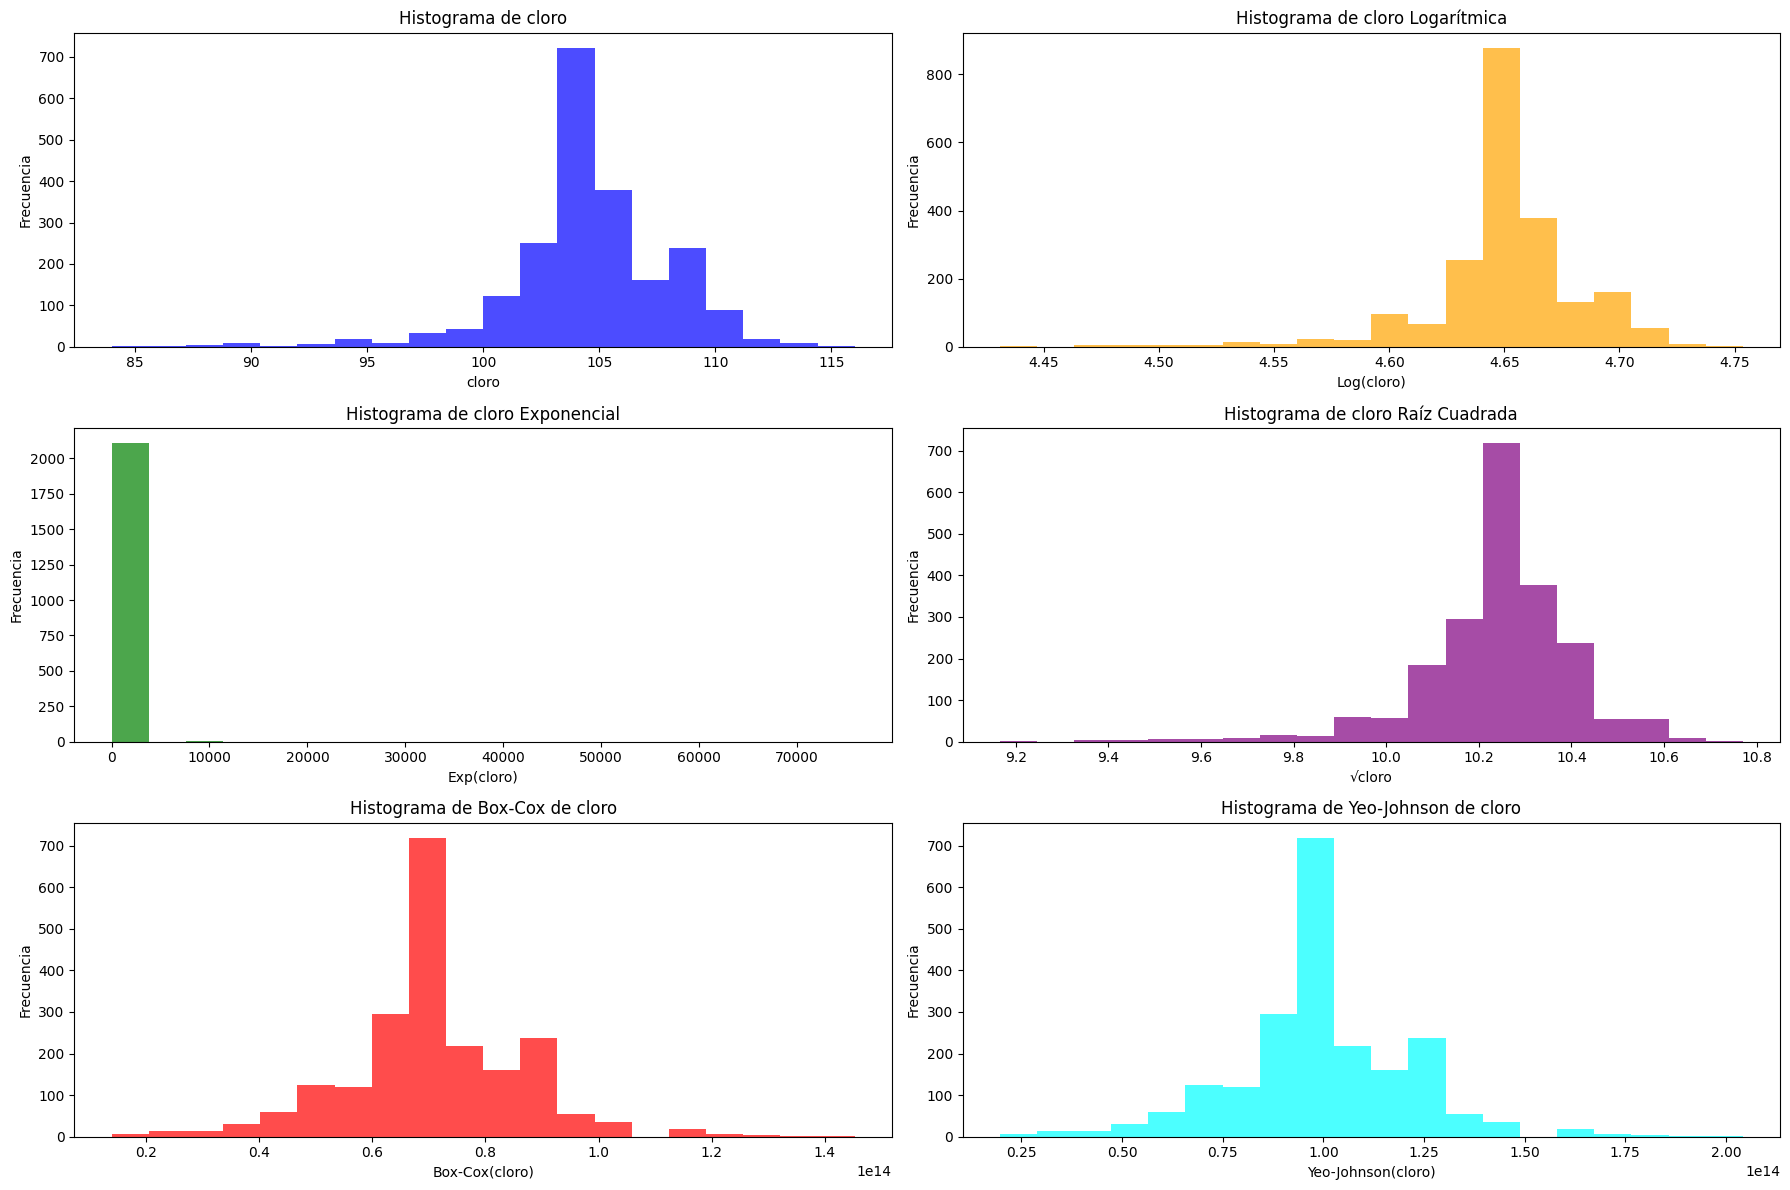


Resultados de normalidad para cloro:
Original: Estadístico = 0.9017, p-value = 0.0000
Logarítmica: Estadístico = 0.8830, p-value = 0.0000
Exponencial: Estadístico = 0.0287, p-value = 0.0000
Raíz Cuadrada: Estadístico = 0.8927, p-value = 0.0000
Box-Cox: Estadístico = 0.9503, p-value = 0.0000
Yeo-Johnson: Estadístico = 0.9503, p-value = 0.0000


In [ ]:
analizar_variable(df, "cloro")

Este análisis asegura que los datos de la columna 'cloro' estén preparados para su uso en modelos predictivos o análisis estadísticos. Esto garantiza que los datos estén en las mejores condiciones posibles para su análisis, mejorando la precisión y rendimiento de los modelos.

In [ ]:
df["cloro_bc"], _ = stats.boxcox(df["cloro"])
df["cloro_bc_n"] = scaler.fit_transform(df[["cloro_bc"]])

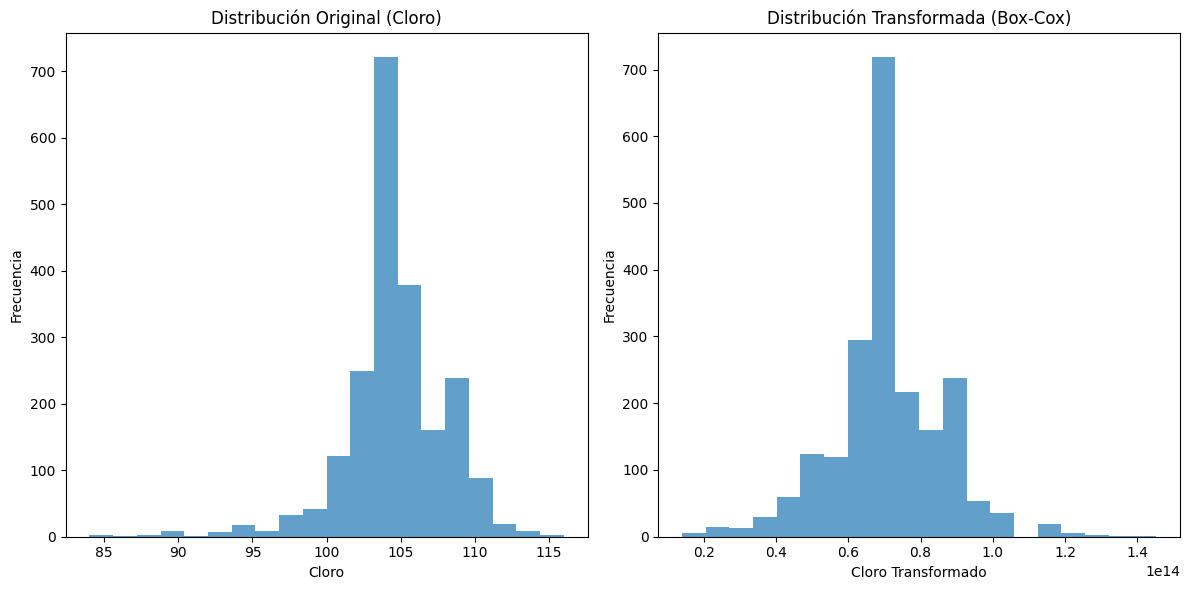

In [ ]:
# Verificar y manejar valores nulos
if df["cloro"].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'cloro'. Se reemplazarán por la media.")
    df["cloro"].fillna(df["cloro"].mean(), inplace=True)

# Asegurar que los valores sean positivos
if (df["cloro"] <= 0).any():
    print("Se encontraron valores no positivos en 'cloro'. Se ajustarán sumando un valor positivo.")
    df["cloro"] += (1 - df["cloro"].min())

# Aplicar la transformación Box-Cox
df["cloro_bc"], _ = stats.boxcox(df["cloro"])

# Normalizar los valores transformados con MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df["cloro_bc_n"] = scaler.fit_transform(df[["cloro_bc"]])

# Visualización de distribuciones
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["cloro"], bins=20, alpha=0.7)
plt.title("Distribución Original (Cloro)")
plt.xlabel("Cloro")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["cloro_bc"], bins=20, alpha=0.7)
plt.title("Distribución Transformada (Box-Cox)")
plt.xlabel("Cloro Transformado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Este código transforma y normaliza los valores de la columna 'cloro' para mejorar la calidad de los datos. Esto garantiza que los datos estén en óptimas condiciones para su uso en modelos predictivos y análisis estadísticos, aumentando la precisión y rendimiento del análisis.

### Variables finales

In [ ]:
num_vars_entrada = ["edad_n", "peso_yj_n", "tallacm_n", "imc_yj_n", "hb_bc_n", "hto_yj_n","leucostotales_yj_n",
            "linfos_sr_n", "neutrofilos_yj_n", "tp_yj_n", "ttp_yj_n", "glucosa_yj_n", "bun_yj_n",
            "creatinina_yj_n", "sodio_yj_n", "potasio_yj_n", "cloro_bc_n"]

# Sale error con "topic_diagnostic",
binary_vars_entrada = ["Diabetes Mellitus (DM)", "Hipertensión (HTA)",
               "Ante_IAM", "ante_arritmia", "otrosantecedentesimportantes",
               "cirugaprevia", "alcoholismo", "tabaquismo", "otros", "valoracion_cardiovascular",
               "primeraqx", "fr_anormal", "plaquetaanormal", "tpanormal", "ttpanormal", "glucosaanormal",
               "creatanormal", "esanormales", "repeticn_examen", "obesidad", "hiperglucemia",
               "bhcanormal", "qsanormal", "sexo_binary", "anestesia_1", "anestesia_2",
               "anestesia_3", "anestesia_4", "anestesia_5", "nitritos_binary", "egoinfeccin_binary"]

Variables Numéricas (num_vars_entrada):
Estas variables han sido transformadas y normalizadas, lo que garantiza que los datos tengan una distribución más adecuada y una escala uniforme. Esto es crucial para modelos predictivos como regresión lineal o redes neuronales, que funcionan mejor con datos distribuidos de forma normal y con una magnitud controlada.

Variables Binarias (binary_vars_entrada):
Estas variables capturan características dicotómicas del paciente (por ejemplo, presencia o ausencia de enfermedades o hábitos). Los modelos predictivos suelen utilizar estas variables para hacer clasificaciones o cálculos de probabilidades.

In [ ]:
var_salida = ["riesgo_quirurgico"]

Variable Objetivo:
"riesgo_quirurgico" es la variable de salida que el modelo tratará de predecir o clasificar. Por ejemplo, en un modelo de clasificación, esta variable podría tener valores como:

    1: Riesgo bajo
    2: Riesgo medio
    3: Riesgo alto

Importancia en Modelos Predictivos:
Esta variable se utilizará como referencia durante el entrenamiento del modelo. El objetivo es que, con base en las variables de entrada, el modelo pueda predecir el nivel de riesgo quirúrgico para nuevos pacientes.

In [ ]:
for col in binary_vars_entrada:
    if df[col].isnull().any():
        df[col].fillna(0, inplace=True)

Este código garantiza que todas las variables binarias estén completas, reemplazando los valores nulos por 0. Esto es útil para evitar errores en modelos predictivos. Sin embargo, es importante considerar si el reemplazo con 0 es la opción más adecuada, ya que puede introducir sesgos.

In [ ]:
all_columns = num_vars_entrada + binary_vars_entrada + var_salida

df_filtered = df[all_columns]

file_path = 'variables_quirurgicas_finales.xlsx'

df_filtered.to_excel(file_path, index=False)

Este código selecciona y exporta un subconjunto de columnas relevantes a un archivo Excel, lo que facilita el uso de los datos para análisis adicionales o compartirlos.

### Random forest

In [ ]:
X = df[num_vars_entrada]
y = df['riesgo_quirurgico']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

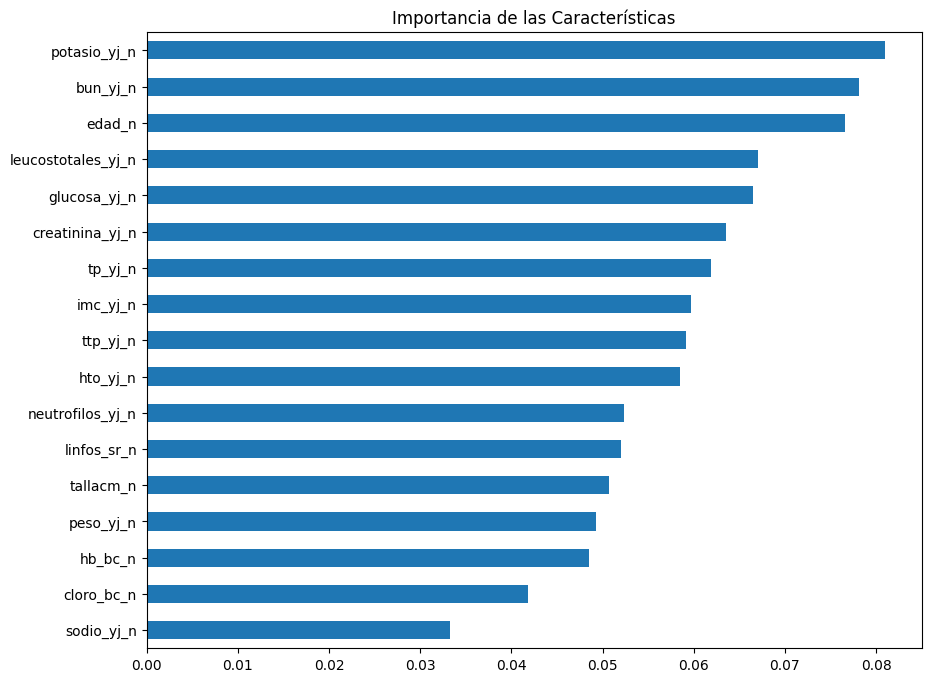

MAE: 0.42853543307086617, R²: 0.1155929767761541


In [ ]:
rf = RandomForestRegressor()
rf.fit(X, y)

# Importancia de características
importancia = pd.Series(rf.feature_importances_, index=X.columns)
importancia_sorted = importancia.sort_values(ascending=False)

# Visualización Gráfica de la Importancia de las Características
importancia_sorted.plot(kind='barh', figsize=(10, 8))
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()
plt.show()

# Validación del Modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluación del Modelo
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R²: {r2}")

Este código entrena un modelo de bosque aleatorio para regresión y calcula la importancia de las características en la predicción. La versión mejorada incluye ajustes de hiperparámetros, visualización gráfica de la importancia de las variables, división del conjunto de datos en entrenamiento y prueba, y evaluación del modelo para garantizar un mejor rendimiento.

### Correlación

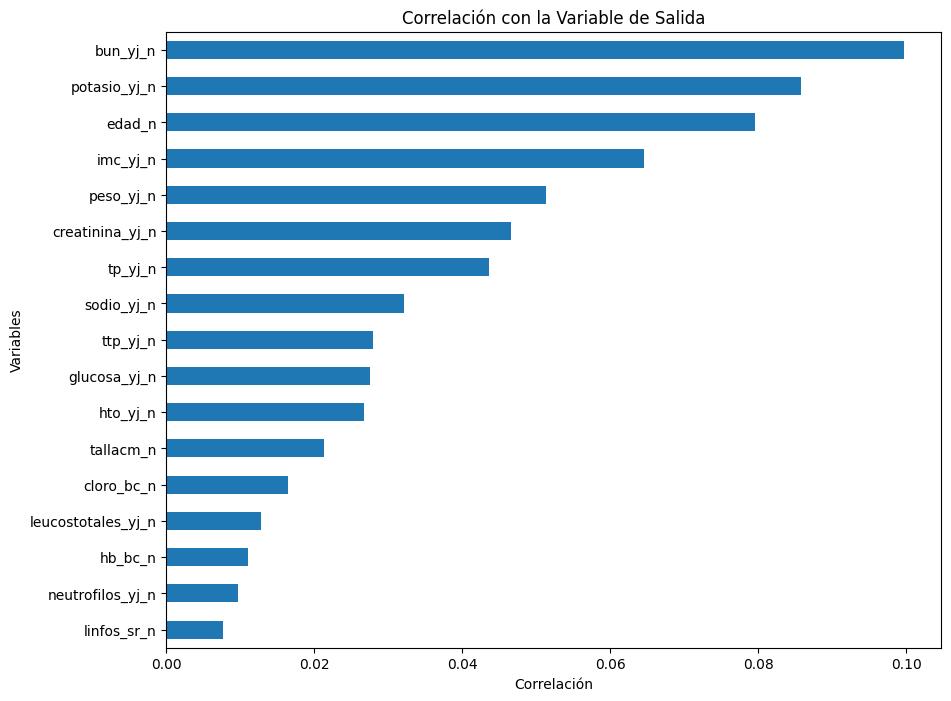

Correlación de Spearman:
bun_yj_n              0.087707
edad_n                0.079636
potasio_yj_n          0.076362
creatinina_yj_n       0.051484
tp_yj_n               0.045569
imc_yj_n              0.041171
cloro_bc_n            0.037499
peso_yj_n             0.035609
leucostotales_yj_n    0.032155
sodio_yj_n            0.031945
glucosa_yj_n          0.027295
neutrofilos_yj_n      0.024229
ttp_yj_n              0.022064
tallacm_n             0.019246
hto_yj_n              0.016945
linfos_sr_n           0.014176
hb_bc_n               0.002625
dtype: float64


In [ ]:
# Calcular la correlación entre las variables de X y la variable de salida y
correlation = X.corrwith(y).abs().sort_values(ascending=False)

# Visualización de la Correlación
correlation.plot(kind='barh', figsize=(10, 8))
plt.title('Correlación con la Variable de Salida')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.show()

# Verificación de Valores Nulos
if X.isnull().any().any() or y.isnull().any():
    print("Advertencia: Existen valores nulos en las variables.")

# Uso de Correlación No Lineal
correlation_spearman = X.corrwith(y, method='spearman').abs().sort_values(ascending=False)
print("Correlación de Spearman:")
print(correlation_spearman)

Este código proporciona una evaluación rápida de la relevancia de las variables predictoras mediante la correlación con la variable objetivo.

Esta información es valiosa para seleccionar características importantes y optimizar modelos predictivos.

### Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

Coeficientes de regresión:
peso_yj_n             2.853457
imc_yj_n              2.726696
tallacm_n             0.913531
hto_yj_n              0.866731
hb_bc_n               0.719419
bun_yj_n              0.667448
potasio_yj_n          0.403993
tp_yj_n               0.398020
linfos_sr_n           0.314484
sodio_yj_n            0.271189
neutrofilos_yj_n      0.250281
glucosa_yj_n          0.232782
edad_n                0.135424
leucostotales_yj_n    0.123772
ttp_yj_n              0.104750
creatinina_yj_n       0.026082
cloro_bc_n            0.011345
dtype: float64
R²: 0.0436, MAE: 0.4732


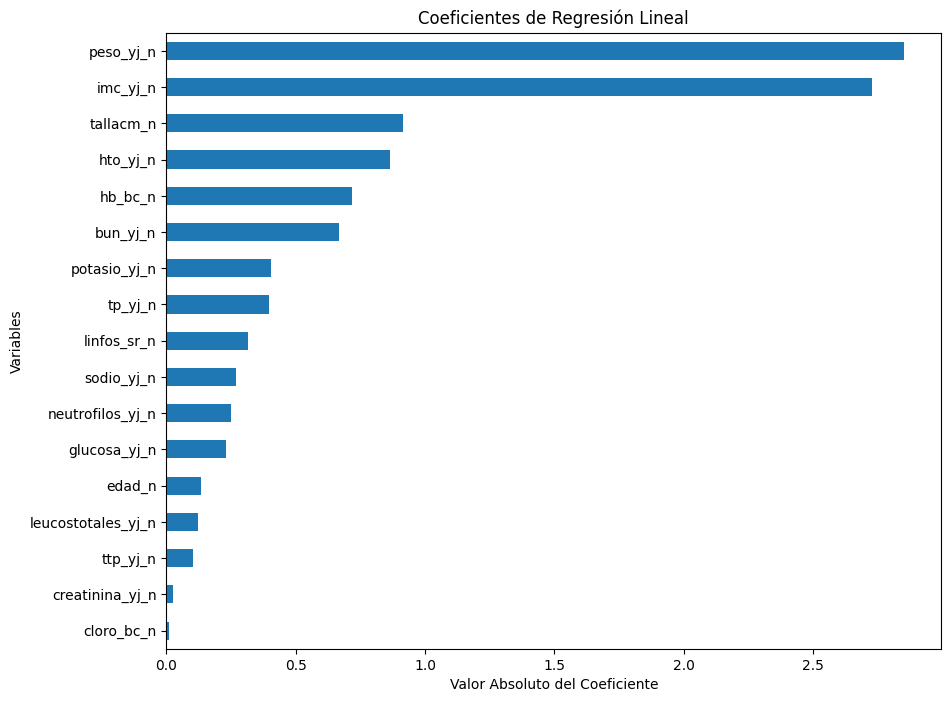

In [ ]:
model = LinearRegression()
model.fit(X, y)

# Coeficientes
coef = pd.Series(model.coef_, index=X.columns).abs().sort_values(ascending=False)
print("Coeficientes de regresión:")
print(coef)

# Evaluación del Modelo
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(f"R²: {r2:.4f}, MAE: {mae:.4f}")

# Normalización de los Datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model.fit(X_scaled, y)

# Visualización de los Coeficientes:
coef.plot(kind='barh', figsize=(10, 8))
plt.title('Coeficientes de Regresión Lineal')
plt.xlabel('Valor Absoluto del Coeficiente')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.show()

### Umbral de la varianza

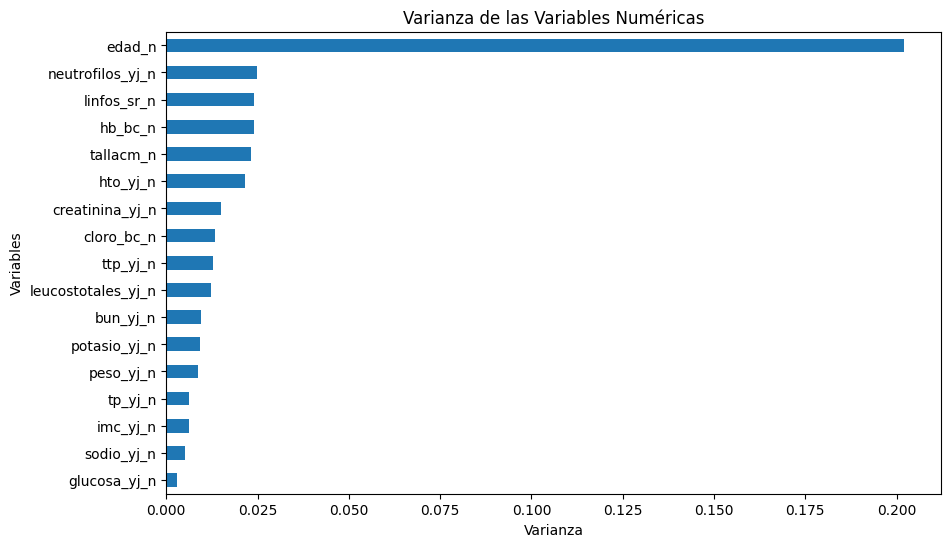

Varianzas de las variables numéricas (ordenadas de mayor a menor):
edad_n                0.202132
neutrofilos_yj_n      0.024846
linfos_sr_n           0.024027
hb_bc_n               0.023968
tallacm_n             0.023281
hto_yj_n              0.021681
creatinina_yj_n       0.015025
cloro_bc_n            0.013302
ttp_yj_n              0.012675
leucostotales_yj_n    0.012261
bun_yj_n              0.009610
potasio_yj_n          0.009303
peso_yj_n             0.008740
tp_yj_n               0.006266
imc_yj_n              0.006094
sodio_yj_n            0.005206
glucosa_yj_n          0.003054
dtype: float64


In [ ]:
variances = X.var()

# Ordenar las varianzas de mayor a menor
sorted_variances = variances.sort_values(ascending=False)

# Visualización de la Varianza
sorted_variances.plot(kind='barh', figsize=(10, 6))
plt.title("Varianza de las Variables Numéricas")
plt.xlabel("Varianza")
plt.ylabel("Variables")
plt.gca().invert_yaxis()
plt.show()

# Mostrar resultados
print("Varianzas de las variables numéricas (ordenadas de mayor a menor):")
print(sorted_variances)

Este código proporciona una visión general de la dispersión de las variables predictoras mediante el cálculo de la varianza.

### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA() # pca = PCA(n_components=0.95)  # Mantener 95% de la varianza explicada

In [ ]:
pca_t = pca.fit_transform(X)

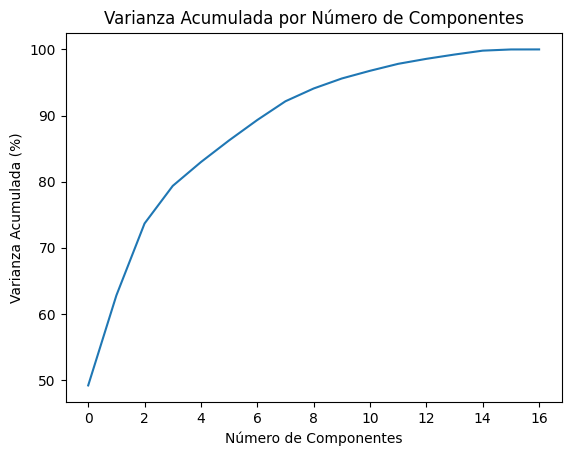

In [ ]:
# Visualización de la Varianza Acumulada
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada (%)')
plt.title('Varianza Acumulada por Número de Componentes')
plt.show()

In [ ]:
pcs_labels = [f'PC{i + 1}' for i in range(pca_t.shape[1])]

In [ ]:
pcsResumen = pd.DataFrame({
    '% varianza explicada': np.round(pca.explained_variance_ratio_, 4) * 100,
    '% varianza acumulada': np.cumsum(pca.explained_variance_ratio_) * 100
})

pcsResumen.index = pcs_labels

# Mostrar el resumen de varianza explicada por cada componente principal
print(pcsResumen)

      % varianza explicada  % varianza acumulada
PC1                  49.16             49.164445
PC2                  13.62             62.782831
PC3                  10.89             73.668266
PC4                   5.69             79.354242
PC5                   3.60             82.956956
PC6                   3.28             86.238713
PC7                   3.08             89.322803
PC8                   2.83             92.157348
PC9                   1.93             94.089119
PC10                  1.51             95.603655
PC11                  1.16             96.766708
PC12                  1.05             97.820142
PC13                  0.76             98.575854
PC14                  0.65             99.227278
PC15                  0.59             99.814871
PC16                  0.18             99.994637
PC17                  0.01            100.000000


In [ ]:
comps_df = pd.DataFrame(
    pca.components_.round(4),  # Coeficientes de las componentes principales
    columns=X.columns,  # Variables originales como columnas
    index=pcs_labels  # Componentes principales como filas
)

# Transponer el DataFrame para que las variables sean filas y las PCs sean columnas
comps_df_transposed = comps_df.T

# Mostrar las primeras 8 columnas (componentes principales) del DataFrame transpuesto
comps_df_transposed.iloc[:, :6]

,PC1,PC2,PC3,PC4,PC5,PC6
edad_n,0.9855,-0.0104,0.1231,-0.0412,-0.0874,0.0389
peso_yj_n,-0.0167,0.0420,0.1493,0.2117,-0.2385,-0.4140
tallacm_n,-0.0649,0.0516,0.3656,0.6862,-0.4896,0.1928
imc_yj_n,0.0051,0.0230,0.0289,-0.0084,-0.0688,-0.4335
hb_bc_n,-0.0728,0.3152,0.5671,-0.2770,0.0704,0.0178
hto_yj_n,-0.0646,0.2957,0.5424,-0.2667,0.0847,-0.0060
leucostotales_yj_n,-0.0479,-0.2790,0.1718,-0.0657,0.0227,-0.0830
linfos_sr_n,0.0361,0.5731,-0.2313,0.1133,0.0567,0.0231
neutrofilos_yj_n,-0.0523,-0.5722,0.2308,-0.1501,-0.0829,-0.0455
tp_yj_n,0.0098,-0.1330,0.0006,0.0789,-0.0195,0.1810


In [ ]:
pcs_df = pd.DataFrame(pca_t, columns=pcs_labels)

# Extraer las columnas PC1 a PC6
pcs_1_to_6 = pcs_df.loc[:, 'PC1':'PC6']

# Mostrar las primeras filas de los datos extraídos
pcs_1_to_6.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.203351,0.153727,0.083970,0.134636,0.004983,0.134119
1,-0.815340,-0.226744,0.034487,-0.158041,0.004423,0.140476
2,0.307096,0.097285,-0.147918,-0.098042,-0.148689,0.080945
3,-0.237322,0.082758,-0.153655,0.009990,0.093406,0.002028
4,0.032147,0.330413,0.064419,-0.017314,0.072847,0.039178


In [ ]:
rf_pca = RandomForestRegressor()
rf_pca.fit(pcs_1_to_6, y)

# Importancia de características
importancia_pca = pd.Series(rf_pca.feature_importances_, index=pcs_1_to_6.columns)
importancia_pca_sorted = importancia_pca.sort_values(ascending=False)
print("Importancia de características (ordenadas de mayor a menor):")
print(importancia_pca_sorted)

Importancia de características (ordenadas de mayor a menor):
PC2    0.173914
PC5    0.172965
PC3    0.166714
PC4    0.165380
PC1    0.164438
PC6    0.156589
dtype: float64


Podemos guardar la matriz de PCA para transformar los datos en el entrenamiento. Se usan los primeros 6 para tener el 80% de la información.

#### Xi cuadrado

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
X_binarias = df[binary_vars_entrada]
y = df['riesgo_quirurgico']  # Variable de salida

# Si la variable de salida es categórica (1, 2, 3), asegúrate de codificarla
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Calcular el chi-cuadrado para cada variable binaria
chi2_vals, p_vals = chi2(X_binarias, y_encoded)

# Crear un DataFrame para mostrar los resultados
chi2_results = pd.DataFrame({
    'Variable': X_binarias.columns,
    'Chi-Squared Value': chi2_vals,
    'p-value': p_vals
})

# Ordenar las variables por el valor de Chi-cuadrado
chi2_results.sort_values(by='Chi-Squared Value', ascending=False)

,Variable,Chi-Squared Value,p-value
26,anestesia_3,192.229123,1.811241e-42
24,anestesia_1,65.652514,5.542908e-15
25,anestesia_2,12.977618,1.520359e-03
18,repeticn_examen,12.553821,1.879198e-03
27,anestesia_4,9.437956,8.924294e-03
17,esanormales,9.277230,9.671082e-03
29,nitritos_binary,8.132164,1.714443e-02
12,plaquetaanormal,7.645922,2.186297e-02
23,sexo_binary,6.782216,3.367135e-02
13,tpanormal,6.072145,4.802312e-02


Chi-Squared Value: Un valor alto indica una mayor relación entre la variable binaria y la variable de salida.

p-value: Un p-value bajo (menor a un umbral, como 0.05) indica que la relación es estadísticamente significativa.

Por lo tanto las primeras 10 son significativas.

In [ ]:
# Filtrar Variables Significativas
significant_vars = chi2_results[chi2_results['p-value'] < 0.05]
print("Variables con asociación significativa:")
print(significant_vars)

Variables con asociación significativa:
           Variable  Chi-Squared Value       p-value
12  plaquetaanormal           7.645922  2.186297e-02
13        tpanormal           6.072145  4.802312e-02
17      esanormales           9.277230  9.671082e-03
18  repeticn_examen          12.553821  1.879198e-03
23      sexo_binary           6.782216  3.367135e-02
24      anestesia_1          65.652514  5.542908e-15
25      anestesia_2          12.977618  1.520359e-03
26      anestesia_3         192.229123  1.811241e-42
27      anestesia_4           9.437956  8.924294e-03
29  nitritos_binary           8.132164  1.714443e-02


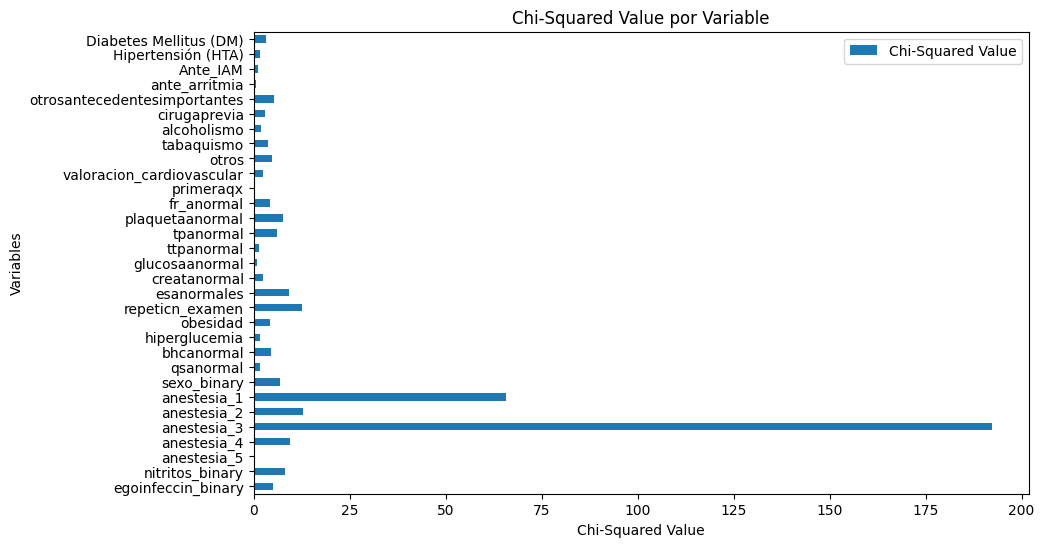

In [ ]:
# Visualización de los Resultados
chi2_results.plot(kind='barh', x='Variable', y='Chi-Squared Value', figsize=(10, 6))
plt.title('Chi-Squared Value por Variable')
plt.xlabel('Chi-Squared Value')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Verificación de Valores Nulos
if X_binarias.isnull().any().any():
    print("Advertencia: Existen valores nulos en las variables binarias.")
    X_binarias.fillna(0, inplace=True)

In [ ]:
# División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_binarias, y_encoded, test_size=0.3, random_state=42)
chi2_vals, p_vals = chi2(X_train, y_train)

Este código calcula el Chi-cuadrado para evaluar la relación entre variables binarias y la variable de salida. Las mejoras sugeridas incluyen:

  * Filtrar variables significativas usando los p-valores.
    
  * Visualizar los resultados con un gráfico de barras.
    
  * Manejar valores nulos para evitar errores.
    
  * Dividir los datos en entrenamiento y prueba para evitar sesgos.

Estas mejoras ayudan a identificar características relevantes de manera más eficiente y garantizan que los datos estén bien preparados para su uso en modelos predictivos.

### Conclusión

La ingeniería de características es una etapa clave en los proyectos de análisis de datos y machine learning. Implica la creación, selección y transformación de variables relevantes a partir de los datos brutos para mejorar el rendimiento de los modelos predictivos. Las características bien diseñadas permiten que los algoritmos de aprendizaje automático detecten patrones más significativos y proporcionen mejores resultados.

Importancia de la Ingeniería de Características:

  * Mejora el rendimiento del modelo: La calidad de las características influye directamente en la capacidad del modelo para generalizar sobre datos nuevos.
    
  * Reducción de ruido: La creación de variables más informativas puede disminuir la complejidad del modelo y reducir el riesgo de overfitting.
    
  * Adaptación a diferentes modelos: Algunas técnicas (como normalización o codificación) aseguran que los datos sean compatibles con distintos algoritmos.
  
  * Automatización limitada: Aunque existen herramientas como AutoML, la ingeniería de características sigue siendo una tarea que requiere conocimiento del dominio y creatividad.

La ingeniería de características es un arte y una ciencia que requiere tanto habilidades técnicas como un buen entendimiento del contexto de los datos. Modelos avanzados, como redes neuronales, dependen menos de la ingeniería manual, pero en la mayoría de los casos, una buena ingeniería de características sigue siendo crítica para obtener modelos eficaces y eficientes. El éxito de un proyecto de machine learning depende no solo del algoritmo seleccionado, sino también de las características con las que se alimenta.

Se utilizaron diversas técnicas de procesamiento entre ellas las siguientes:

-Utilización de binning para las variables Sexo, Nitritos, Egoinfeccin, entre otras.

-Codificacion One-Hot para columna anesthesia, esto para darle un orden explícito y que pueda influir en nuestro modelo final.

-Transformaciones numéricas: se realizó escalamiento para las variables edad, Peso, tallacm, IMc, Hto, entre otras. y para algunas de estas tambien se realizaron transformaciones como Normal, Box-Cox o Yeo-Johnson.

Así mismo se utilizó el reemplazo y eliminación de valores nulos en diferentes columnas, como tp,ttp, glucosa, aun, entre otras.

Por el lado de métodos de filtrado para la selección de características concluimos que el que mas nos favorece es el umbral de varianza, no sirve para eliminar varianza si el modelo considera que la contribución a este es mínima, permitiendo que este se enfoque en variables mas informativas como la duración de la cirugía, las condiciones preparatorias o el tipo de anestesia utilizada, para esto consideramos que las primeras 12 variables tienen mas peso para la predicción del modelo.

Por otro lado, se realizó un análisis utilizando Xi-cuadrada, esto para identificar que variables categóricas tienen relación significativa con la variable objetivo para que permanezcan en el modelo, a lo cual llegamos a la conclusión de la que las primeras 10 tienen peso en este.

Sin embargo. contemplamos tambien otros métodos de selección, como la correlación o el análisis de componentes principales (PCA), esto para garantizar que las variables importantes se mantengan.

